# Імпорт необхідних бібліотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.rows',130)
pd.set_option('display.max.columns',130)
pd.set_option('float_format', '{:.2f}'.format)

# Імпорт даних

Зчитуємо дані.

In [2]:
df = pd.read_csv("assets/hw_1_2/application_data.csv.zip")

In [3]:
# Огляд декількох записів з датафрейму
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0         202500.00   406597.50     24700.50   
1               N             0         270000.00  1293502.50     35698.50   
2               Y             0          67500.00   135000.00      6750.00   
3               Y             0         135000.00   312682.50     29686.50   
4               Y             0         121500.00   513000.00     21865.50   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        351000.00   Unaccompanied          Working   
1       1129500.00          Family    State servant   
2        135000.00   Unaccompanied          Working   
3        297000.00   Unaccompanied          Working   
4        513000.00   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                        0.02       -9461           -637           -3648.00   
1                        0.00      -16765          -1188           -1186.00   
2                        0.01      -19046           -225           -4260.00   
3                        0.01      -19005          -3039           -9833.00   
4                        0.03      -19932          -3038           -4311.00   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531        26.00           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers             1.00   
1                 1           1           0      Core staff             2.00   
2                 1           1           0        Laborers             1.00   
3                 1           0           0        Laborers             2.00   
4                 1           0           0      Core staff             1.00   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

# Перевірка структури даних

In [4]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [5]:
df.shape

(307511, 122)

Маємо ~307k рядків та 122 колонки.

## Статистичний звіт для числових змінних

In [6]:
df.describe()

SK_ID_CURR    TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
count   307511.00 307511.00     307511.00         307511.00   307511.00   
mean    278180.52      0.08          0.42         168797.92   599026.00   
std     102790.18      0.27          0.72         237123.15   402490.78   
min     100002.00      0.00          0.00          25650.00    45000.00   
25%     189145.50      0.00          0.00         112500.00   270000.00   
50%     278202.00      0.00          0.00         147150.00   513531.00   
75%     367142.50      0.00          1.00         202500.00   808650.00   
max     456255.00      1.00         19.00      117000000.00  4050000.00   

       AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
count    307499.00        307233.00                   307511.00   307511.00   
mean      27108.57        538396.21                        0.02   -16037.00   
std       14493.74        369446.46                        0.01     4363.99   
min        1615.50         40500.00                        0.00   -25229.00   
25%       16524.00        238500.00                        0.01   -19682.00   
50%       24903.00        450000.00                        0.02   -15750.00   
75%       34596.00        679500.00                        0.03   -12413.00   
max      258025.50       4050000.00                        0.07    -7489.00   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
count      307511.00          307511.00        307511.00    104582.00   
mean        63815.05           -4986.12         -2994.20        12.06   
std        141275.77            3522.89          1509.45        11.94   
min        -17912.00          -24672.00         -7197.00         0.00   
25%         -2760.00           -7479.50         -4299.00         5.00   
50%         -1213.00           -4504.00         -3254.00         9.00   
75%          -289.00           -2010.00         -1720.00        15.00   
max        365243.00               0.00             0.00        91.00   

       FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
count   307511.00       307511.00        307511.00         307511.00   
mean         1.00            0.82             0.20              1.00   
std          0.00            0.38             0.40              0.04   
min          0.00            0.00             0.00              0.00   
25%          1.00            1.00             0.00              1.00   
50%          1.00            1.00             0.00              1.00   
75%          1.00            1.00             0.00              1.00   
max          1.00            1.00             1.00              1.00   

       FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count   307511.00   307511.00        307509.00             307511.00   
mean         0.28        0.06             2.15                  2.05   
std          0.45        0.23             0.91                  0.51   
min          0.00        0.00             1.00                  1.00   
25%          0.00        0.00             2.00                  2.00   
50%          0.00        0.00             2.00                  2.00   
75%          1.00        0.00             3.00                  2.00   
max          1.00        1.00            20.00                  3.00   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                    307511.00                307511.00   
mean                          2.03                    12.06   
std                           0.50                     3.27   
min                           1.00                     0.00   
25%                           2.00                    10.00   
50%                           2.00                    12.00   
75%                           2.00                    14.00   
max                           3.00                    23.00   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
count                   307511

# Аналіз категоріальних змінних

In [7]:
df.select_dtypes(include = "object").columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [8]:
# Перевірка кількості категоріальних змінних
len(df.select_dtypes(include = "object").columns)

16

Дані містять 16 `categorical` змінних

# Аналіз числових змінних

In [9]:
number_df = df.select_dtypes(include="number")

In [10]:
number_df.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)

In [11]:
# Перевірка кількості числових змінних
len(number_df.columns)

106

Дані міcтять 106 `numerical` змінних

In [12]:
number_df.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0         202500.00   406597.50   
1      100003       0             0         270000.00  1293502.50   
2      100004       0             0          67500.00   135000.00   
3      100006       0             0         135000.00   312682.50   
4      100007       0             0         121500.00   513000.00   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0     24700.50        351000.00                        0.02       -9461   
1     35698.50       1129500.00                        0.00      -16765   
2      6750.00        135000.00                        0.01      -19046   
3     29686.50        297000.00                        0.01      -19005   
4     21865.50        513000.00                        0.03      -19932   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0           -637           -3648.00            -2120          NaN           1   
1          -1188           -1186.00             -291          NaN           1   
2           -225           -4260.00            -2531        26.00           1   
3          -3039           -9833.00            -2437          NaN           1   
4          -3038           -4311.00            -3458          NaN           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0             1.00                     2                            2   
1             2.00                     1                            1   
2             1.00                     2                            2   
3             2.00                     2                            2   
4             1.00                     2                            2   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0          0.08          0.26          0.14            0.02              0.04   
1          0.31          0.62           NaN            0.10              0.05   
2           NaN          0.56          0.73             NaN               NaN   
3           NaN          0.65           NaN             NaN               NaN   
4           NaN          0.32           NaN             NaN               NaN   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COM

# Робота з некоректними типами даних

Перевірка, чи немає у нас стовпця з неправильним типом даних

In [13]:
df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


Дивлячись на дані та відповідні їм типи даних, можна змінити

1.   Елемент списку
2.   Елемент списку

тип стовпчика SKU.

In [14]:
df['SK_ID_CURR'] = df['SK_ID_CURR'].astype("str")

Також ми можемо змінити всі стовпці `flag` на тип даних, який є більш економний для зберігання.

Ось скільки пам'яті в Мб займають наші дані зараз.

In [15]:
df.memory_usage().sum()/1024/1024

286.22710037231445

Отже, ми можемо потенційно заощадити 57 Мб пам'яті! І трансформувати наш фрейм даних буде простіше. Давайте змінимо тип.


In [16]:
flag_cols = ['flag' in col.lower() for col in df.columns]

In [17]:
df[df.columns[flag_cols]].head()

FLAG_OWN_CAR FLAG_OWN_REALTY  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            N               Y           1               1                0   
1            N               N           1               1                0   
2            Y               Y           1               1                1   
3            N               Y           1               1                0   
4            N               Y           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
0                 1           1           0                0                1   
1                 1           1           0                0                1   
2                 1           1           0                0                0   
3                 1           0           0                0                1   
4                 1           0           0                0                0   

   FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
0                0                0                 0                 0   
1                0                0                 0                 0   
2                0                0                 0                 0   
3                0                0                 0                 0   
4                1                0                 0                 0   

   FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
0                 0                 0  
1                 0                 0  
2                 0                 0  
3                 0                 0  
4                 0                 0

In [18]:
df[df.columns[flag_cols]].nunique()

FLAG_OWN_CAR        2
FLAG_OWN_REALTY     2
FLAG_MOBIL          2
FLAG_EMP_PHONE      2
FLAG_WORK_PHONE     2
FLAG_CONT_MOBILE    2
FLAG_PHONE          2
FLAG_EMAIL          2
FLAG_DOCUMENT_2     2
FLAG_DOCUMENT_3     2
FLAG_DOCUMENT_4     2
FLAG_DOCUMENT_5     2
FLAG_DOCUMENT_6     2
FLAG_DOCUMENT_7     2
FLAG_DOCUMENT_8     2
FLAG_DOCUMENT_9     2
FLAG_DOCUMENT_10    2
FLAG_DOCUMENT_11    2
FLAG_DOCUMENT_12    2
FLAG_DOCUMENT_13    2
FLAG_DOCUMENT_14    2
FLAG_DOCUMENT_15    2
FLAG_DOCUMENT_16    2
FLAG_DOCUMENT_17    2
FLAG_DOCUMENT_18    2
FLAG_DOCUMENT_19    2
FLAG_DOCUMENT_20    2
FLAG_DOCUMENT_21    2
dtype: int64

Типи даних в pandas взяті з numpy, і ось тут список всіх типів даних в numpy:

https://numpy.org/doc/stable/user/basics.types.html

Кожен тип даних займає певну кількість байт у пам'яті. Давайте з'ясуємо, скільки займає 1 тип int8 та 1 тип int64 і скільки пам'яті ми заощадимо, якщо змінимо тип.

In [19]:
from sys import getsizeof

In [20]:
getsizeof(np.int64(1))

32

In [21]:
getsizeof(np.int8(1))

25

In [22]:
7 * df.shape[0] * sum(flag_cols) / 1024 / 1024

57.48000717163086

In [23]:
str_flag_cols = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

In [24]:
for col in str_flag_cols:
  df[col] = np.where(df[col]=='Y', 1, 0)

In [25]:
df[str_flag_cols].nunique()

FLAG_OWN_CAR       2
FLAG_OWN_REALTY    2
dtype: int64

In [26]:
df[df.columns[flag_cols]] = df[df.columns[flag_cols]].astype('int8')

In [27]:
df.memory_usage().sum()/1024/1024

228.7470932006836

# Робота з пропущеними значеннями

Найпростіше емпіричне правило для опрацювання пропущених значень: якщо пропущених значень більше за 40% - видаляємо колонку, якщо менше за 40% - аналізуємо, як можна заповнити і чи треба.

Зазвичай, якщо відсоток пропущених даних більший за 10 і немає чіткої (яка значно виділяється) моди (найчастішого) значення в даних, то лишаємо дані як є до використання методів машинного навчання. Далі якщо метод вимагає заповення пропущених значень, можемо експериментувати із заповеннями. Також хорошою практикою є створити окрему колонку-флаг (0/1), яка вказує, де були пропущені значення - це буде додаткова ознака для моделі.


Перевіримо, чи немає нульових значень в нашому наборі даних

In [28]:
df.isnull().values.any()

True

Порахуємо загальну кількість нульових значень в наборі даних

In [29]:
df.isnull().values.sum()

9152465

Сформуємо список із стовпців з нульовими значеннями

In [30]:
df.columns[df.isnull().any()]

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMI

In [31]:
len(df.columns[df.isnull().any()])

67

Усього `67` стовпців мають одне або більше NULL-значень в даних

## Кількість та відсоток пропущених значень у стовпцях

In [32]:
null_count = df.isnull().sum()
null_percentage = round((df.isnull().sum()/df.shape[0])*100, 2)

In [33]:
null_df = pd.DataFrame({'column_name' : df.columns,'null_count' : null_count,'null_percentage': null_percentage})
null_df.reset_index(drop = True, inplace = True)

In [34]:
null_df.sort_values(by = 'null_percentage', ascending = False)

column_name  null_count  null_percentage
76                COMMONAREA_MEDI      214865            69.87
48                 COMMONAREA_AVG      214865            69.87
62                COMMONAREA_MODE      214865            69.87
70       NONLIVINGAPARTMENTS_MODE      213514            69.43
56        NONLIVINGAPARTMENTS_AVG      213514            69.43
84       NONLIVINGAPARTMENTS_MEDI      213514            69.43
86             FONDKAPREMONT_MODE      210295            68.39
68          LIVINGAPARTMENTS_MODE      210199            68.35
54           LIVINGAPARTMENTS_AVG      210199            68.35
82          LIVINGAPARTMENTS_MEDI      210199            68.35
52                  FLOORSMIN_AVG      208642            67.85
66                 FLOORSMIN_MODE      208642            67.85
80                 FLOORSMIN_MEDI      208642            67.85
75               YEARS_BUILD_MEDI      204488            66.50
61               YEARS_BUILD_MODE      204488            66.50
47                YEARS_BUILD_AVG      204488            66.50
21                    OWN_CAR_AGE      202929            65.99
81                  LANDAREA_MEDI      182590            59.38
67                  LANDAREA_MODE      182590            59.38
53                   LANDAREA_AVG      182590            59.38
73              BASEMENTAREA_MEDI      179943            58.52
45               BASEMENTAREA_AVG      179943            58.52
59              BASEMENTAREA_MODE      179943            58.52
41                   EXT_SOURCE_1      173378            56.38
71             NONLIVINGAREA_MODE      169682            55.18
57              NONLIVINGAREA_AVG      169682            55.18
85             NONLIVINGAREA_MEDI      169682            55.18
77                 ELEVATORS_MEDI      163891            53.30
49                  ELEVATORS_AVG      163891            53.30
63                 ELEVATORS_MODE      163891            53.30
89             WALLSMATERIAL_MODE      156341            50.84
72                APARTMENTS_MEDI      156061            50.75
44                 APARTMENTS_AVG      156061            50.75
58                APARTMENTS_MODE      156061            50.75
78                 ENTRANCES_MEDI      154828            50.35
50                  ENTRANCES_AVG      154828            50.35
64                 ENTRANCES_MODE      154828            50.35
55                 LIVINGAREA_AVG      154350            50.19
69                LIVINGAREA_MODE      154350            50.19
83                LIVINGAREA_MEDI      154350            50.19
87                 HOUSETYPE_MODE      154297            50.18
65                 FLOORSMAX_MODE      153020            49.76
79                 FLOORSMAX_MEDI      153020            49.76
51                  FLOORSMAX_AVG      153020            49.76
60   YEARS_BEGINEXPLUATATION_MODE      150007            48.78
74   YEARS_BEGINEXPLUATATION_MEDI      150007            48.78
46    YEARS_BEGINEXPLUATATION_AVG      150007            48.78
88                 TOTALAREA_MODE      148431            48.27
90            EMERGENCYSTATE_MODE      145755            47.40
28                OCCUPATION_TYPE       96391            31.35
43                   EXT_SOURCE_3       60965            19.83
116    AMT_REQ_CREDIT_BUREAU_HOUR       41519            13.50
117     AMT_REQ_CREDIT_BUREAU_DAY       41519            13.50
118    AMT_REQ_CREDIT_BUREAU_WEEK       41519            13.50
119     AMT_REQ_CREDIT_BUREAU_MON       41519            13.50
120     AMT_REQ_CREDIT_BUREAU_QRT       41519            13.50
121    AMT_REQ_CREDIT_BUREAU_YEAR       41519            13.50
11                NAME_TYPE_SUITE        1292             0.42
92       DEF_30_CNT_SOCIAL_CIRCLE        1021             0.33
91       OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33
93       OBS_60_CNT_SOCIAL_CIRCLE        1021             0.33
94       DEF_60_CNT_SOCIAL_CIRCLE        1021             0.33
42                   EXT_SOURCE_2         660        

## Видалення стовпців з NULL значеннями > 40%

Сформуємо список стовпців з NULL значеннями > 40% у список. Ми видалимо ці стовпці з датафрейму, оскільки в них занадто багато пропущених значень.

In [35]:
columns_to_be_deleted = null_df[null_df['null_percentage'] > 40].column_name.to_list()

In [36]:
len(columns_to_be_deleted)

49

Всього потрібно видалити `49` стовпців. Видалення їх з основного датафрейму **`df`**

In [37]:
df.drop(columns = columns_to_be_deleted, inplace = True)

Перевірка підрахунку стовпців після видалення. Мало б залишитись лише `73` стовпці

In [38]:
df.shape

(307511, 73)

## Перевірка стовпців з NULL значеннями < 40%

Створення датафрейму `null_df_under40` зі стовпцями, де відсоток пропущених значеннь менше 40%

In [39]:
null_df_under40 = null_df[null_df['null_percentage'] < 40]

In [40]:
null_df_under40.sort_values(by = 'null_percentage', ascending = False)

column_name  null_count  null_percentage
28               OCCUPATION_TYPE       96391            31.35
43                  EXT_SOURCE_3       60965            19.83
121   AMT_REQ_CREDIT_BUREAU_YEAR       41519            13.50
120    AMT_REQ_CREDIT_BUREAU_QRT       41519            13.50
119    AMT_REQ_CREDIT_BUREAU_MON       41519            13.50
118   AMT_REQ_CREDIT_BUREAU_WEEK       41519            13.50
117    AMT_REQ_CREDIT_BUREAU_DAY       41519            13.50
116   AMT_REQ_CREDIT_BUREAU_HOUR       41519            13.50
11               NAME_TYPE_SUITE        1292             0.42
91      OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33
92      DEF_30_CNT_SOCIAL_CIRCLE        1021             0.33
93      OBS_60_CNT_SOCIAL_CIRCLE        1021             0.33
94      DEF_60_CNT_SOCIAL_CIRCLE        1021             0.33
42                  EXT_SOURCE_2         660             0.21
10               AMT_GOODS_PRICE         278             0.09
101              FLAG_DOCUMENT_7           0             0.00
95        DAYS_LAST_PHONE_CHANGE           1             0.00
96               FLAG_DOCUMENT_2           0             0.00
97               FLAG_DOCUMENT_3           0             0.00
98               FLAG_DOCUMENT_4           0             0.00
99               FLAG_DOCUMENT_5           0             0.00
100              FLAG_DOCUMENT_6           0             0.00
105             FLAG_DOCUMENT_11           0             0.00
102              FLAG_DOCUMENT_8           0             0.00
103              FLAG_DOCUMENT_9           0             0.00
104             FLAG_DOCUMENT_10           0             0.00
39       LIVE_CITY_NOT_WORK_CITY           0             0.00
106             FLAG_DOCUMENT_12           0             0.00
107             FLAG_DOCUMENT_13           0             0.00
108             FLAG_DOCUMENT_14           0             0.00
109             FLAG_DOCUMENT_15           0             0.00
110             FLAG_DOCUMENT_16           0             0.00
111             FLAG_DOCUMENT_17           0             0.00
112             FLAG_DOCUMENT_18           0             0.00
113             FLAG_DOCUMENT_19           0             0.00
114             FLAG_DOCUMENT_20           0             0.00
115             FLAG_DOCUMENT_21           0             0.00
40             ORGANIZATION_TYPE           0             0.00
0                     SK_ID_CURR           0             0.00
38        REG_CITY_NOT_WORK_CITY           0             0.00
9                    AMT_ANNUITY          12             0.00
17                    DAYS_BIRTH           0             0.00
16    REGION_POPULATION_RELATIVE           0             0.00
15             NAME_HOUSING_TYPE           0             0.00
14            NAME_FAMILY_STATUS           0             0.00
13           NAME_EDUCATION_TYPE           0             0.00
12              NAME_INCOME_TYPE           0             0.00
8                     AMT_CREDIT           0             0.00
1                         TARGET           0             0.00
7               AMT_INCOME_TOTAL           0             0.00
6                   CNT_CHILDREN           0             0.00
5                FLAG_OWN_REALTY           0             0.00
4                   FLAG_OWN_CAR           0             0.00
3                    CODE_GENDER           0             0.00
2             NAME_CONTRACT_TYPE           0             0.00
18                 DAYS_EMPLOYED           0             0.00
19             DAYS_REGISTRATION           0             0.00
20               DAYS_ID_PUBLISH           0             0.00
22                    FLAG_MOBIL           0             0.00
23                FLAG_EMP_PHONE           0             0.00
24               FLAG_WORK_PHONE           0             0.00
25              FLAG_CONT_MOBILE           0             0.00
26                    FLAG_PHONE           0             0.00
27                    FLAG_EMAIL           0         

Опрацюємо кожну з колонок.

### Аналіз стовпця `OCCUPATION_TYPE`

- нульові значення = 31.35%

In [41]:
df['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

Заміна NULL-значень на категорією `Unknown`

In [42]:
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('Unknown')

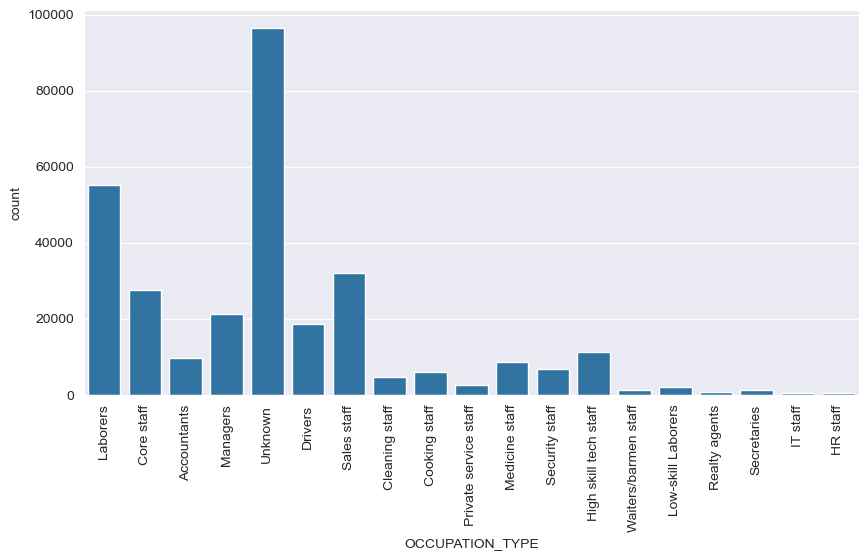

In [43]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = "OCCUPATION_TYPE")
plt.xticks(rotation = 90)
plt.show()

**Спостереження**
- Якщо поглянути на графік, то найбільшу кількість заявників на кредит мають `Laborers`
- Для імпутації краще залишити дані як є (пропущені значення становлять 31,35%) і не проводити імпутацію за якоюсь константою, як-от мода або мін/макс медіана, якщо це числовий стовпчик, оскільки це може викривити дані в подальших розрахунках.

Існує також можливість імпутації за допомогою більш "розумних" методів, але ми вивчимо їх пізніше, а зараз ми робимо те, що можемо, за допомогою деяких найпростіших перетворень.

### Аналіз стовпця `EXT_SOURCE_3`

- пропущені значення = 19.83%

In [44]:
df.EXT_SOURCE_3.value_counts().head()

EXT_SOURCE_3
0.75    1460
0.71    1315
0.69    1276
0.67    1191
0.65    1154
Name: count, dtype: int64

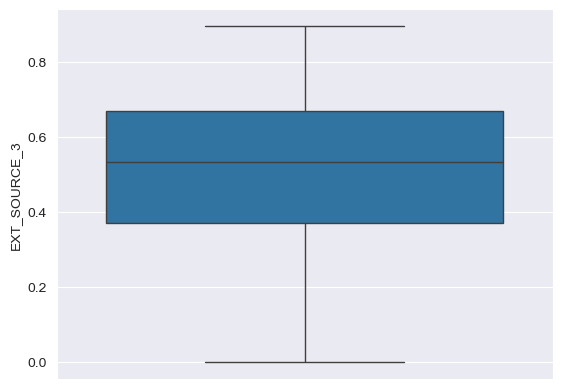

In [45]:
sns.boxplot(df.EXT_SOURCE_3)
plt.show()

Отримання процентильних значень для `EXT_SOURCE_3`

In [46]:
df.EXT_SOURCE_3.quantile(q = [0.25,0.5,0.75,1])

0.25   0.37
0.50   0.54
0.75   0.67
1.00   0.90
Name: EXT_SOURCE_3, dtype: float64

Найбільш повторюване значення в `EXT_SOURCE_3

In [47]:
df.EXT_SOURCE_3.mode()[0]

0.746300213050371

Перевірка середнього значення `EXT_SOURCE_3`

In [48]:
df.EXT_SOURCE_3.mean()

0.5108529061799658

**Спостереження**
-  Дивлячись на діагараму розмаху, медіана становить 0,535276
-  Найчастіше повторюване значення - 0,74630
-  Середнє значення - 0,51085
-  Хоча середнє та медіана є ближчими і можуть бути використані для імпутації, оскільки відсутнє відсоткове значення є більшим (19,83%), краще залишити дані як є і не проводити імпутації. Якщо метод вимагає імпутації, ми можемо імпутувати дані за допомогою медіани і створити ще один стовпчик, в якому буде позначено, які значення були імпутовані.

# ДЗ 1. Аналіз стовпців `AMT_REQ_CREDIT_BUREAU` з пропущеними значеннями

Виведіть середнє, моду, медіану та відсоток відсутніх даних для настуних колонок:

- `AMT_REQ_CREDIT_BUREAU_YEAR`
-	`AMT_REQ_CREDIT_BUREAU_MON`
-	`AMT_REQ_CREDIT_BUREAU_WEEK`

На основі виведених даних напишіть висновок про те, чи варто заповнювати пусті значення і якщо так, то яким чином?

In [49]:
df[df['AMT_REQ_CREDIT_BUREAU_YEAR'].isna()].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
3      100006       0         Cash loans           F             0   
9      100012       0    Revolving loans           M             0   
14     100018       0         Cash loans           F             0   
17     100021       0    Revolving loans           F             0   
20     100024       0    Revolving loans           M             1   

    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
3                 1             0         135000.00   312682.50     29686.50   
9                 1             0         135000.00   405000.00     20250.00   
14                1             0         189000.00   773680.50     32778.00   
17                1             1          81000.00   270000.00     13500.00   
20                1             0         135000.00   427500.00     21375.00   

    AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
3         297000.00   Unaccompanied          Working   
9         405000.00   Unaccompanied          Working   
14        679500.00   Unaccompanied          Working   
17        270000.00   Unaccompanied          Working   
20        427500.00   Unaccompanied          Working   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
3   Secondary / secondary special        Civil marriage  House / apartment   
9   Secondary / secondary special  Single / not married  House / apartment   
14  Secondary / secondary special               Married  House / apartment   
17  Secondary / secondary special               Married  House / apartment   
20  Secondary / secondary special               Married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
3                         0.01      -19005          -3039           -9833.00   
9                         0.02      -14469          -2019          -14437.00   
14                        0.01      -14583           -203            -615.00   
17                        0.01       -9776           -191           -4143.00   
20                        0.02      -18252          -4286            -298.00   

    DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
3             -2437           1               1                0   
9             -3992           1               1                0   
14            -2056           1               1                0   
17            -2427           1               1                0   
20            -1800           1               1                0   

    FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
3                  1           0           0        Laborers             2.00   
9                  1           0           0        Laborers             1.00   
14                 1           0           0        Laborers             2.00   
17                 1           0           0        Laborers             3.00   
20                 1           0           0        Laborers             2.00   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
3                      2                            2   
9                      2                            2   
14                     2                            1   
17                     2                            2   
20                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
3                   WEDNESDAY                       17   
9                    THURSDAY                        8   
14                     MONDAY                        9   
17                     MONDAY                       10   
20                     FRIDAY                       13   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
3                            0                           0   
9                            0                           0   
14                           0          

In [50]:
columns = [
    'AMT_REQ_CREDIT_BUREAU_YEAR',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_HOUR',
]

def check_columns_values(columns_to_check):
    for col in columns_to_check:
        mean = df[col].mean()
        median = df[col].median()
        values, counts = np.unique(df[col].dropna(), return_counts=True)
        mode = values[np.argmax(counts)]
        null_percentage = df[col].isna().mean() * 100

        print(f"--- {col} ---")
        print(f"Mean: {mean}")
        print(f"Median: {median}")
        print(f"Mode: {mode}")
        print(f"Missing values: {null_percentage:.2f}%\n")

check_columns_values(columns)

--- AMT_REQ_CREDIT_BUREAU_YEAR ---
Mean: 1.899974435321363
Median: 1.0
Mode: 0.0
Missing values: 13.50%

--- AMT_REQ_CREDIT_BUREAU_QRT ---
Mean: 0.26547414959848414
Median: 0.0
Mode: 0.0
Missing values: 13.50%

--- AMT_REQ_CREDIT_BUREAU_MON ---
Mean: 0.26739526000781977
Median: 0.0
Mode: 0.0
Missing values: 13.50%

--- AMT_REQ_CREDIT_BUREAU_WEEK ---
Mean: 0.0343619356973142
Median: 0.0
Mode: 0.0
Missing values: 13.50%

--- AMT_REQ_CREDIT_BUREAU_DAY ---
Mean: 0.0070002105326475985
Median: 0.0
Mode: 0.0
Missing values: 13.50%

--- AMT_REQ_CREDIT_BUREAU_HOUR ---
Mean: 0.006402448193930645
Median: 0.0
Mode: 0.0
Missing values: 13.50%



In [51]:
fully_filled = df[columns].notna().all(axis=1)

fully_missing = df[columns].isna().all(axis=1)

partially_filled = df[columns].isna().any(axis=1) & ~fully_missing

count_fully_filled = fully_filled.sum()
count_fully_missing = fully_missing.sum()
count_partially_filled = partially_filled.sum()

print("=== Credit Bureau Data Block Analysis ===")
print(f"Fully filled columns in rows: {count_fully_filled}")
print(f"Partially filled columns in rows: {count_partially_filled}")
print(f"Fully missing columns in rows: {count_fully_missing}")
print(f"Total rows checked: {len(df)}")

=== Credit Bureau Data Block Analysis ===
Fully filled columns in rows: 265992
Partially filled columns in rows: 0
Fully missing columns in rows: 41519
Total rows checked: 307511


### Conclusion: Analysis of Credit Bureau Request Features

The analysis of the following features:

- `AMT_REQ_CREDIT_BUREAU_YEAR`
- `AMT_REQ_CREDIT_BUREAU_QRT`
- `AMT_REQ_CREDIT_BUREAU_MON`
- `AMT_REQ_CREDIT_BUREAU_WEEK`
- `AMT_REQ_CREDIT_BUREAU_DAY`
- `AMT_REQ_CREDIT_BUREAU_HOUR`

...revealed that **13.5% of the records have all of these values missing simultaneously**.
This consistent absence across all credit bureau request fields strongly suggests a meaningful pattern rather than random data loss.

It is likely that these missing values correspond to **real customers** who share a specific characteristic regarding their credit history.
Potential reasons for this may include:

- Complete lack of a credit record (either intentional or due to technical reasons)
- Bankruptcy or account suspension
- Very young or new customers without prior credit activity
- System-level data collection limitations

Regardless of the cause, the **absence of this entire block of features is informative by itself**.
These clients appear to exhibit behavior where **credit bureau requests are not typical**, as supported by the mode of `0.0` across all filled fields.

---

### Recommended Data Handling Strategy

- **Impute missing values with `0.0`**, as this is the most frequently observed value in all credit bureau request columns and reflects the expected behavior for such clients.
- **Create an additional binary feature**, e.g. `NO_CREDIT_BUREAU_DATA`, that flags these customers (`1` if all six fields are missing, otherwise `0`).
  This allows the model to recognize the unique profile of these users explicitly.


In [52]:
df['NO_CREDIT_BUREAU_DATA'] = df[columns].isna().all(axis=1).astype(int)

df[columns] = df[columns].fillna(0.0)

In [53]:
null_count_upd = df.isnull().sum()
null_percentage_upd = round((df.isnull().sum()/df.shape[0])*100, 2)
null_df_upd = pd.DataFrame({'column_name' : df.columns,'null_count' : null_count_upd,'null_percentage': null_percentage_upd})
null_df_upd.reset_index(drop = True, inplace = True)
null_df_under40_upd = null_df_upd[null_df_upd['null_percentage'] < 40]
null_df_under40_upd.sort_values(by = 'null_percentage', ascending = False)

column_name  null_count  null_percentage
41                 EXT_SOURCE_3       60965            19.83
11              NAME_TYPE_SUITE        1292             0.42
42     OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33
43     DEF_30_CNT_SOCIAL_CIRCLE        1021             0.33
44     OBS_60_CNT_SOCIAL_CIRCLE        1021             0.33
45     DEF_60_CNT_SOCIAL_CIRCLE        1021             0.33
40                 EXT_SOURCE_2         660             0.21
10              AMT_GOODS_PRICE         278             0.09
50              FLAG_DOCUMENT_5           0             0.00
54              FLAG_DOCUMENT_9           0             0.00
53              FLAG_DOCUMENT_8           0             0.00
52              FLAG_DOCUMENT_7           0             0.00
51              FLAG_DOCUMENT_6           0             0.00
0                    SK_ID_CURR           0             0.00
49              FLAG_DOCUMENT_4           0             0.00
48              FLAG_DOCUMENT_3           0             0.00
56             FLAG_DOCUMENT_11           0             0.00
47              FLAG_DOCUMENT_2           0             0.00
46       DAYS_LAST_PHONE_CHANGE           1             0.00
55             FLAG_DOCUMENT_10           0             0.00
57             FLAG_DOCUMENT_12           0             0.00
38      LIVE_CITY_NOT_WORK_CITY           0             0.00
66             FLAG_DOCUMENT_21           0             0.00
72   AMT_REQ_CREDIT_BUREAU_YEAR           0             0.00
71    AMT_REQ_CREDIT_BUREAU_QRT           0             0.00
70    AMT_REQ_CREDIT_BUREAU_MON           0             0.00
69   AMT_REQ_CREDIT_BUREAU_WEEK           0             0.00
68    AMT_REQ_CREDIT_BUREAU_DAY           0             0.00
67   AMT_REQ_CREDIT_BUREAU_HOUR           0             0.00
65             FLAG_DOCUMENT_20           0             0.00
58             FLAG_DOCUMENT_13           0             0.00
64             FLAG_DOCUMENT_19           0             0.00
63             FLAG_DOCUMENT_18           0             0.00
62             FLAG_DOCUMENT_17           0             0.00
61             FLAG_DOCUMENT_16           0             0.00
60             FLAG_DOCUMENT_15           0             0.00
59             FLAG_DOCUMENT_14           0             0.00
39            ORGANIZATION_TYPE           0             0.00
37       REG_CITY_NOT_WORK_CITY           0             0.00
1                        TARGET           0             0.00
9                   AMT_ANNUITY          12             0.00
17                   DAYS_BIRTH           0             0.00
16   REGION_POPULATION_RELATIVE           0             0.00
15            NAME_HOUSING_TYPE           0             0.00
14           NAME_FAMILY_STATUS           0             0.00
13          NAME_EDUCATION_TYPE           0             0.00
12             NAME_INCOME_TYPE           0             0.00
8                    AMT_CREDIT           0             0.00
19            DAYS_REGISTRATION           0             0.00
7              AMT_INCOME_TOTAL           0             0.00
6                  CNT_CHILDREN           0             0.00
5               FLAG_OWN_REALTY           0             0.00
4                  FLAG_OWN_CAR           0             0.00
3                   CODE_GENDER           0             0.00
2            NAME_CONTRACT_TYPE           0             0.00
18                DAYS_EMPLOYED           0             0.00
20              DAYS_ID_PUBLISH           0             0.00
36       REG_CITY_NOT_LIVE_CITY           0             0.00
29         REGION_RATING_CLIENT           0             0.00
35  LIVE_REGION_NOT_WORK_REGION           0             0.00
34   REG_REGION_NOT_WORK_REGION           0             0.00
33   REG_REGION_NOT_LIVE_REGION           0             0.00
32      HOUR_APPR_PROCESS_START           0             0.00
31   WEEKDAY_APPR_PROCESS_START           0             0.00
30  REGION_RATING_CLIENT_W_CITY           0            

## Перевірка стовпців зі значеннями NULL > 0% та < 1%

Створення датафрейму `null_df_under1` з відсотком пропущених значень > 0% та < 1% у кожному стовпці

In [54]:
null_df_under1 = null_df[(null_df['null_percentage'] > 0) & (null_df['null_percentage'] < 1)]

In [55]:
null_df_under1.sort_values(by = 'null_percentage', ascending = False)

column_name  null_count  null_percentage
11           NAME_TYPE_SUITE        1292             0.42
91  OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33
92  DEF_30_CNT_SOCIAL_CIRCLE        1021             0.33
93  OBS_60_CNT_SOCIAL_CIRCLE        1021             0.33
94  DEF_60_CNT_SOCIAL_CIRCLE        1021             0.33
42              EXT_SOURCE_2         660             0.21
10           AMT_GOODS_PRICE         278             0.09

### Аналіз стовпця `NAME_TYPE_SUITE`

In [56]:
null_df_under1[null_df_under1.column_name == 'NAME_TYPE_SUITE']

column_name  null_count  null_percentage
11  NAME_TYPE_SUITE        1292             0.42

In [57]:
df['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

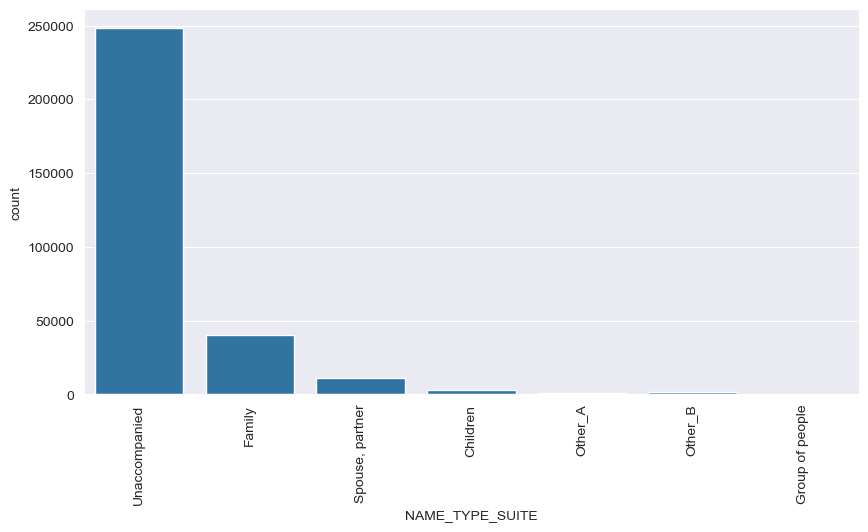

In [58]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = "NAME_TYPE_SUITE")
plt.xticks(rotation = 90)
plt.show()

**Спостереження**
-   Дивлячись на графік, категорія `Unaccompanied` має найбільшу кількість заявників на отримання кредиту. Отже, більшість позичальників наважуються звертатися за кредитом без супроводу.
- Ми можемо продовжити імпутацію `Unaccompanied` в датафреймі, але краше надати перевагу другому варіанту.
- Ми також могли б імпутувати дані зі значенням `NA`, оскільки ця колонка є категоричною.
- Аналогічно, якщо в колонці не вистачає менше 1% даних, ми можемо її опустити. Але якщо ми вилучимо всі дані в усіх стовпчиках, де пропущено <=1% даних, ми можемо вилучити занадто багато даних. Тому я здебільшого зберігаю дані настільки, наскільки це можливо.

In [59]:
df['NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'].fillna('NA')

### Аналіз стовпця `OBS_30_CNT_SOCIAL_CIRCLE`

In [60]:
null_df_under1[null_df_under1.column_name == 'OBS_30_CNT_SOCIAL_CIRCLE']

column_name  null_count  null_percentage
91  OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33

In [61]:
df.OBS_30_CNT_SOCIAL_CIRCLE.value_counts().head(10)

OBS_30_CNT_SOCIAL_CIRCLE
0.00    163910
1.00     48783
2.00     29808
3.00     20322
4.00     14143
5.00      9553
6.00      6453
7.00      4390
8.00      2967
9.00      2003
Name: count, dtype: int64

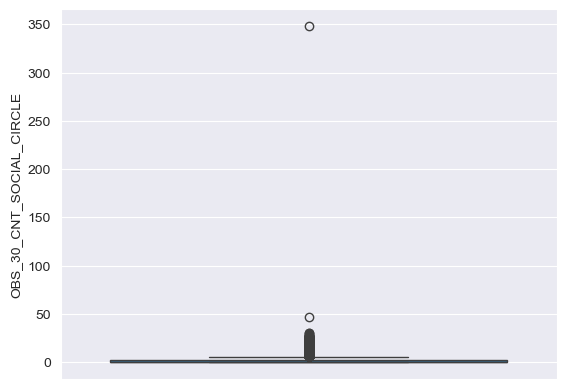

In [62]:
sns.boxplot(df.OBS_30_CNT_SOCIAL_CIRCLE)
plt.show()

Розрахунок перцентилів `OBS_30_CNT_SOCIAL_CIRCLE`

In [63]:
df.OBS_30_CNT_SOCIAL_CIRCLE.quantile(q = [0.25,0.5,0.75,1])

0.25     0.00
0.50     0.00
0.75     2.00
1.00   348.00
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

Найбільш повторюване значення в `OBS_30_CNT_SOCIAL_CIRCLE`

In [64]:
df.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0]

0.0

Середнє значення `OBS_30_CNT_SOCIAL_CIRCLE`

In [65]:
df.OBS_30_CNT_SOCIAL_CIRCLE.mean()

1.4222454239942575

**Спостереження**
- Дивлячись на діаграму розмаху, медіана дорівнює 0.0
- Найчастіше повторюване значення - 0.0
- Середнє значення - 1,4222
- Є два викидні значення на рівні 50 та 350.
- Медіана і мода близькі (з огляду на діапазон даних у цьому стовпчику) і можуть бути використані для імпутації. Це не призведе до зміщення, оскільки відсоток пропущених значень невеликий (0,33%)

In [66]:
df['OBS_30_CNT_SOCIAL_CIRCLE'] = df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_30_CNT_SOCIAL_CIRCLE'].median())

# ДЗ 2. Аналіз і заповнення пустих значень у колонках з малим відсотком пропущених

За прикладом вище проведіть аналіз пропущених значень в колонках
- EXT_SOURCE_2
- AMT_GOODS_PRICE

Для швидшого аналізу рекомендую написати фукнцію, яку Ви зможете викликати для кожної з колонок.

Зробіть висновок, що робити з пропущеними значеннями в кожному випадку і виконанайте ту дію, яку зазначили.

In [67]:
def check_columns_values_extended(columns_to_check):
    for col in columns_to_check:
        mean = df[col].mean()
        median = df[col].median()
        values, counts = np.unique(col, return_counts=True)
        mode = values[np.argmax(counts)]
        null_percentage = df[col].isna().mean() * 100
        percentiles = df[col].quantile(q=[0.25, 0.5, 0.75, 0.99, 1])

        print(f"--- {col} ---")
        print(f"Mean: {mean}")
        print(f"Median: {median}")
        print(f"Mode: {mode}")
        print(f"Missing values: {null_percentage:.2f}%")
        print(f"Column percentiles:\n{percentiles}\n")

        sns.boxplot(df[col])
        plt.title(f'Boxplot for {col}')
        plt.show()

--- EXT_SOURCE_2 ---
Mean: 0.5143926741308462
Median: 0.5659614260608526
Mode: EXT_SOURCE_2
Missing values: 0.21%
Column percentiles:
0.25   0.39
0.50   0.57
0.75   0.66
0.99   0.78
1.00   0.85
Name: EXT_SOURCE_2, dtype: float64



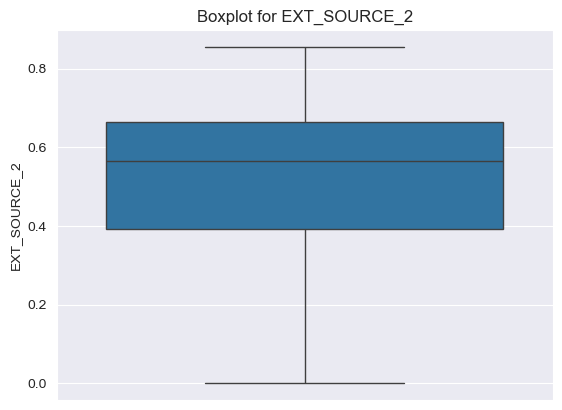

--- AMT_GOODS_PRICE ---
Mean: 538396.2074288895
Median: 450000.0
Mode: AMT_GOODS_PRICE
Missing values: 0.09%
Column percentiles:
0.25    238500.00
0.50    450000.00
0.75    679500.00
0.99   1800000.00
1.00   4050000.00
Name: AMT_GOODS_PRICE, dtype: float64



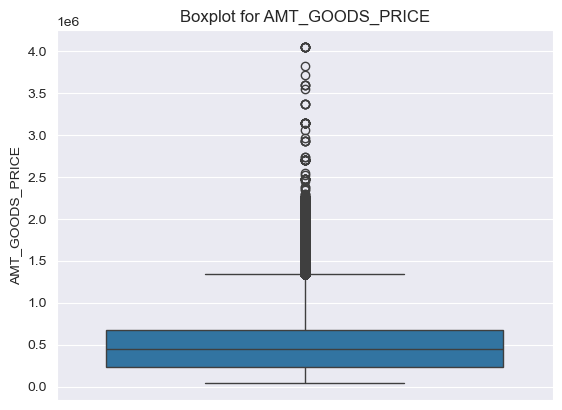

In [68]:
check_columns_values_extended(['EXT_SOURCE_2', 'AMT_GOODS_PRICE'])

In [69]:
df[df['EXT_SOURCE_2'].isna()].head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
329      100377       0         Cash loans           M             0   
349      100402       0         Cash loans           F             0   
617      100706       0         Cash loans           F             0   
1028     101189       0         Cash loans           F             1   
1520     101787       0         Cash loans           M             1   
2098     102466       0         Cash loans           F             0   
2426     102831       0         Cash loans           F             0   
2448     102855       0         Cash loans           F             1   
2756     103215       0         Cash loans           F             0   
3212     103750       0         Cash loans           F             0   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
329                 0             2         157500.00   239850.00   
349                 1             0          81000.00   276277.50   
617                 1             0         180000.00   533668.50   
1028                1             0         121500.00   909000.00   
1520                1             0         225000.00   269550.00   
2098                0             0         135000.00   432661.50   
2426                1             0          49500.00   292500.00   
2448                1             0         202500.00   912240.00   
2756                0             0         112500.00   253737.00   
3212                1             0          54000.00   135000.00   

      AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
329      25447.50        225000.00   Unaccompanied          Working   
349      21825.00        238500.00   Unaccompanied        Pensioner   
617      22738.50        477000.00   Unaccompanied        Pensioner   
1028     36180.00        909000.00   Unaccompanied        Pensioner   
1520     21294.00        225000.00   Unaccompanied          Working   
2098     30240.00        373500.00   Unaccompanied          Working   
2426     12042.00        292500.00   Unaccompanied        Pensioner   
2448     30145.50        787500.00   Unaccompanied          Working   
2756     26923.50        229500.00   Unaccompanied          Working   
3212     13279.50        135000.00   Unaccompanied        Pensioner   

                NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
329                Higher education               Married   
349   Secondary / secondary special  Single / not married   
617   Secondary / secondary special  Single / not married   
1028  Secondary / secondary special               Married   
1520  Secondary / secondary special               Married   
2098               Higher education  Single / not married   
2426  Secondary / secondary special               Married   
2448  Secondary / secondary special               Married   
2756  Secondary / secondary special               Married   
3212  Secondary / secondary special                 Widow   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
329     House / apartment                        0.01      -14252   
349   Municipal apartment                        0.01      -19780   
617   Municipal apartment                        0.01      -22460   
1028    House / apartment                        0.03      -21323   
1520    House / apartment                        0.07      -18896   
2098    House / apartment                        0.01      -22457   
2426    House / apartment                        0.01      -20731   
2448    House / apartment                        0.02      -15273   
2756  Municipal apartment                        0.01      -10934   
3212    House / apartment                        0.01      -23168   

      DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
329           -1281           -6024.00            -3427           1   
349          365243          -11248.00            -3331           1   
617          365243      

In [70]:
df[df['AMT_GOODS_PRICE'].isna()].head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
724       100837       0    Revolving loans           F             0   
5937      106955       0    Revolving loans           F             0   
6425      107494       0    Revolving loans           F             0   
6703      107822       0    Revolving loans           F             0   
7647      108913       0    Revolving loans           M             0   
7880      109190       1    Revolving loans           F             0   
7995      109322       0    Revolving loans           M             0   
10819     112595       0    Revolving loans           F             0   
11287     113148       0    Revolving loans           F             0   
13008     115162       0    Revolving loans           F             0   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
724                  1             2          45000.00   135000.00   
5937                 0             0         157500.00   450000.00   
6425                 0             0          67500.00   202500.00   
6703                 0             1         121500.00   180000.00   
7647                 1             0         180000.00   450000.00   
7880                 0             0         121500.00   270000.00   
7995                 1             0         112500.00   180000.00   
10819                1             0          90000.00   270000.00   
11287                1             4         225000.00   135000.00   
13008                1             1         157500.00   450000.00   

       AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
724        6750.00              NaN              NA  Commercial associate   
5937      22500.00              NaN              NA               Working   
6425      10125.00              NaN              NA               Working   
6703       9000.00              NaN              NA               Working   
7647      22500.00              NaN              NA               Working   
7880      13500.00              NaN              NA               Working   
7995       9000.00              NaN              NA               Working   
10819     13500.00              NaN              NA               Working   
11287      6750.00              NaN              NA         State servant   
13008     22500.00              NaN              NA         State servant   

                 NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
724    Secondary / secondary special               Married  House / apartment   
5937   Secondary / secondary special               Married  House / apartment   
6425                Higher education               Married  House / apartment   
6703   Secondary / secondary special        Civil marriage  House / apartment   
7647                Higher education  Single / not married  House / apartment   
7880                Higher education  Single / not married       With parents   
7995   Secondary / secondary special  Single / not married  House / apartment   
10819  Secondary / secondary special               Married  House / apartment   
11287  Secondary / secondary special  Single / not married  House / apartment   
13008               Higher education               Married  House / apartment   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
724                          0.02      -10072           -381   
5937                         0.01      -11993          -2921   
6425                         0.01       -9727          -2712   
6703                         0.01      -11079           -899   
7647                         0.03       -9986          -1847   
7880                         0.01      -12390           -640   
7995                         0.01      -12420          -1610   
10819                        0.02      -18193           -242   
11287                        0.00      -17610          -4662   
13008                        0.05      -14005      

In [71]:
missing_goods_price = df[df['AMT_GOODS_PRICE'].isna()]
missing_goods_price['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Revolving loans    278
Name: count, dtype: int64

## Missing Value Analysis Summary

### EXT_SOURCE_2

The absence of the `EXT_SOURCE_2` feature likely indicates that the credit bureau did not provide an external score for the client. Since the proportion of missing values is low (0.21%), it is reasonable to impute these values using the `median`. This helps preserve the overall distribution without introducing skewness. The data is compactly distributed, with the 75th percentile at 0.66 and the maximum at 0.85. No significant outliers are present.

### AMT_GOODS_PRICE and NAME_CONTRACT_TYPE

An analysis of missing `AMT_GOODS_PRICE` values reveals that they are predominantly associated with loans of type `Revolving loans`. These credit lines typically do not correspond to a specific product, which explains the absence of a goods price in some records.

The missing rate is very low (0.09%), and the majority of values are concentrated below 679,500 (75th percentile), while only a small part of the data belongs to higher price segments (maximum 4,050,000). Although the distribution shows some skewness due to the presence of larger valid loan amounts, these values represent actual goods prices and should not be treated as outliers.

To preserve the integrity of the data distribution while maintaining completeness, the recommended approach is to:

- Impute missing `AMT_GOODS_PRICE` values with the `median`.
- Introduce a new binary feature (e.g., `AMT_GOODS_PRICE_WAS_MISSING`) to indicate that the value was originally missing and has been imputed.

This approach ensures minimal distortion of the feature and retains potentially useful information for modeling.

In [72]:
ext2_median = df['EXT_SOURCE_2'].median()
df['EXT_SOURCE_2'] = df['EXT_SOURCE_2'].fillna(ext2_median)
goods_median = df['AMT_GOODS_PRICE'].median()
df['AMT_GOODS_PRICE_WAS_MISSING'] = df['AMT_GOODS_PRICE'].isna().astype(int)
df['AMT_GOODS_PRICE'] = df['AMT_GOODS_PRICE'].fillna(goods_median)

# Робота з неправильними/невідомими значеннями даних

### Аналіз стовпця `CODE_GENDER`

Перевірка діапазону значень

In [73]:
df['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

Стать має бути тільки чоловіча або жіноча. Значення `XNA` може вказувати на те, що значення не було надано заявником або пропущено кредитним спеціалістом, який перевіряє заявку

In [74]:
df[df['CODE_GENDER'] == 'XNA']

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
35657      141289       0    Revolving loans         XNA             1   
38566      144669       0    Revolving loans         XNA             0   
83382      196708       0    Revolving loans         XNA             0   
189640     319880       0    Revolving loans         XNA             1   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
35657                 1             0         207000.00   382500.00   
38566                 1             2         157500.00   270000.00   
83382                 1             1         135000.00   405000.00   
189640                1             0         247500.00   540000.00   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
35657      19125.00        337500.00   Unaccompanied               Working   
38566      13500.00        225000.00          Family               Working   
83382      20250.00        225000.00   Unaccompanied               Working   
189640     27000.00        900000.00   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
35657   Secondary / secondary special            Married  Municipal apartment   
38566   Secondary / secondary special            Married    House / apartment   
83382                Higher education            Married    House / apartment   
189640              Incomplete higher     Civil marriage    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
35657                         0.02      -20232         -10044   
38566                         0.03      -13717          -2797   
83382                         0.04      -10647          -1228   
189640                        0.04       -9649          -2293   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
35657           -10024.00            -3537           1               1   
38566            -2241.00            -4659           1               1   
83382             -183.00            -1671           1               1   
189640           -4099.00            -2326           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
35657                 1                 1           1           0   
38566                 1                 1           1           0   
83382                 1                 1           1           0   
189640                1                 1           1           0   

           OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
35657              Unknown             2.00                     3   
38566   Low-skill Laborers             4.00                     2   
83382           Core staff             3.00                     2   
189640             Unknown             2.00                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
35657                             3                    TUESDAY   
38566                             2                     FRIDAY   
83382                             2                   THURSDAY   
189640                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
35657                        10                           0   
38566                        16                           0   
83382                        15                           0   
189640                       15                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
35657                            0                            0   
38566                            0                            0   
83382                            0                            0   
189640                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
35657                        0                       

Оскільки дані виглядають достовірними, ми перевіримо можливість застосування методу імпутації.
- Заявників-жінок удвічі більше, ніж заявників-чоловіків
- Отже, ми прирівняємо `CODE_GENDER` до 'F'

In [75]:
df['CODE_GENDER'] = df['CODE_GENDER'].apply(lambda x: 'F' if x == 'XNA' else x)

Перевірка, чи вилучено `XNA`

In [76]:
df['CODE_GENDER'].value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

### Аналіз стовпця `DAYS_BIRTH`

In [77]:
df['DAYS_BIRTH'].value_counts().head()

DAYS_BIRTH
-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
Name: count, dtype: int64

Існує ~17K+ унікальних записів, всі з яких, схоже, мають від'ємні значення

In [78]:
df['DAYS_BIRTH'].unique()

array([ -9461, -16765, -19046, ...,  -7951,  -7857, -25061], dtype=int64)

In [79]:
df['DAYS_BIRTH'].nunique()

17460

In [80]:
df['DAYS_BIRTH'].describe()

count   307511.00
mean    -16037.00
std       4363.99
min     -25229.00
25%     -19682.00
50%     -15750.00
75%     -12413.00
max      -7489.00
Name: DAYS_BIRTH, dtype: float64

Перетворення `Days Birth` на додатні дні

In [81]:
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x: -x if x < 0 else x)

In [82]:
df['DAYS_BIRTH'].value_counts()

DAYS_BIRTH
13749    43
13481    42
18248    41
10020    41
15771    40
         ..
24898     1
24868     1
8017      1
25098     1
25061     1
Name: count, Length: 17460, dtype: int64

Всі дні в `DAYS_BIRTH` мають додатні значення - це може бути зручніше для аналізу.

#### Створимо нову колонку `YEARS_BIRTH` для зручності аналізу

In [83]:
df['YEARS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x: round(x/365))

### Аналіз стовпця `NAME_FAMILY_STATUS`

Перевірка діапазону значень

In [84]:
df['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

Стать має бути тільки чоловіча або жіноча. Значення `Unknown` може означати, що значення не було вказане заявником або пропущене кредитним спеціалістом, який перевіряє заявку

In [85]:
df[df['NAME_FAMILY_STATUS'] == 'Unknown']

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
41982      148605       0    Revolving loans           M             0   
187348     317181       0    Revolving loans           F             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
41982                 1             0         450000.00   675000.00   
187348                1             0         202500.00   585000.00   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
41982      33750.00        450000.00              NA  Commercial associate   
187348     29250.00        450000.00              NA  Commercial associate   

       NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
41982      Lower secondary            Unknown  Municipal apartment   
187348    Higher education            Unknown    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
41982                         0.02       12396          -1161   
187348                        0.03       12844           -232   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
41982            -3265.00            -4489           1               1   
187348           -1597.00            -1571           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
41982                 1                 1           1           0   
187348                0                 1           0           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
41982         Managers              NaN                     2   
187348     Accountants              NaN                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
41982                             2                   THURSDAY   
187348                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
41982                        15                           0   
187348                       14                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
41982                            1                            1   
187348                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
41982                        0                       1   
187348                       0                       0   

        LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  \
41982                         1               Insurance          0.70   
187348                        0  Business Entity Type 2          0.65   

        EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
41982            NaN                      3.00                      0.00   
187348          0.67                      1.00                      0.00   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
41982                       3.00                      0.00   
187348                      1.00                      0.00   

        DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
41982                  -876.00                0                0   
187348                 -654.00                0                0   

        FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
41982                 0                1                0                0   
187348                0                0                0                1   

        FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
41982                 0                0                 0                 0   
187348                0                0                 0                 0   

        FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
41982                  0                 0                 0   
187348                 0                 0                 0   

        FLAG_DOCUMENT_15 

In [86]:
df['NAME_FAMILY_STATUS'].value_counts(normalize = True) * 100

NAME_FAMILY_STATUS
Married                63.88
Single / not married   14.78
Civil marriage          9.68
Separated               6.43
Widow                   5.23
Unknown                 0.00
Name: proportion, dtype: float64

Оскільки дані виглядають достовірними, ми продовжимо перевірку методу імпутації.
- Одружені заявники складають понад 63% заявників.
- Отже, ми прирівняємо `NAME_FAMILY_STATUS` до `Married`.

In [87]:
df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].apply(lambda x: 'Married' if x == 'Unknown' else x)

Перевірка чи вилучено `Unknown`

In [88]:
df['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196434
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: count, dtype: int64

### Аналіз стовпця`DAYS_EMPLOYED`

In [89]:
df['DAYS_EMPLOYED'].value_counts().head()

DAYS_EMPLOYED
 365243    55374
-200         156
-224         152
-230         151
-199         151
Name: count, dtype: int64

In [90]:
df['DAYS_EMPLOYED'].value_counts(normalize = True) * 100

DAYS_EMPLOYED
 365243   18.01
-200       0.05
-224       0.05
-230       0.05
-199       0.05
           ... 
-13961     0.00
-11827     0.00
-10176     0.00
-9459      0.00
-8694      0.00
Name: proportion, Length: 12574, dtype: float64

In [91]:
len(df[df['DAYS_EMPLOYED'] < 365243])

252137

In [92]:
df[df['DAYS_EMPLOYED'] < 365243].DAYS_EMPLOYED.value_counts()

DAYS_EMPLOYED
-200      156
-224      152
-199      151
-230      151
-212      150
         ... 
-13961      1
-11827      1
-10176      1
-9459       1
-8694       1
Name: count, Length: 12573, dtype: int64

In [93]:
df['DAYS_EMPLOYED'].unique()

array([  -637,  -1188,   -225, ..., -12971, -11084,  -8694], dtype=int64)

In [94]:
df['DAYS_EMPLOYED'].nunique()

12574

**Спостереження**
- Існує ~55K+ записів, для яких `DAYS_EMPLOYED` дорівнює 365243 дням
- Решта 252K+ записів мають від'ємне значення днів
- Існує 12 574 унікальних значень для `DAYS_EMPLOYED`

 - Колонка `DAYS_EMPLOYED` вказує на те, за скільки днів до подачі заявки особа почала поточну роботу, заявник/кредитний спеціаліст повинен ввести від'ємні значення, щоб вказати дні, що передують даті подачі заявки.<br>
 - Ми конвертуємо від'ємні значення в `DAYS_EMPLOYED` в додатні дні, щоб стандартизувати дні під час використання в розрахунках

In [95]:
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: -x if x < 0 else x)

In [96]:
df['DAYS_EMPLOYED'].value_counts().head()

DAYS_EMPLOYED
365243    55374
200         156
224         152
230         151
199         151
Name: count, dtype: int64

Ми бачимо, що всі дні в `DAYS_EMPLOYED` мають додатні значення

**Для ~55K+ записів, для яких `DAYS_EMPLOYED` становить 365243 дні**
- Конвертуючи це в роки, ми отримуємо 1000 років, які фізично неможливо використати для працевлаштування заявника
- Це відповідає 18% даних і не може бути аномалією
- Вони можуть бути або пенсіонерами, або безробітними, і, дивлячись на дані, наш висновок є правильним

> Є два способи впоратися з цим
>> 1) Ми залишаємо дані такими, якими вони є, і враховуємо це під час аналізу АБО  <br>
>> 2) Ми розраховуємо середню кількість днів зайнятості без урахування цієї категорії та вписуємо її замість 365243 днів для пенсіонерів. <br>
>> Для безробітних кількість днів зайнятості може дорівнювати 0

*Примітка*
 - Під час розрахунків у цьому стовпчику ми повинні враховувати цей сценарій, оскільки інакше він спотворює наші результати

In [97]:
df[df['DAYS_EMPLOYED'] == 365243].NAME_INCOME_TYPE.value_counts()

NAME_INCOME_TYPE
Pensioner     55352
Unemployed       22
Name: count, dtype: int64

#### Створимо нову колонку `YEARS_EMPLOYED` для зручності аналізу

In [98]:
df['YEARS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: round(x/365))

### Аналіз стовпця `DAYS_REGISTRATION`

In [99]:
df['DAYS_REGISTRATION'].value_counts().head()

DAYS_REGISTRATION
-1.00    113
-7.00     98
-6.00     96
-4.00     92
-2.00     92
Name: count, dtype: int64

In [100]:
df['DAYS_REGISTRATION'].value_counts(normalize = True).head()

DAYS_REGISTRATION
-1.00   0.00
-7.00   0.00
-6.00   0.00
-4.00   0.00
-2.00   0.00
Name: proportion, dtype: float64

In [101]:
df['DAYS_REGISTRATION'].unique()

array([ -3648.,  -1186.,  -4260., ..., -16396., -14558., -14798.])

In [102]:
df['DAYS_REGISTRATION'].nunique()

15688

Перетворення `DAYS_REGISTRATION` в додатні дні

In [103]:
df['DAYS_REGISTRATION'] = df['DAYS_REGISTRATION'].apply(lambda x: -x if x < 0 else x)

In [104]:
df['DAYS_REGISTRATION'].value_counts().head()

DAYS_REGISTRATION
1.00    113
7.00     98
6.00     96
4.00     92
2.00     92
Name: count, dtype: int64

Всі дні в `DAYS_REGISTRATION` мають додатні значення

#### Створимо нову колонку `YEARS_REGISTRATION` для зручності аналізу

In [105]:
df['YEARS_REGISTRATION'] = df['DAYS_REGISTRATION'].apply(lambda x: round(x/365))

### Аналіз стовпця `DAYS_ID_PUBLISH`

In [106]:
df['DAYS_ID_PUBLISH'].value_counts().head()

DAYS_ID_PUBLISH
-4053    169
-4095    162
-4046    161
-4417    159
-4256    158
Name: count, dtype: int64

In [107]:
df['DAYS_ID_PUBLISH'].value_counts(normalize = True).head()

DAYS_ID_PUBLISH
-4053   0.00
-4095   0.00
-4046   0.00
-4417   0.00
-4256   0.00
Name: proportion, dtype: float64

In [108]:
df['DAYS_ID_PUBLISH'].unique()

array([-2120,  -291, -2531, ..., -6194, -5854, -6211], dtype=int64)

In [109]:
df['DAYS_ID_PUBLISH'].nunique()

6168

Перетворення `DAYS_ID_PUBLISH` в додатні дні

In [110]:
df['DAYS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].apply(lambda x: -x if x < 0 else x)

In [111]:
df['DAYS_ID_PUBLISH'].value_counts().head()

DAYS_ID_PUBLISH
4053    169
4095    162
4046    161
4417    159
4256    158
Name: count, dtype: int64

Всі дні в `DAYS_ID_PUBLISH` мають додатні значення

#### Створимо нову колонку `YEARS_ID_PUBLISH` для зручності аналізу

In [112]:
df['YEARS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].apply(lambda x: round(x/365))

### Аналіз стовпця `DAYS_LAST_PHONE_CHANGE`

In [113]:
df['DAYS_LAST_PHONE_CHANGE'].value_counts().head()

DAYS_LAST_PHONE_CHANGE
0.00     37672
-1.00     2812
-2.00     2318
-3.00     1763
-4.00     1285
Name: count, dtype: int64

In [114]:
df['DAYS_LAST_PHONE_CHANGE'].value_counts(normalize = True).head()

DAYS_LAST_PHONE_CHANGE
0.00    0.12
-1.00   0.01
-2.00   0.01
-3.00   0.01
-4.00   0.00
Name: proportion, dtype: float64

In [115]:
df['DAYS_LAST_PHONE_CHANGE'].unique()

array([-1134.,  -828.,  -815., ..., -3988., -3899., -3538.])

In [116]:
df['DAYS_LAST_PHONE_CHANGE'].nunique()

3773

Перетворення `DAYS_LAST_PHONE_CHANGE` в додатні дні

In [117]:
df['DAYS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: -x if x < 0 else x)

In [118]:
df['DAYS_LAST_PHONE_CHANGE'].value_counts().head()

DAYS_LAST_PHONE_CHANGE
0.00    37672
1.00     2812
2.00     2318
3.00     1763
4.00     1285
Name: count, dtype: int64

Всі дні в `DAYS_LAST_PHONE_CHANGE` мають додатні значення

#### Створення нової колонки `YEARS_LAST_PHONE_CHANGE` для зручності аналізу

In [119]:
df['YEARS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: round(x/365,0))

# Автоматичні функції

### Створення функції `age_cat` для категоризації `YEARS_BORNING`

In [120]:
def age_cat(years):
    if years <= 20:
        return '0-20'
    elif years > 20 and years <= 30:
        return '20-30'
    elif years > 30 and years <= 40:
        return '30-40'
    elif years > 40 and years <= 50:
        return '40-50'
    elif years > 50 and years <= 60:
        return '50-60'
    elif years > 60 and years <= 70:
        return '60-70'
    elif years > 70:
        return '70+'

### Одномірний (категоріальний vs цільовий) та двомірний (категоріальний vs категоріальний) аналіз (гістограма) - категоріальні стовпчики

In [121]:
import matplotlib.pyplot as plt


def bi_cat_countplot(df, column, hue_column):
    unique_hue_values = df[hue_column].unique()
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(14,6)

    pltname = f'Нормалізований розподіл значень за категорією: {column}'
    proportions = df.groupby(hue_column)[column].value_counts(normalize=True)
    proportions = (proportions*100).round(2)
    ax = proportions.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
        ).plot.bar(ax=axes[0], title=pltname)

    # анотація значень в барплоті
    for container in ax.containers:
        ax.bar_label(container, fmt='{:,.1f}%')

    pltname = f'Кількість даних за категорією: {column}'
    counts = df.groupby(hue_column)[column].value_counts()
    ax = counts.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
        ).plot.bar(ax=axes[1], title=pltname)

    for container in ax.containers:
      ax.bar_label(container)


def uni_cat_target_compare(df, column):
    bi_cat_countplot(df, column, hue_column='TARGET' )


def bi_countplot_target(df0, df1, column, hue_column):
  pltname = 'Клієнт зі складнощами щодо платності'
  print(pltname.upper())
  bi_cat_countplot(df1, column, hue_column)
  plt.show()

  pltname = 'Клієнти зі своєчасними платежами'
  print(pltname.upper())
  bi_cat_countplot(df0, column, hue_column)
  plt.show()


### Обчислення мінімального та максимального діапазону відхилень для числових стовпців

In [122]:
def outlier_range(dataset,column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    Min_value = (Q1 - 1.5 * IQR)
    Max_value = (Q3 + 1.5 * IQR)
    return Max_value

# Робота з викидами для числових стовпців

In [123]:
import warnings

def dist_box(dataset, column):
    with warnings.catch_warnings():
      warnings.simplefilter("ignore")

      plt.figure(figsize=(16,6))

      plt.subplot(1,2,1)
      sns.distplot(dataset[column], color = 'purple')
      pltname = 'Графік розподілу для ' + column
      plt.ticklabel_format(style='plain', axis='x')
      plt.title(pltname)

      plt.subplot(1,2,2)
      red_diamond = dict(markerfacecolor='r', marker='D')
      sns.boxplot(y = column, data = dataset, flierprops = red_diamond)
      pltname = 'Боксплот для ' + column
      plt.title(pltname)

      plt.show()

### Аналіз стовпця`CNT_CHILDREN`

In [124]:
df['CNT_CHILDREN'].value_counts().sort_values(ascending = False).head()

CNT_CHILDREN
0    215371
1     61119
2     26749
3      3717
4       429
Name: count, dtype: int64

In [125]:
(df['CNT_CHILDREN'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

CNT_CHILDREN
0   70.04
1   19.88
2    8.70
3    1.21
4    0.14
Name: proportion, dtype: float64

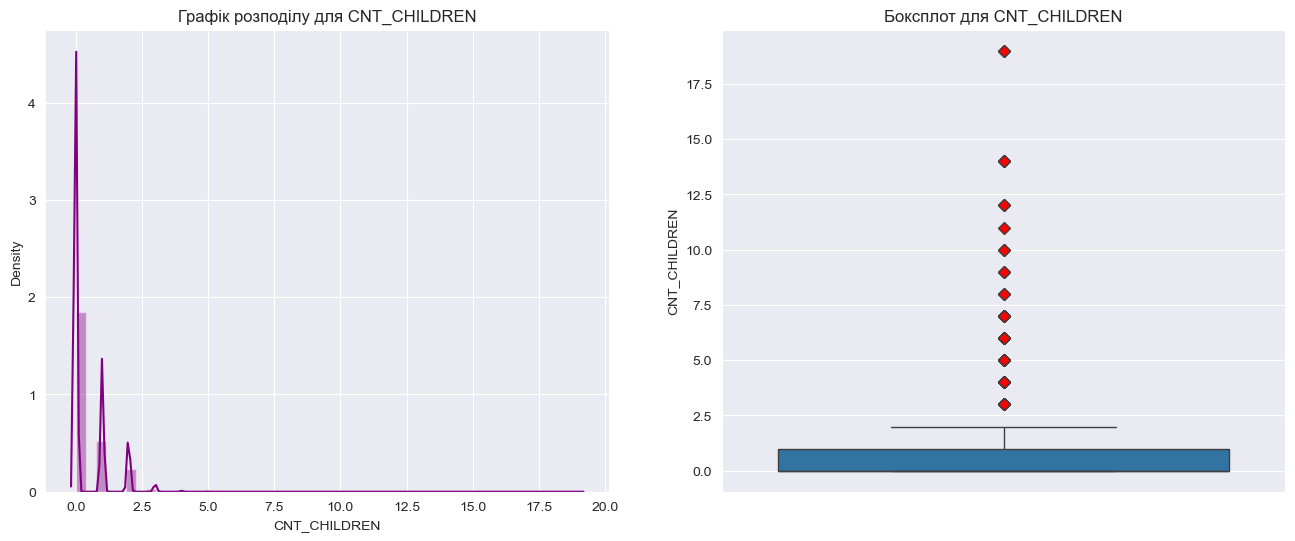

In [126]:
dist_box(df,'CNT_CHILDREN')

Розрахуємо IQR (Inter Quartile range)

In [127]:
Q1 = df['CNT_CHILDREN'].quantile(0.25)
Q3 = df['CNT_CHILDREN'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

1.0


Значення *до* (Q1 - 1,5 * IQR) та *після* (Q3 + 1,5 * IQR) є викидами

In [128]:
Min_value = (Q1 - 1.5 * IQR)
Max_value = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value))

Мінімальне значення, до якого існують викиди: -1.5
Максимальне значення, після якого існують викиди: 2.5


**Спостереження**
- Дивлячись на дані, ми бачимо, що кількість заявників, які мають більше 7 дітей, є дуже мінімальною (2 або 3 в кожній категорії)
- Крім того, дивлячись на дані для заявників з 10 дітьми, заявники мають лише 31 й 41 рік відповідно. Це виглядає як одиничний випадок й може розглядатися як відхилення від норми
- Як дистрибутивні, так і діаграми розмаху чітко показують, що значення, які перевищують значення 2.5, є відхиленнями від норми.

**Висновок**
- Заявники, які мають 3 або більше дітей, є випадками, що відхиляються від норми. Ми можемо надати спеціальний аналіз для цих випадків.

### Аналіз стовпця `AMT_INCOME_TOTAL`

In [129]:
df['AMT_INCOME_TOTAL'].value_counts().sort_values(ascending = False).head()

AMT_INCOME_TOTAL
135000.00    35750
112500.00    31019
157500.00    26556
180000.00    24719
90000.00     22483
Name: count, dtype: int64

In [130]:
(df['AMT_INCOME_TOTAL'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

AMT_INCOME_TOTAL
135000.00   11.63
112500.00   10.09
157500.00    8.64
180000.00    8.04
90000.00     7.31
Name: proportion, dtype: float64

In [131]:
df['AMT_INCOME_TOTAL'].describe(percentiles = [0.75,0.99,0.999])

count      307511.00
mean       168797.92
std        237123.15
min         25650.00
50%        147150.00
75%        202500.00
99%        472500.00
99.9%      900000.00
max     117000000.00
Name: AMT_INCOME_TOTAL, dtype: float64

Побудуємо графік для `AMT_INCOME_TOTAL`

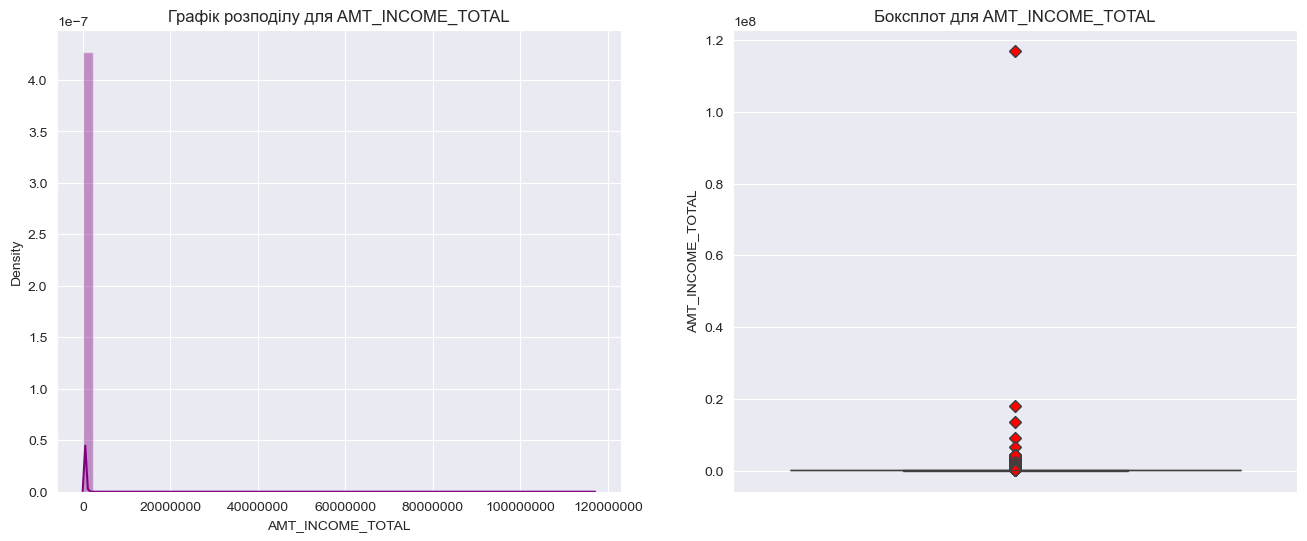

In [132]:
dist_box(df,'AMT_INCOME_TOTAL')

- Графіки кінцевого результату дуже тонкі, й ми можемо спостерігати викид близько ~120 мільйонів.
- Давайте побудуємо графік, розглядаючи лише дохід нижче 99,9% значення, тобто 900 тисяч.

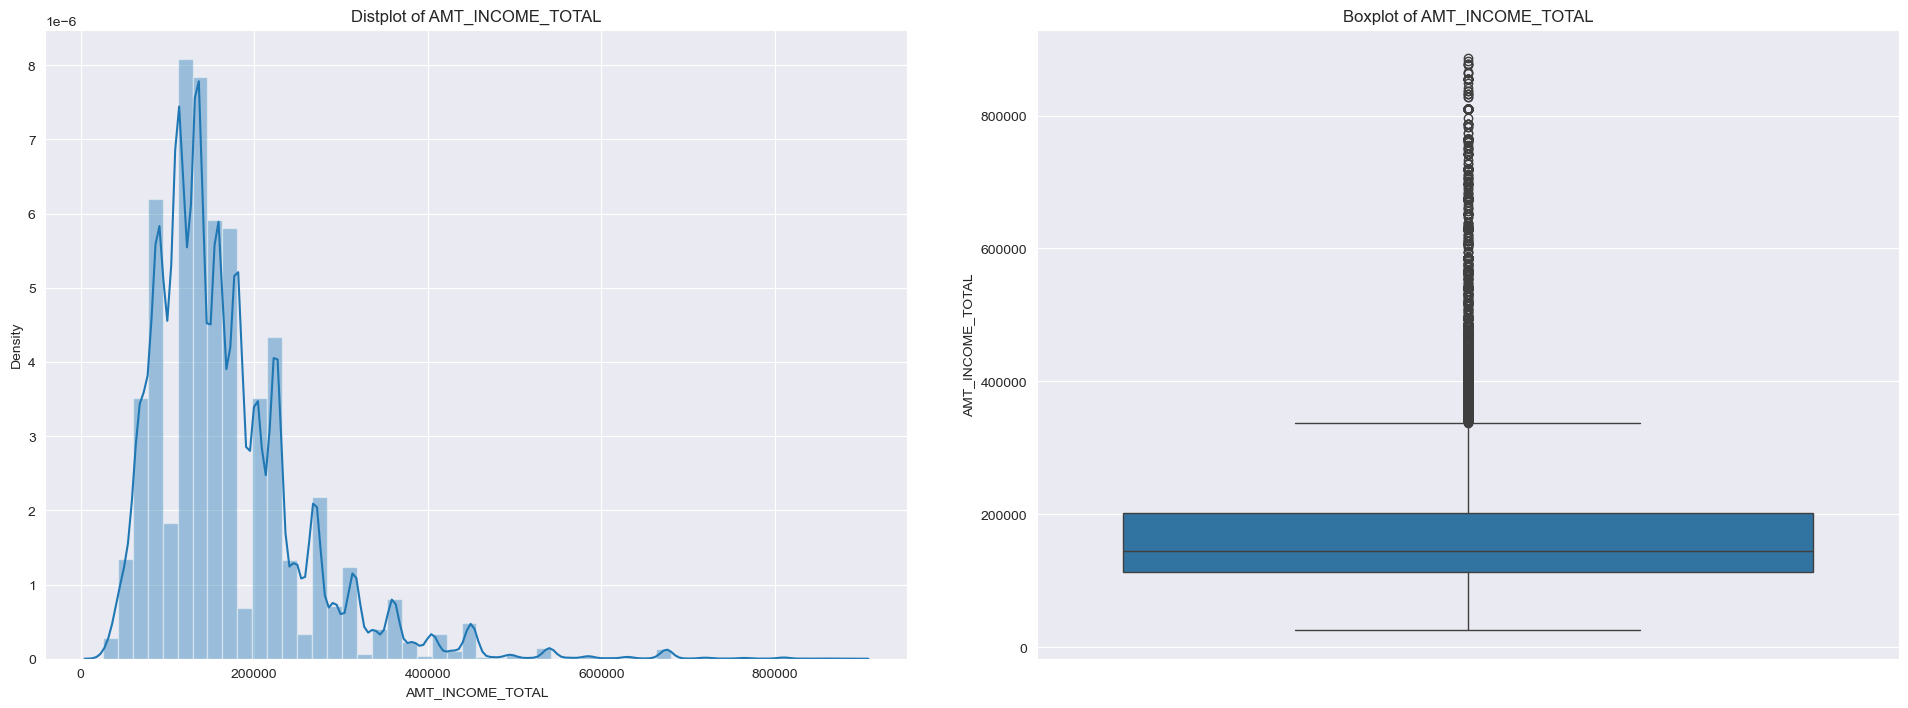

In [133]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.subplots(1,2 ,figsize = (20,8))

    plt.subplot(121)
    sns.distplot(df[df['AMT_INCOME_TOTAL'] < 900000].AMT_INCOME_TOTAL)
    pltname = 'Distplot of ' + 'AMT_INCOME_TOTAL'
    plt.title(pltname)

    plt.subplot(122)
    sns.boxplot(df[df['AMT_INCOME_TOTAL'] < 900000].AMT_INCOME_TOTAL)
    pltname = 'Boxplot of ' + 'AMT_INCOME_TOTAL'
    plt.title(pltname)

    plt.tight_layout(pad = 4)
    plt.show()

Тепер ми можемо чітко побачити розподіл і діапазон даних на обох графіках.
 - Це означає, що значення понад 900 тис. грн доходу явно є викидами

In [134]:
df[df['AMT_INCOME_TOTAL'] > 900000].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
1504     101769       0    Revolving loans           M             1   
1723     102015       0         Cash loans           F             0   
3371     103938       0         Cash loans           F             0   
4603     105384       0    Revolving loans           F             1   
5673     106637       0         Cash loans           M             1   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
1504                1             0        1080000.00   180000.00   
1723                1             0        1935000.00   269550.00   
3371                0             1        1350000.00  2410380.00   
4603                1             0        1350000.00   405000.00   
5673                1             3         967500.00   450000.00   

      AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
1504      9000.00        180000.00   Unaccompanied  Commercial associate   
1723     10534.50        225000.00   Unaccompanied             Pensioner   
3371    109053.00       2250000.00              NA  Commercial associate   
4603     20250.00        405000.00   Unaccompanied  Commercial associate   
5673     30073.50        450000.00   Unaccompanied  Commercial associate   

                NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1504               Higher education            Married  House / apartment   
1723  Secondary / secondary special            Married  House / apartment   
3371               Higher education            Married  House / apartment   
4603               Higher education            Married  House / apartment   
5673               Higher education            Married  House / apartment   

      REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
1504                        0.07       13633           5536   
1723                        0.01       18636         365243   
3371                        0.07       12213            843   
4603                        0.02       14781           4768   
5673                        0.05       11901            546   

      DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
1504               3.00             4971           1               1   
1723            3401.00             2168           1               0   
3371             757.00             4132           1               1   
4603            3469.00             4045           1               1   
5673            2932.00              215           1               1   

      FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
1504                0                 1           0           0   
1723                0                 1           1           0   
3371                0                 1           1           0   
4603                0                 1           0           0   
5673                0                 1           0           0   

     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
1504         Unknown             2.00                     1   
1723         Unknown             2.00                     2   
3371        Managers             3.00                     1   
4603        Managers             2.00                     2   
5673        Managers             5.00                     1   

      REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
1504                            1                     FRIDAY   
1723                            2                     MONDAY   
3371                            1                     SUNDAY   
4603                            2                    TUESDAY   
5673                            1                     MONDAY   

      HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
1504                       13                           0   
1723                       11                           0   
3371                       13                           0   
4603          

**Спостереження**
- Дивлячись на дані, ми бачимо, що дохід понад 900 тис. грн (99,9% значення) є викидом
- Як діаграма розподілу, так і діаграма розмаху чітко показують нам ту саму тенденцію

**Висновок**
- Апліканти з доходом понад 900 тис. грн (99,9% значення) є викидами

# ДЗ 3. Аналіз викидів

Подібно до прикладу, проаналізуйте на викиди колонок
- `CNT_FAM_MEMBERS`
- `AMT_ANNUITY`

Зазначте, які значення в них можна вважати викидами.

In [135]:
df['CNT_FAM_MEMBERS'].value_counts().sort_values(ascending = False).head()

CNT_FAM_MEMBERS
2.00    158357
1.00     67847
3.00     52601
4.00     24697
5.00      3478
Name: count, dtype: int64

In [136]:
(df['CNT_FAM_MEMBERS'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

CNT_FAM_MEMBERS
2.00   51.50
1.00   22.06
3.00   17.11
4.00    8.03
5.00    1.13
Name: proportion, dtype: float64

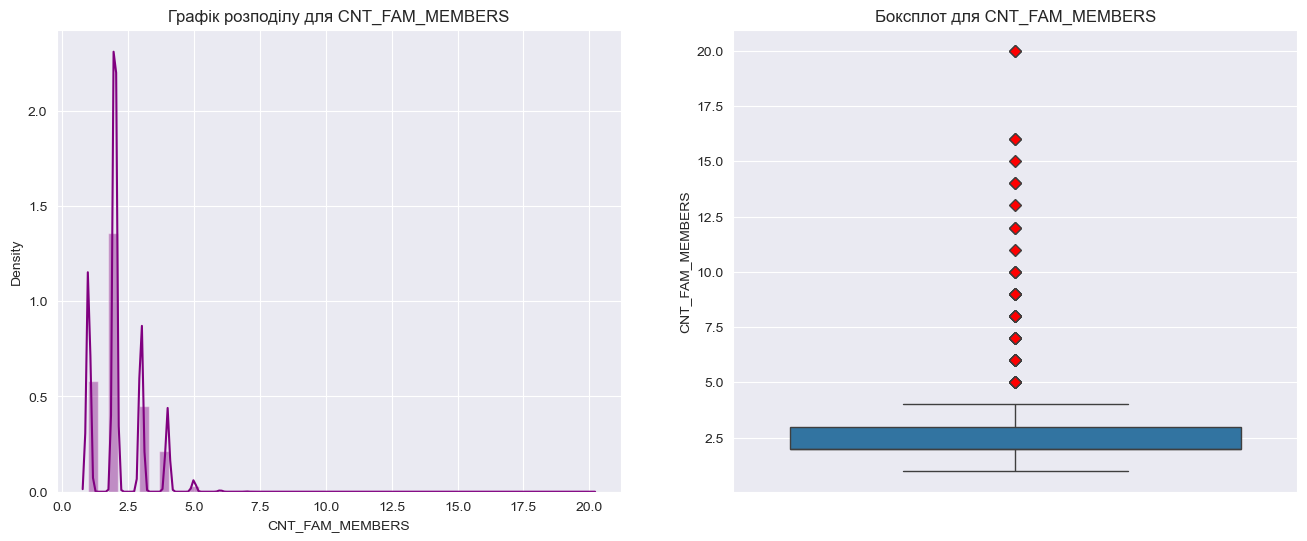

In [137]:
dist_box(df,'CNT_FAM_MEMBERS')

In [138]:
Q1 = df['CNT_FAM_MEMBERS'].quantile(0.25)
Q3 = df['CNT_FAM_MEMBERS'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

1.0


In [139]:
Min_value = (Q1 - 1.5 * IQR)
Max_value = (Q3 + 1.5 * IQR)
print("Minimum value below which outliers exist: {}".format(Min_value))
print("Maximum value above which outliers exist: {}".format(Max_value))

Minimum value below which outliers exist: 0.5
Maximum value above which outliers exist: 4.5


In [140]:
df[df['CNT_FAM_MEMBERS'].isin(range(10, 20))][['YEARS_BIRTH', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS']]

YEARS_BIRTH  CNT_CHILDREN  CNT_FAM_MEMBERS
12615            42             8            10.00
23881            30             9            10.00
34545            47            11            13.00
80948            39            12            14.00
132585           31            10            12.00
154317           31             8            10.00
171125           38            12            14.00
176011           49            14            15.00
183878           56            14            16.00
186820           41            10            12.00
267998           42            14            16.00
276768           40             9            11.00

## Analysis of `CNT_FAM_MEMBERS`

- The most common family size is `2 members`, making up over half of the dataset.
- Other frequent values include `1, 3, and 4 members`, with the majority of families having `1–4 members`.
- Families with `5 or more members` are rare.
- According to the IQR method, values above `4.5` are considered outliers.
- Some extreme cases show up to `20 family members`, which are clearly outliers.

## Observations

- Family size strongly correlates with the number of children — larger families are likely the result of having more children.
- The values appear plausible and reflect real-world variation rather than data entry errors.
- A formal correlation analysis between `CNT_FAM_MEMBERS` and `CNT_CHILDREN` is recommended in future steps.

## Summary

- Review rows with family sizes above 5 — they may be outliers but not necessarily errors.
- Use the same outlier-handling strategy as with `CNT_CHILDREN`.

In [141]:
df['AMT_ANNUITY'].value_counts().sort_values(ascending = False).head()

AMT_ANNUITY
9000.00     6385
13500.00    5514
6750.00     2279
10125.00    2035
37800.00    1602
Name: count, dtype: int64

In [142]:
(df['AMT_ANNUITY'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

AMT_ANNUITY
9000.00    2.08
13500.00   1.79
6750.00    0.74
10125.00   0.66
37800.00   0.52
Name: proportion, dtype: float64

In [143]:
df['AMT_ANNUITY'].describe(percentiles = [0.75,0.99,0.999])

count   307499.00
mean     27108.57
std      14493.74
min       1615.50
50%      24903.00
75%      34596.00
99%      70006.50
99.9%   110047.50
max     258025.50
Name: AMT_ANNUITY, dtype: float64

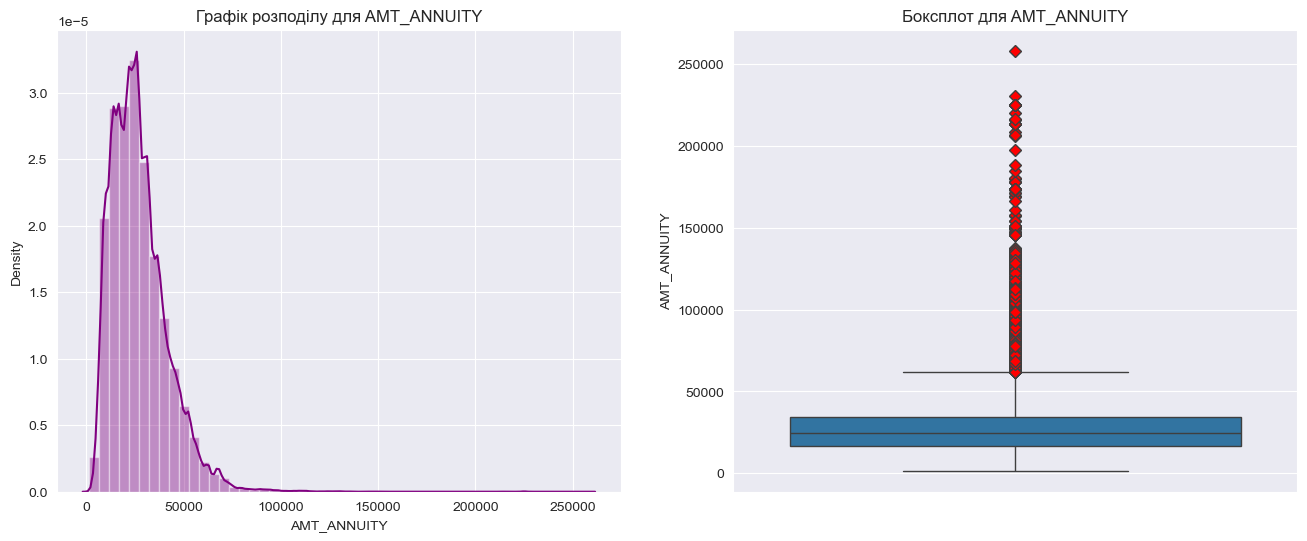

In [144]:
dist_box(df,'AMT_ANNUITY')

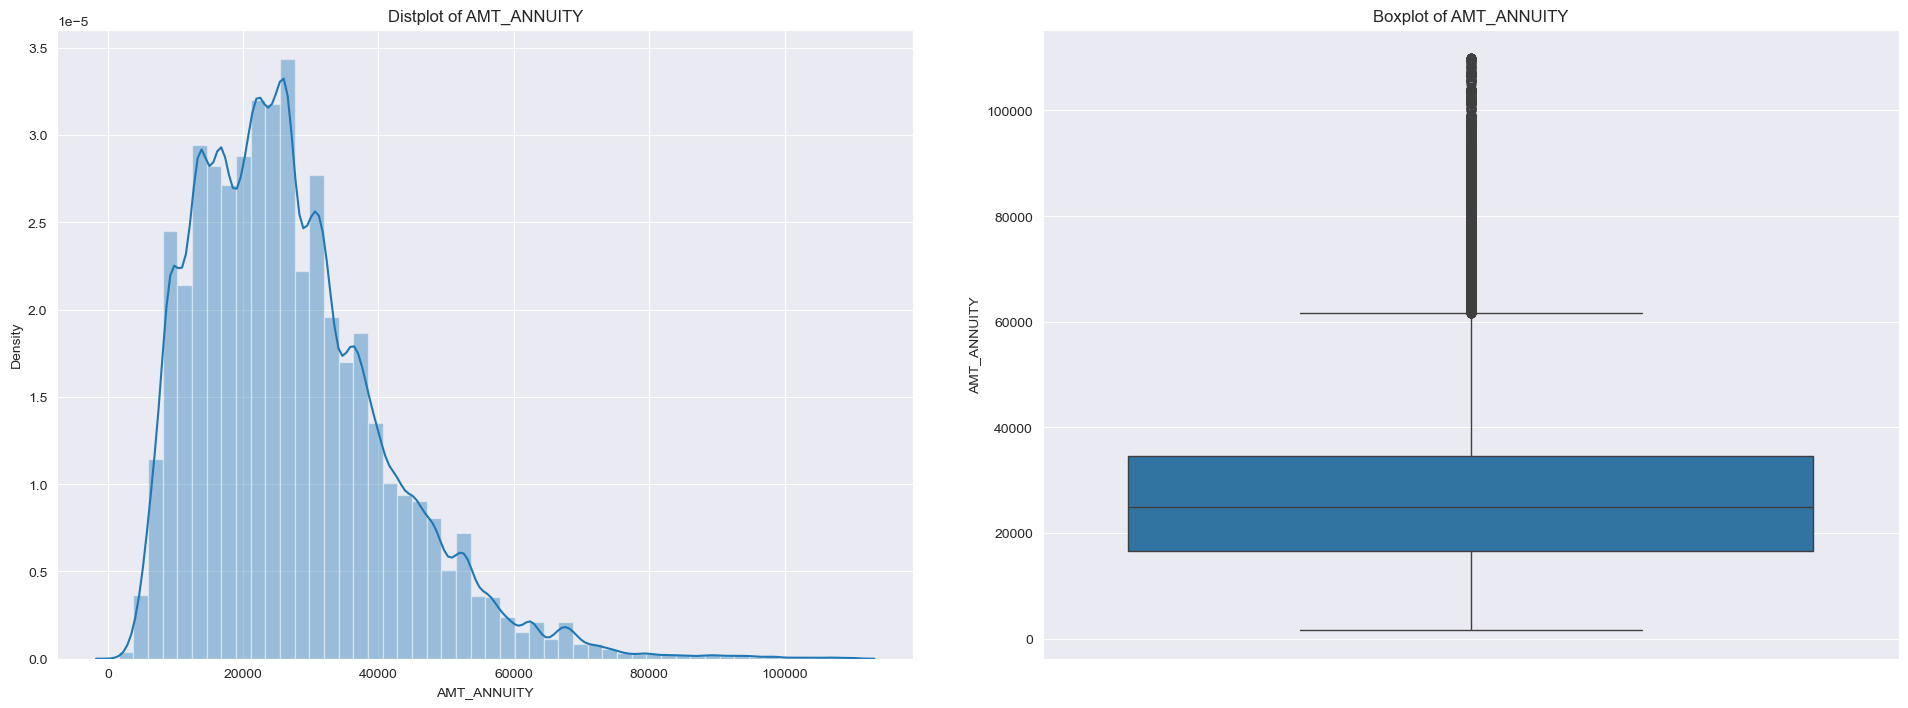

In [145]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.subplots(1,2 ,figsize = (20,8))

    plt.subplot(121)
    sns.distplot(df[df['AMT_ANNUITY'] < 110047.50].AMT_ANNUITY)
    pltname = 'Distplot of ' + 'AMT_ANNUITY'
    plt.title(pltname)

    plt.subplot(122)
    sns.boxplot(df[df['AMT_ANNUITY'] < 110047.50].AMT_ANNUITY)
    pltname = 'Boxplot of ' + 'AMT_ANNUITY'
    plt.title(pltname)

    plt.tight_layout(pad = 4)
    plt.show()

In [146]:
Q1_ANNUITY = df['AMT_ANNUITY'].quantile(0.25)
Q3_ANNUITY = df['AMT_ANNUITY'].quantile(0.75)
IQR_ANNUITY = Q3_ANNUITY - Q1_ANNUITY
print(IQR_ANNUITY)

18072.0


In [147]:
Min_value_ANNUITY = (Q1_ANNUITY - 1.5 * IQR_ANNUITY)
Max_value_ANNUITY = (Q1_ANNUITY + 1.5 * IQR_ANNUITY)
print("Minimum value below which outliers exist: {}".format(Min_value_ANNUITY))
print("Maximum value above which outliers exist: {}".format(Max_value_ANNUITY))

Minimum value below which outliers exist: -10584.0
Maximum value above which outliers exist: 43632.0


In [148]:
print(f"Count above IQR upper bound: {(df['AMT_ANNUITY'] > Max_value_ANNUITY).sum()}")
print(f"Count above 75th percentile: {(df['AMT_ANNUITY'] > 110047.50).sum()}")

Count above IQR upper bound: 37205
Count above 75th percentile: 306


## Analysis of `AMT_ANNUITY`

- The distribution is heavily skewed, with most values concentrated below ~50,000, and a long tail extending beyond 100,000.
- According to descriptive stats:
  - `99th percentile` ≈ 70,000
  - `99.9th percentile` ≈ 110,000
  - `Max value` ≈ 258,000

## Outlier Detection

- The IQR method yielded a maximum threshold of `43,632`, but this excluded a `very large portion of realistic values`, including thousands of typical loans.
- Therefore, IQR `underestimates the upper bound` due to the skewness and is `not suitable in this case`.

## Summary

- Make sense to use `99.9th percentile (~110,000)` as a more realistic upper boundary for outliers.
- Values beyond this threshold can be considered rare or extreme and may be treated as outliers.


# Розбиття на біни безперервних колонок для аналізу

### Категоризація стовпця `AMT_GOODS_PRICE

In [149]:
df['AMT_GOODS_PRICE'].value_counts().sort_values(ascending = False).head()

AMT_GOODS_PRICE
450000.00    26300
225000.00    25282
675000.00    24962
900000.00    15416
270000.00    11428
Name: count, dtype: int64

In [150]:
(df['AMT_GOODS_PRICE'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

AMT_GOODS_PRICE
450000.00   8.55
225000.00   8.22
675000.00   8.12
900000.00   5.01
270000.00   3.72
Name: proportion, dtype: float64

Подивимось статистичний звіт для `AMT_GOODS_PRICE

In [151]:
df['AMT_GOODS_PRICE'].describe(percentiles = [0.25,0.75,0.99,0.9999])

count     307511.00
mean      538316.29
std       369288.98
min        40500.00
25%       238500.00
50%       450000.00
75%       679500.00
99%      1800000.00
99.99%   2933964.00
max      4050000.00
Name: AMT_GOODS_PRICE, dtype: float64

Розподілимо значення в `AMT_GOODS_PRICE` на 5 бінів і створимо новий стовпець `AMT_GOODS_PRICE_CATEGORY`.

In [152]:
df['AMT_GOODS_PRICE_CATEGORY'] = pd.cut(df['AMT_GOODS_PRICE'],
                                        bins = 5, labels = ['very low', 'low', 'medium', 'high', 'very high'])

Перевірка заповнення значень згідно з очікуванням

In [153]:
df['AMT_GOODS_PRICE_CATEGORY'].value_counts()

AMT_GOODS_PRICE_CATEGORY
very low     247251
low           56087
medium         4108
high             47
very high        18
Name: count, dtype: int64

### Категоризація стовпця `YEARS_BIRTH`

Ми будемо класифікувати `YEARS_BIRTH` замість `DAYS_BIRTH`, оскільки роки легше інтерпретувати, ніж дні

In [154]:
df['YEARS_BIRTH'].value_counts().sort_values(ascending = False).head()

YEARS_BIRTH
39    9023
38    8793
37    8727
40    8602
41    8495
Name: count, dtype: int64

In [155]:
(df['YEARS_BIRTH'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

YEARS_BIRTH
39   2.93
38   2.86
37   2.84
40   2.80
41   2.76
Name: proportion, dtype: float64

Подивимось статистичний звіт для  `YEARS_BIRTH`

In [156]:
df['YEARS_BIRTH'].describe(percentiles = [0.25,0.75,0.99,0.9999])

count    307511.00
mean         43.94
std          11.96
min          21.00
25%          34.00
50%          43.00
75%          54.00
99%          67.00
99.99%       69.00
max          69.00
Name: YEARS_BIRTH, dtype: float64

Категоризуймо значення з `YEARS_BIRTH` у новий стовпець `YEARS_BIRTH_CATEGORY`.

In [157]:
df['YEARS_BIRTH_CATEGORY'] = df['YEARS_BIRTH'].apply(age_cat)

Перевірка заповнення значень згідно з очікуванням

In [158]:
df['YEARS_BIRTH_CATEGORY'].value_counts().sort_values(ascending = False)

YEARS_BIRTH_CATEGORY
30-40    82770
40-50    75509
50-60    67955
20-30    48869
60-70    32408
Name: count, dtype: int64

### Категоризація стовпця `YEARS_REGISTRATION`

Ми будемо класифікувати `YEARS_REGISTRATION` замість `DAYS_REGISTRATION`, оскільки роки легше інтерпретувати, ніж дні

In [159]:
df['YEARS_REGISTRATION'].value_counts().sort_values(ascending = False).head()

YEARS_REGISTRATION
1     15661
2     15564
3     13894
13    12866
12    12697
Name: count, dtype: int64

In [160]:
(df['YEARS_REGISTRATION'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

YEARS_REGISTRATION
1    5.09
2    5.06
3    4.52
13   4.18
12   4.13
Name: proportion, dtype: float64

Подивимось статистичний звіт для `YEARS_REGISTRATION`

In [161]:
df['YEARS_REGISTRATION'].describe(percentiles = [0.25,0.75,0.99,0.9999])

count    307511.00
mean         13.66
std           9.66
min           0.00
25%           6.00
50%          12.00
75%          20.00
99%          38.00
99.99%       54.25
max          68.00
Name: YEARS_REGISTRATION, dtype: float64

Категоризуймо значення з `YEARS_REGISTRATION` в новий стовпець `YEARS_REGISTRATION_CATEGORY`.

In [162]:
df['YEARS_REGISTRATION_CATEGORY'] = df['YEARS_REGISTRATION'].apply(age_cat)

Перевірка заповнення значень згідно з очікуванням

In [163]:
df['YEARS_REGISTRATION_CATEGORY'].value_counts().sort_values(ascending = False)

YEARS_REGISTRATION_CATEGORY
0-20     230697
20-30     59288
30-40     16051
40-50      1406
50-60        60
60-70         9
Name: count, dtype: int64

# Зберігання оновлених даних зі стисненням

In [164]:
filename = "assets/hw_1_2/application_data_processed"
compression_options = dict(method='zip', archive_name='application_data_processed.csv')
df.to_csv(f'{filename}.csv.zip', compression=compression_options, index=False)

# Перевірка дисбалансу для цільового стовпця `TARGET`

### Аналіз стовпця `TARGET`

In [165]:
df['TARGET'].value_counts().sort_values(ascending = False)

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [166]:
df['TARGET'].value_counts(normalize = True).sort_values(ascending = False) * 100

TARGET
0   91.93
1    8.07
Name: proportion, dtype: float64

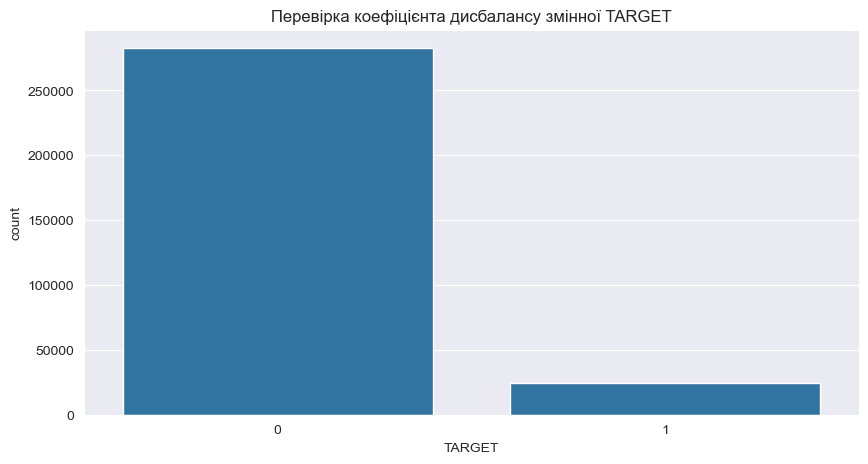

In [167]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['TARGET'], data = df)
plt.title('Перевірка коефіцієнта дисбалансу змінної TARGET')
plt.show()

**Спостереження**

- Ми маємо дисбаланс у змінній `TARGET` на основі % спостережень
 - Значення `TARGET` 1 - це клієнт, який має труднощі з оплатою (прострочення платежу більше ніж на X днів принаймні за одним з перших Y платежів за кредитом). Це лише 8,07% даних
 - Значення `TARGET` 0 - всі інші випадки, окрім 1. Це 91,93% даних

# Розподіл даних на основі `TARGET`

### Створіть новий фрейм даних зі значенням `TARGET` 1
- Значення `TARGET` 1 представляє клієнта з платіжними труднощами (він/вона прострочив платіж більш ніж на X днів принаймні по одному з перших Y платежів за кредитом). Це лише 8,07% даних

In [168]:
df1 = df[df['TARGET'] == 1]

In [169]:
df1.TARGET.value_counts()

TARGET
1    24825
Name: count, dtype: int64

### Створити новий фрейм даних зі значенням `TARGET` 0
- Значення `TARGET` 0 представляє всі інші випадки, крім 1. Це 91.93% даних

In [170]:
df0 = df[df['TARGET'] == 0]

In [171]:
df0.TARGET.value_counts()

TARGET
0    282686
Name: count, dtype: int64

# Одномірний аналіз категоріальних змінних

### Аналіз стовпця `NAME_CONTRACT_TYPE`

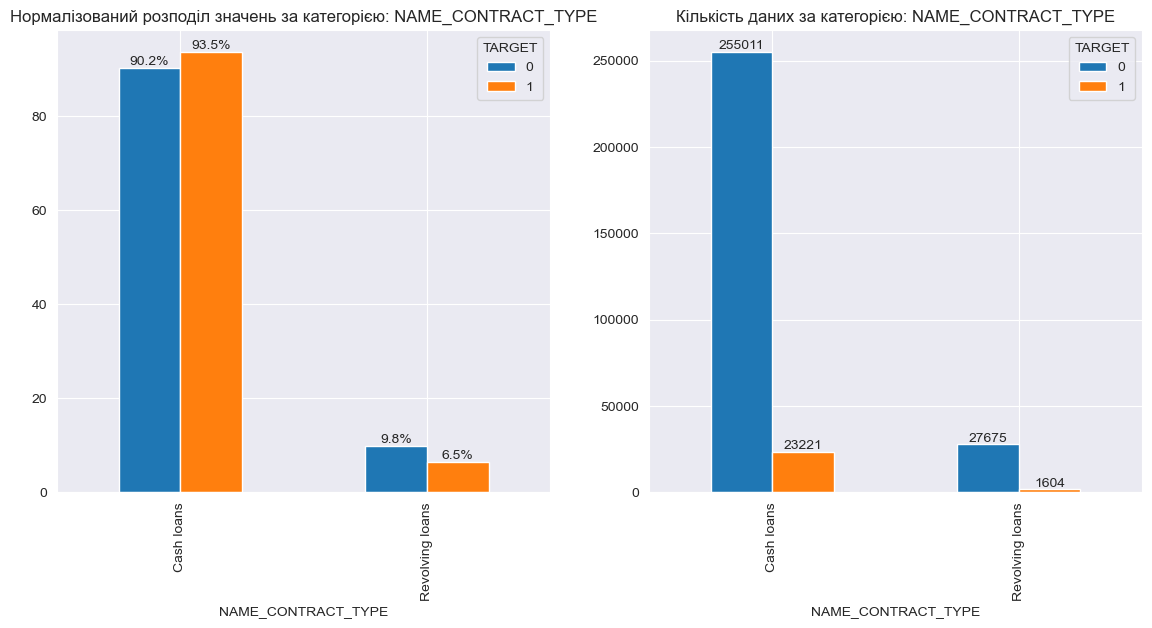

In [172]:
uni_cat_target_compare(df, 'NAME_CONTRACT_TYPE')

**Спостереження**

- Дивлячись на гістограми, ми не бачимо суттєвих відмінностей у `NAME_CONTRACT_TYPE` між клієнтами, які мають труднощі з оплатою, та клієнтами, які платять вчасно

**Висновок**
- Колонка `NAME_CONTRACT_TYPE` не надає жодних переконливих доказів на користь клієнтів, які мають труднощі з оплатою АБО вчасно сплачують

# ДЗ 4. Одновимірний аналіз категоріальної колонки

За наведеним прикладом вище, проведіть аналіз залежності між категоріальною колонкою і цільовою для колонок
- CODE_GENDER
- FLAG_OWN_CAR

Опціонально (для тих, кому цікаво дослідити більше даних)
- NAME_INCOME_TYPE
- NAME_EDUCATION_TYPE
- NAME_FAMILY_STATUS


Чи є вплив цих змінних на цільову та який саме?

In [173]:
df['CODE_GENDER'].value_counts().sort_values(ascending = False)

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

In [174]:
df['CODE_GENDER'].value_counts(normalize = True).sort_values(ascending = False) * 100

CODE_GENDER
F   65.84
M   34.16
Name: proportion, dtype: float64

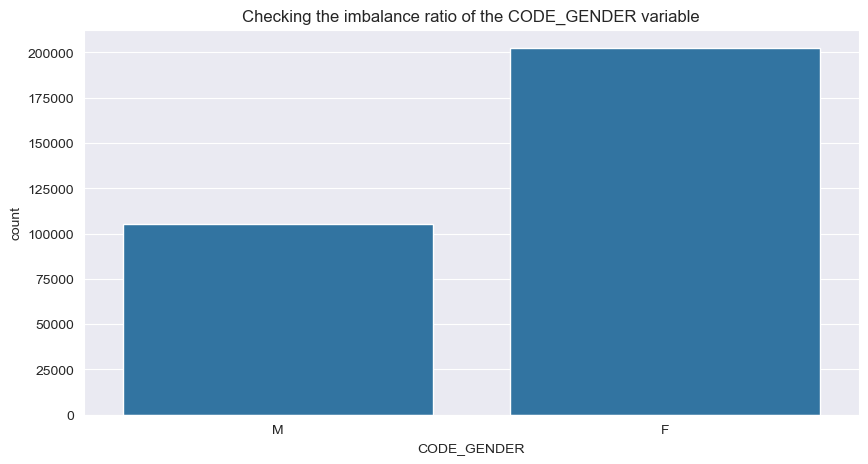

In [175]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['CODE_GENDER'], data = df)
plt.title('Checking the imbalance ratio of the CODE_GENDER variable')
plt.show()

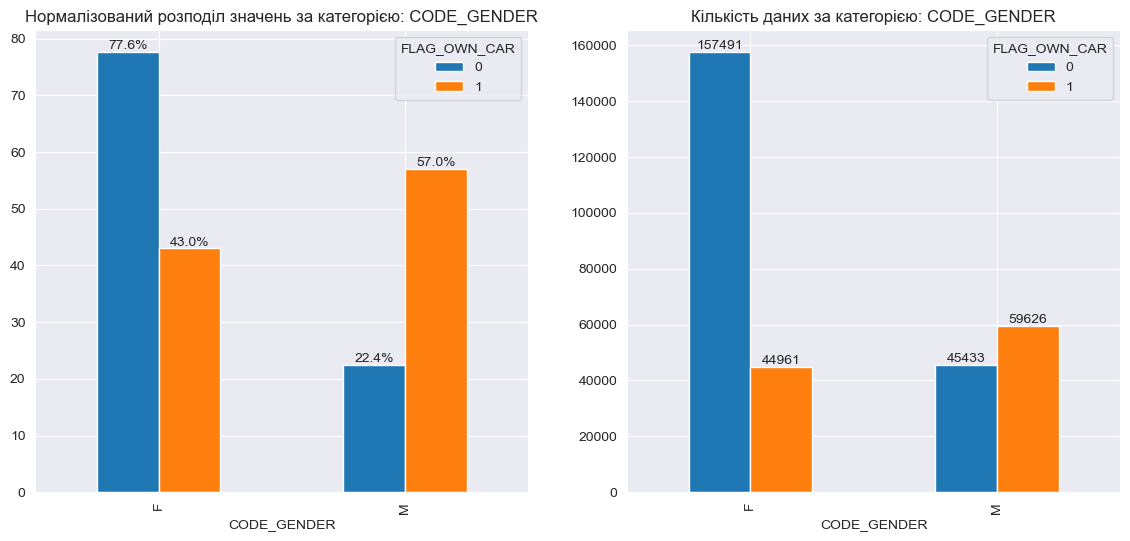

In [176]:
bi_cat_countplot(df, 'CODE_GENDER', hue_column='FLAG_OWN_CAR')

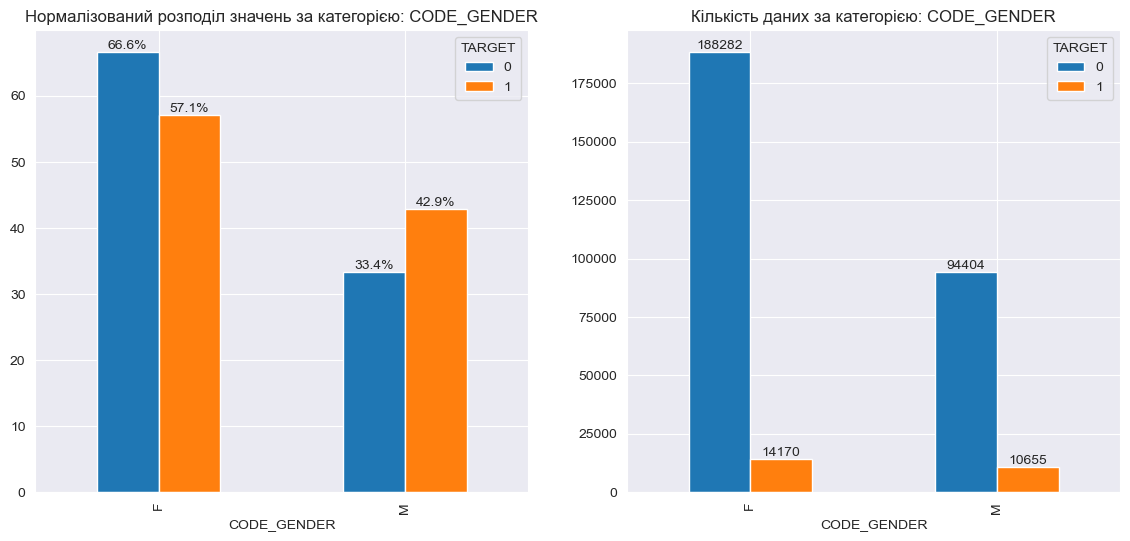

In [177]:
uni_cat_target_compare(df, 'CODE_GENDER')

In [178]:
df['FLAG_OWN_CAR'].value_counts().sort_values(ascending = False)

FLAG_OWN_CAR
0    202924
1    104587
Name: count, dtype: int64

In [179]:
df['FLAG_OWN_CAR'].value_counts(normalize = True).sort_values(ascending = False) * 100

FLAG_OWN_CAR
0   65.99
1   34.01
Name: proportion, dtype: float64

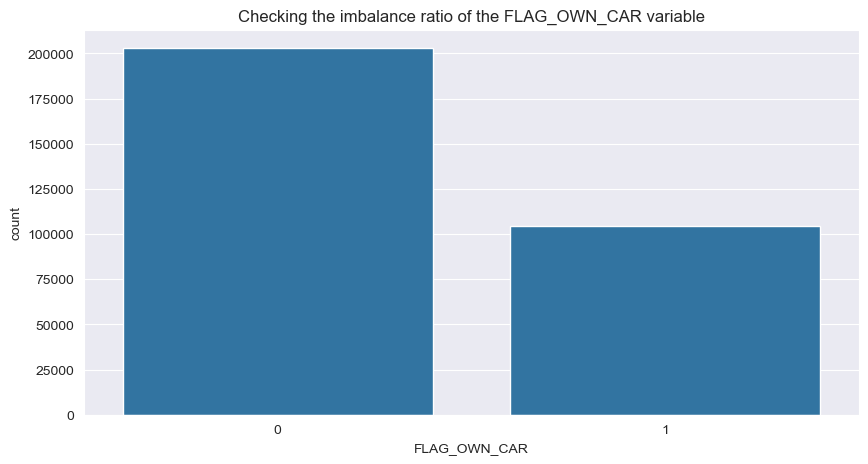

In [180]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['FLAG_OWN_CAR'], data = df)
plt.title('Checking the imbalance ratio of the FLAG_OWN_CAR variable')
plt.show()

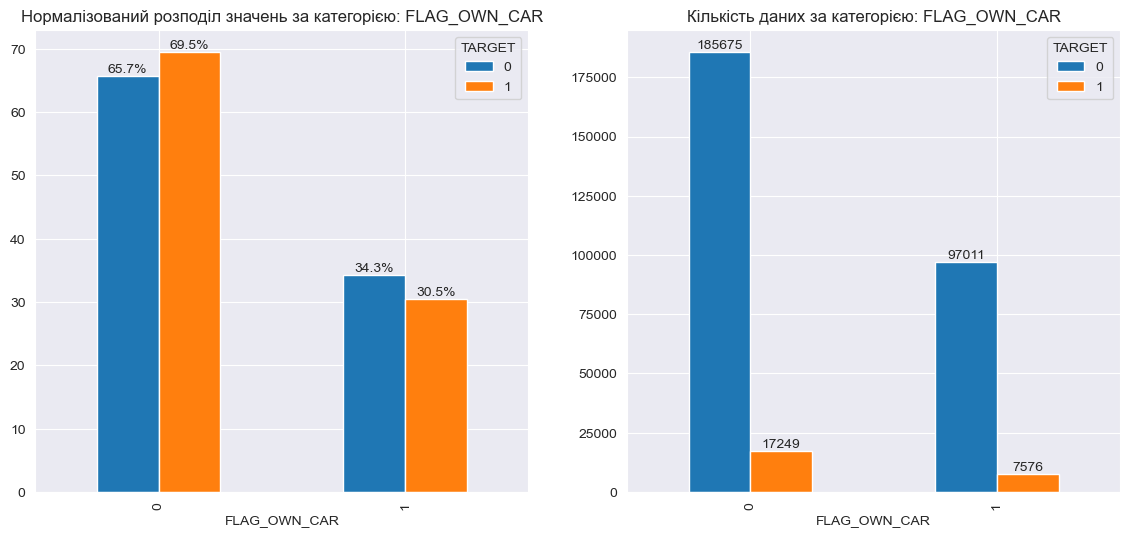

In [181]:
uni_cat_target_compare(df, 'FLAG_OWN_CAR')

## Analysis of `CODE_GENDER` and `FLAG_OWN_CAR` in relation to loan behavior

### Gender Distribution
- The dataset contains more women than men — roughly `2:1`.
- This suggests that `women are more likely to apply for loans` in this dataset.

### Default Rate by Gender (`TARGET`)
- Among `female applicants`, the default rate is lower:
  - Women represent `66.6% of non-defaulters`
  - But only `33.4% of defaults`
- Among `men`, despite being fewer in total, they account for `42.9% of all defaults`
- Women appear to be `more financially responsible` borrowers

### Car Ownership and Default Risk
- Applicants `without a car` make up about `66% of the dataset`
- However, they are responsible for `69.5% of all defaults`
- Meanwhile, those `who own a car` represent `34%` of applicants but only `30.5% of defaults`
- → This suggests that `car ownership correlates with slightly lower default rates`

### Car Ownership by Gender
- `Men are significantly more likely to own a car`: over 50% of male applicants own one.
- In contrast, `only ~27% of female applicants` report owning a car.
- This may reflect `higher mobility needs or asset access among men`.

### Summary
- `Women` are more active loan applicants and `tend to default less often`, indicating `stronger financial discipline` or `more cautious loan behavior`.
- `Men`, while owning cars more frequently, show `higher relative default risk`.
- `Applicants with cars` may represent `lower credit risk` — possibly due to higher income or more stable financial standing.
- These trends suggest that both `gender` and `car ownership` provide `predictive value for credit risk modeling`.


In [182]:
def summarize_categorical_variable(df, column, target_column='TARGET'):

    print(f"\nAbsolute frequency for `{column}`:")
    print(df[column].value_counts().sort_values(ascending=False))

    print(f"\nRelative frequency (%) for `{column}`:")
    print((df[column].value_counts(normalize=True).sort_values(ascending=False) * 100).round(2))

    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, data=df)
    plt.title(f'Checking the imbalance ratio of the `{column}` variable')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    uni_cat_target_compare(df, column)


Absolute frequency for `NAME_INCOME_TYPE`:
NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

Relative frequency (%) for `NAME_INCOME_TYPE`:
NAME_INCOME_TYPE
Working                51.63
Commercial associate   23.29
Pensioner              18.00
State servant           7.06
Unemployed              0.01
Student                 0.01
Businessman             0.00
Maternity leave         0.00
Name: proportion, dtype: float64


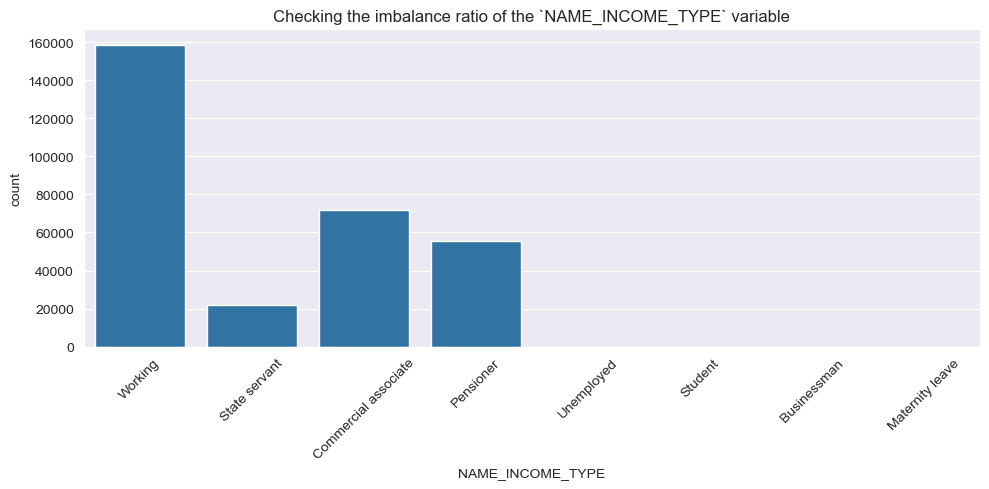

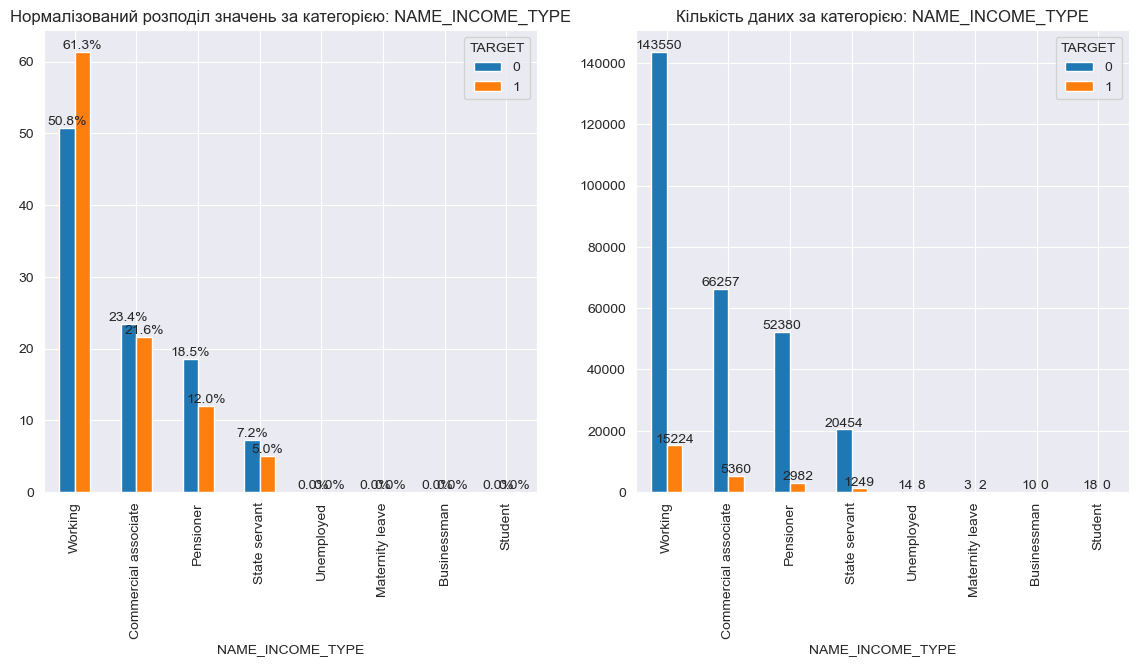

In [183]:
summarize_categorical_variable(df, 'NAME_INCOME_TYPE')


Absolute frequency for `NAME_EDUCATION_TYPE`:
NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

Relative frequency (%) for `NAME_EDUCATION_TYPE`:
NAME_EDUCATION_TYPE
Secondary / secondary special   71.02
Higher education                24.34
Incomplete higher                3.34
Lower secondary                  1.24
Academic degree                  0.05
Name: proportion, dtype: float64


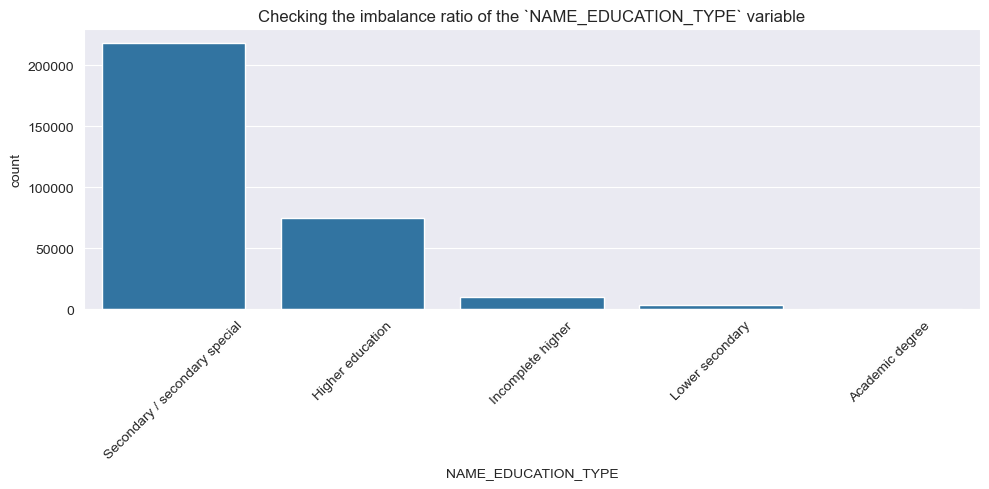

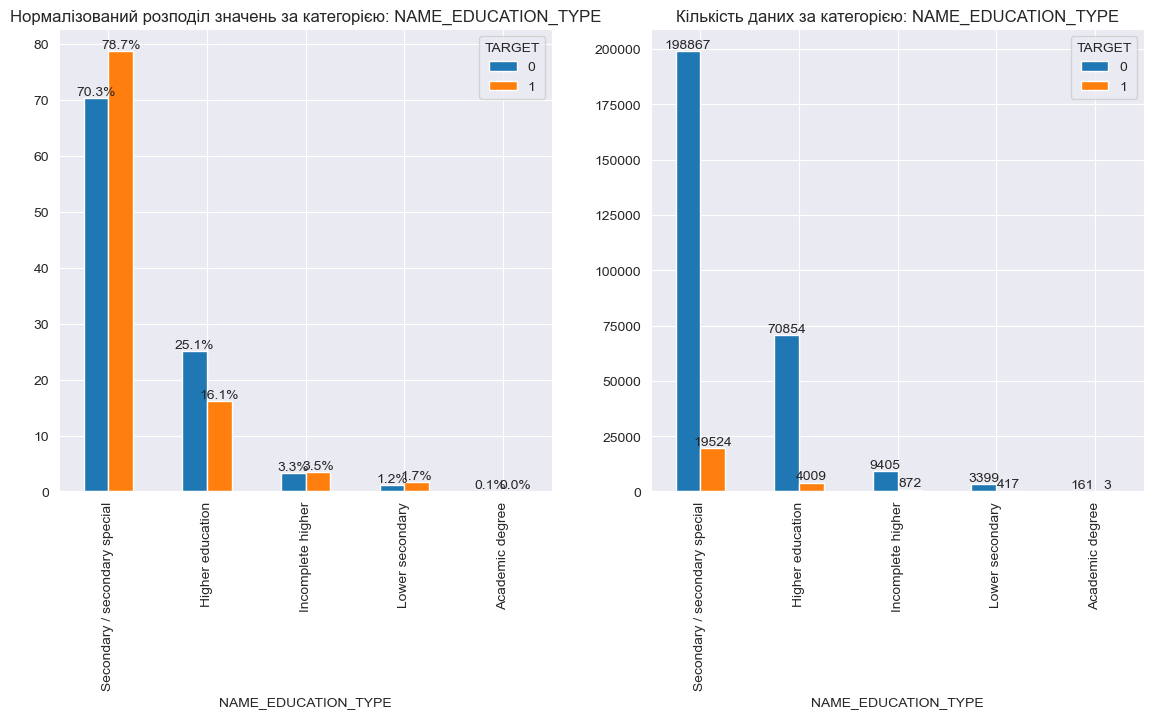

In [184]:
summarize_categorical_variable(df, 'NAME_EDUCATION_TYPE')


Absolute frequency for `NAME_FAMILY_STATUS`:
NAME_FAMILY_STATUS
Married                 196434
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: count, dtype: int64

Relative frequency (%) for `NAME_FAMILY_STATUS`:
NAME_FAMILY_STATUS
Married                63.88
Single / not married   14.78
Civil marriage          9.68
Separated               6.43
Widow                   5.23
Name: proportion, dtype: float64


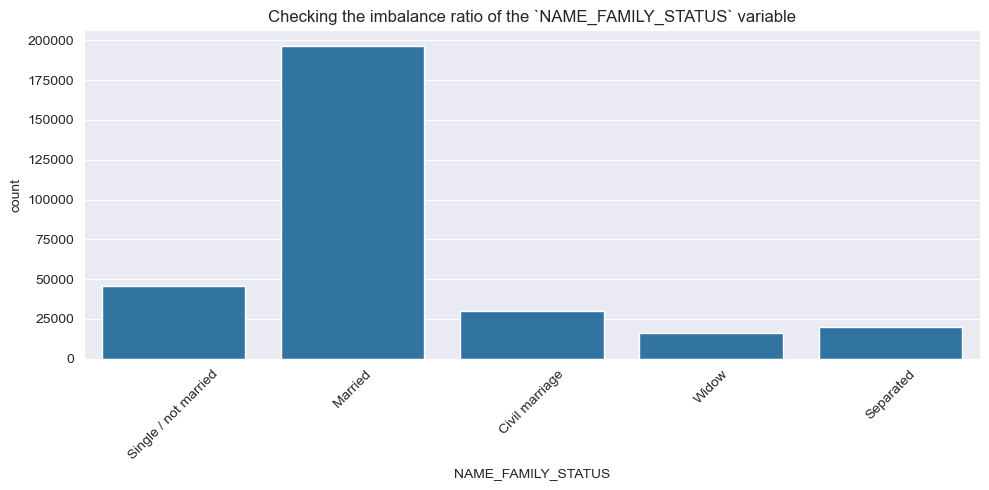

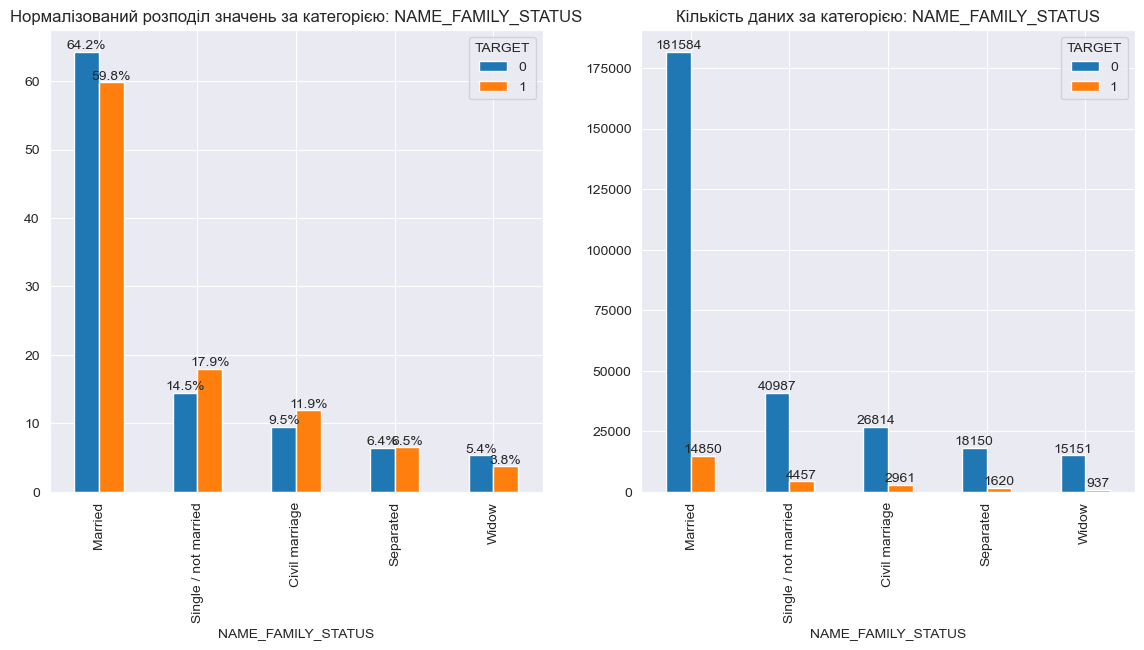

In [185]:
summarize_categorical_variable(df, 'NAME_FAMILY_STATUS')

## Analysis of Categorical Variables in Relation to Loan Default (TARGET)
### NAME_INCOME_TYPE
- `Most frequent group`: "Working" (≈158k), followed by "Commercial associate" and "Pensioner".
- `Default ratio`:
  - "Working" individuals account for `61.3% of defaults` and only `50.8% of non-defaulters` → higher risk group.
  - "Pensioners" make up `18.5% of non-defaulters` but only `12% of defaults` → relatively safer borrowers.
  - "State servants" also show slightly better reliability (`7.2%` vs. `5.0%`).
- `Conclusion`: Borrowers with stable or fixed income (like pensioners or state servants) demonstrate better credit behavior than others like "Working" or "Commercial associate".

### NAME_EDUCATION_TYPE
- `Most common`: "Secondary / secondary special" (over 210k).
- `Default pattern`:
  - Applicants with `secondary education` dominate both defaulters and non-defaulters, but are slightly overrepresented among defaults.
  - `Higher education` shows a more favorable distribution — `25.1% of non-defaulters`, but only `16.1% of defaults`.
  - `Lower secondary` and `incomplete higher` are minorities but have higher default shares relative to their population.
- `Conclusion`: `Higher education is associated with lower default rates`, while lower education levels show elevated risk.

### NAME_FAMILY_STATUS
- `Most common`: "Married" (≈196k), followed by "Single / not married".
- `Default behavior`:
  - Married applicants show `balanced proportions` between defaulters and non-defaulters (~60% in both).
  - Single and Civil marriage groups are slightly overrepresented among defaulters.
- `Conclusion`: `Married individuals tend to be more stable borrowers`, possibly due to more structured household finances.

## General Summary
- `Income Type` and `Education Level` strongly correlate with loan performance.
- `Higher education` and `fixed income` (pensions, public sector) reduce default likelihood.
- `Being married` slightly correlates with lower risk.
- `Working individuals and those with basic education` form a significant portion of defaulters.

# Кореляційний аналіз числових змінних

### Побудова кореляційної матриці для випадків із платіжними труднощами

In [186]:
df1.select_dtypes(include=["int64","float64"]).shape

(24825, 39)

Є 66 числових стовпчиків. Створимо кореляційну матрицб `corr` для кращого перегляду результатів

In [187]:
corr_df1 = df1.select_dtypes(include=["int64","float64"]).corr()

In [188]:
corr_df1.head()

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
TARGET               NaN           NaN               NaN         NaN   
CNT_CHILDREN         NaN          1.00              0.00       -0.00   
AMT_INCOME_TOTAL     NaN          0.00              1.00        0.04   
AMT_CREDIT           NaN         -0.00              0.04        1.00   
AMT_ANNUITY          NaN          0.03              0.05        0.75   

                  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
TARGET                    NaN              NaN                         NaN   
CNT_CHILDREN             0.03            -0.01                       -0.03   
AMT_INCOME_TOTAL         0.05             0.04                        0.01   
AMT_CREDIT               0.75             0.98                        0.07   
AMT_ANNUITY              1.00             0.75                        0.07   

                  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
TARGET                   NaN            NaN                NaN   
CNT_CHILDREN           -0.26          -0.19              -0.15   
AMT_INCOME_TOTAL       -0.00          -0.01              -0.00   
AMT_CREDIT              0.14           0.00               0.03   
AMT_ANNUITY             0.01          -0.08              -0.03   

                  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
TARGET                        NaN              NaN                   NaN   
CNT_CHILDREN                 0.03             0.89                  0.04   
AMT_INCOME_TOTAL             0.00             0.01                 -0.02   
AMT_CREDIT                   0.05             0.05                 -0.06   
AMT_ANNUITY                  0.02             0.08                 -0.07   

                  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
TARGET                                    NaN                      NaN   
CNT_CHILDREN                             0.04                    -0.02   
AMT_INCOME_TOTAL                        -0.02                     0.01   
AMT_CREDIT                              -0.07                     0.03   
AMT_ANNUITY                             -0.09                     0.03   

                  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
TARGET                                   NaN                         NaN   
CNT_CHILDREN                           -0.02                       -0.02   
AMT_INCOME_TOTAL                        0.01                        0.01   
AMT_CREDIT                              0.02                        0.03   
AMT_ANNUITY                             0.03                        0.07   

                  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
TARGET                                    NaN                     NaN   
CNT_CHILDREN                            -0.01                   -0.00   
AMT_INCOME_TOTAL                         0.01                   -0.00   
AMT_CREDIT                               0.03                   -0.03   
AMT_ANNUITY                              0.06                   -0.01   

                  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
TARGET                               NaN                      NaN   
CNT_CHILDREN                        0.05                     0.05   
AMT_INCOME_TOTAL                   -0.00                    -0.00   
AMT_CREDIT                         -0.04                    -0.02   
AMT_ANNUITY                         0.00                     0.01   

                  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
TARGET                     NaN           NaN                       NaN   
CNT_CHILDREN             -0.01         -0.02                      0.03   
AMT_INCOME_TOTAL          0.01         -0.02                     -0.00   
AMT_CREDIT                0.12          0.08                      0.02   
AMT_ANNUITY               0.12          0.04                      0.01   

                  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL

Створимо теплову карту для перегляду кореляцій вище 80% і 99,99%

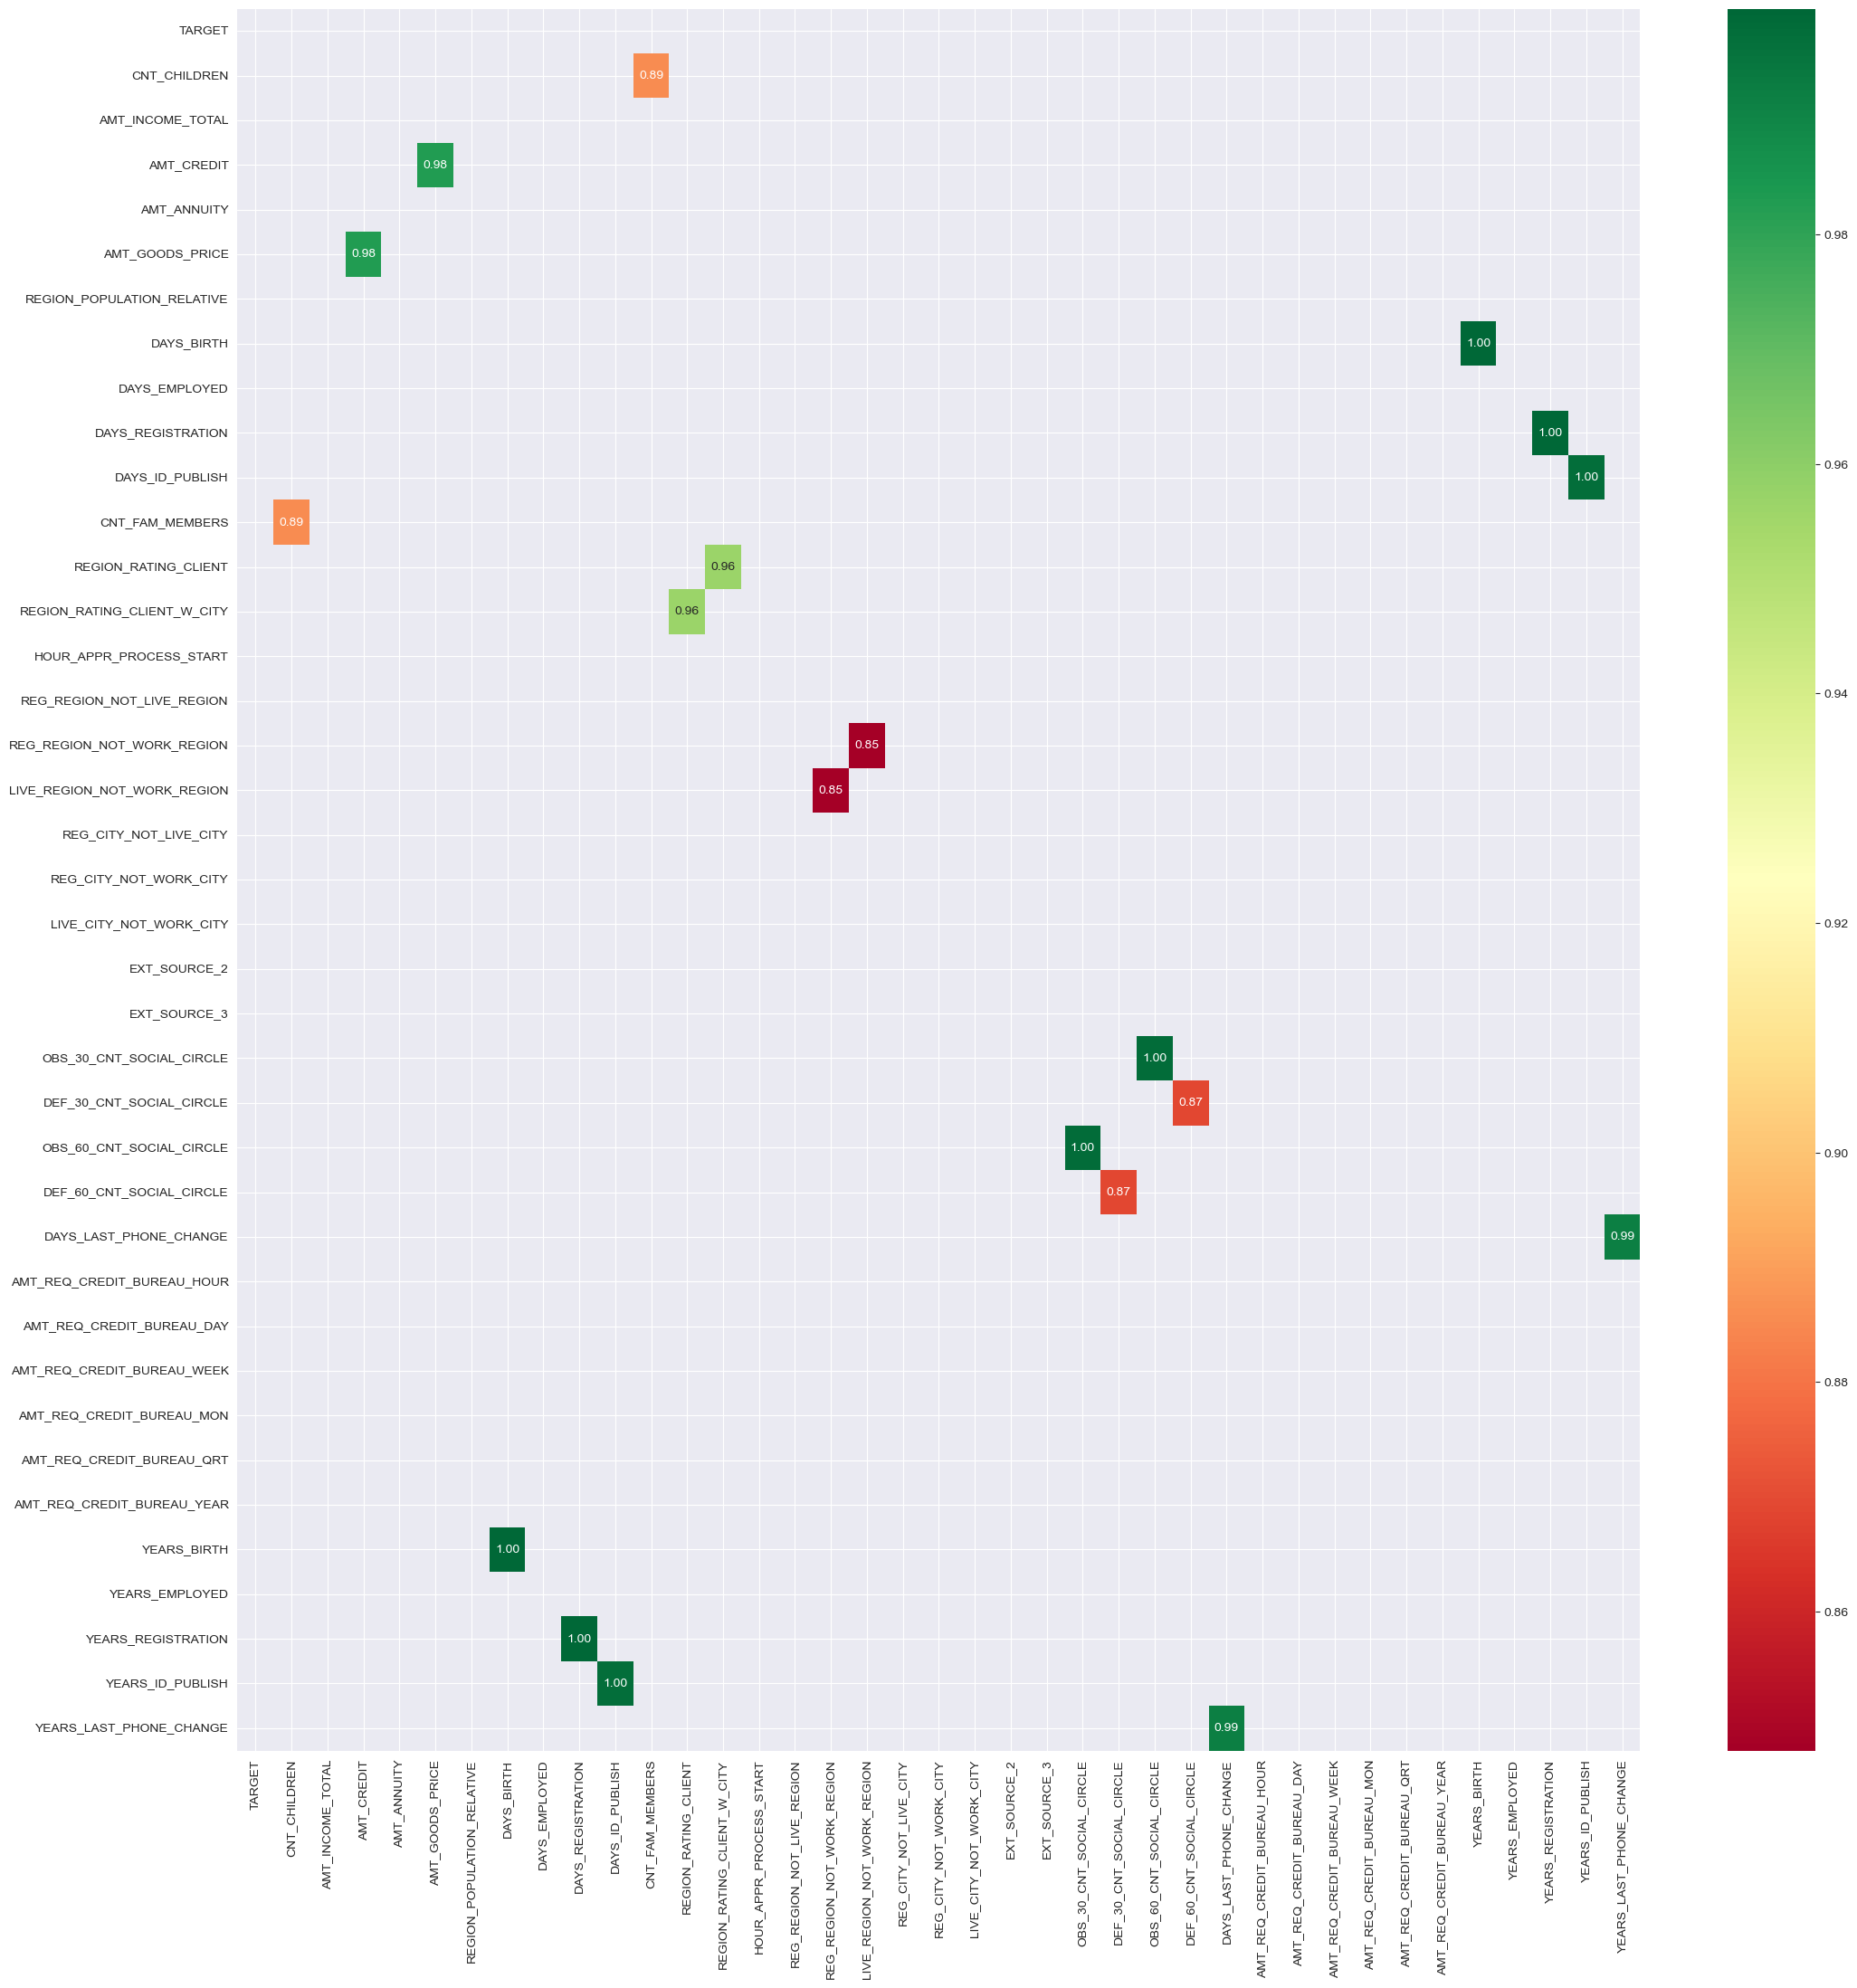

In [189]:
plt.figure(figsize = (25,25))
sns.heatmap(data = corr_df1[(corr_df1 >= 0.8) & (corr_df1 < 0.9999)], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

### Подивимось на 10 найкращих кореляцій для випадків із платіжними труднощами

In [190]:
corr_df1[corr_df1 <= 0.99].unstack().sort_values(ascending = False).head(22)

AMT_GOODS_PRICE              AMT_CREDIT                    0.98
AMT_CREDIT                   AMT_GOODS_PRICE               0.98
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.96
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY   0.96
CNT_CHILDREN                 CNT_FAM_MEMBERS               0.89
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.89
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE      0.87
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.87
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.85
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION   0.85
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY       0.78
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.78
AMT_GOODS_PRICE              AMT_ANNUITY                   0.75
AMT_ANNUITY                  AMT_GOODS_PRICE               0.75
                             AMT_CREDIT                    0.75
AMT_CREDIT                   AMT_ANNUITY

Оскільки у нас є комбінації, що повторюються, дивлячись на наведену вище таблицю і видаляючи дублі, ми отримуємо топ-10 кореляцій, як показано нижче:

- AMT_GOODS_PRICE -              AMT_CREDIT                    0.98
- REGION_RATING_CLIENT -         REGION_RATING_CLIENT_W_CITY   0.96
- CNT_FAM_MEMBERS -              CNT_CHILDREN                  0.89
- DEF_60_CNT_SOCIAL_CIRCLE -     DEF_30_CNT_SOCIAL_CIRCLE      0.87
- REG_REGION_NOT_WORK_REGION -   LIVE_REGION_NOT_WORK_REGION   0.85
- LIVE_CITY_NOT_WORK_CITY -      REG_CITY_NOT_WORK_CITY        0.78
- AMT_ANNUITY -                  AMT_GOODS_PRICE               0.75
- AMT_ANNUITY -                  AMT_CREDIT                    0.75
- DAYS_EMPLOYED -                FLAG_DOCUMENT_6               0.62
- DAYS_BIRTH -                   DAYS_EMPLOYED                 0.58

### Побудова кореляційної матриці для випадків із вчасними платежеми

In [191]:
df0.select_dtypes(include=["int64","float64"]).shape

(282686, 39)

Є 66 числових стовпчиків. Створимо кореляційну матрицю `corr` для кращого перегляду результатів

In [192]:
corr_df0 = df0.select_dtypes(include=["int64","float64"]).corr()

In [193]:
corr_df0.head()

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
TARGET               NaN           NaN               NaN         NaN   
CNT_CHILDREN         NaN          1.00              0.03        0.00   
AMT_INCOME_TOTAL     NaN          0.03              1.00        0.34   
AMT_CREDIT           NaN          0.00              0.34        1.00   
AMT_ANNUITY          NaN          0.02              0.42        0.77   

                  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
TARGET                    NaN              NaN                         NaN   
CNT_CHILDREN             0.02            -0.00                       -0.02   
AMT_INCOME_TOTAL         0.42             0.35                        0.17   
AMT_CREDIT               0.77             0.99                        0.10   
AMT_ANNUITY              1.00             0.78                        0.12   

                  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
TARGET                   NaN            NaN                NaN   
CNT_CHILDREN           -0.34          -0.25              -0.19   
AMT_INCOME_TOTAL       -0.06          -0.14              -0.06   
AMT_CREDIT              0.05          -0.07              -0.01   
AMT_ANNUITY            -0.01          -0.10              -0.04   

                  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
TARGET                        NaN              NaN                   NaN   
CNT_CHILDREN                 0.03             0.88                  0.02   
AMT_INCOME_TOTAL            -0.02             0.03                 -0.19   
AMT_CREDIT                   0.00             0.06                 -0.10   
AMT_ANNUITY                 -0.01             0.08                 -0.13   

                  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
TARGET                                    NaN                      NaN   
CNT_CHILDREN                             0.02                    -0.01   
AMT_INCOME_TOTAL                        -0.20                     0.08   
AMT_CREDIT                              -0.11                     0.05   
AMT_ANNUITY                             -0.15                     0.05   

                  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
TARGET                                   NaN                         NaN   
CNT_CHILDREN                           -0.01                        0.01   
AMT_INCOME_TOTAL                        0.07                        0.14   
AMT_CREDIT                              0.02                        0.05   
AMT_ANNUITY                             0.04                        0.08   

                  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
TARGET                                    NaN                     NaN   
CNT_CHILDREN                             0.02                    0.02   
AMT_INCOME_TOTAL                         0.13                    0.01   
AMT_CREDIT                               0.05                   -0.03   
AMT_ANNUITY                              0.08                   -0.01   

                  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
TARGET                               NaN                      NaN   
CNT_CHILDREN                        0.07                     0.07   
AMT_INCOME_TOTAL                    0.02                     0.02   
AMT_CREDIT                         -0.02                     0.00   
AMT_ANNUITY                         0.00                     0.01   

                  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
TARGET                     NaN           NaN                       NaN   
CNT_CHILDREN             -0.02         -0.04                      0.01   
AMT_INCOME_TOTAL          0.14         -0.07                     -0.03   
AMT_CREDIT                0.13          0.04                     -0.00   
AMT_ANNUITY               0.13          0.03                     -0.01   

                  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL

Створимо теплову карту для перегляду кореляцій вище 80% і 99,99%

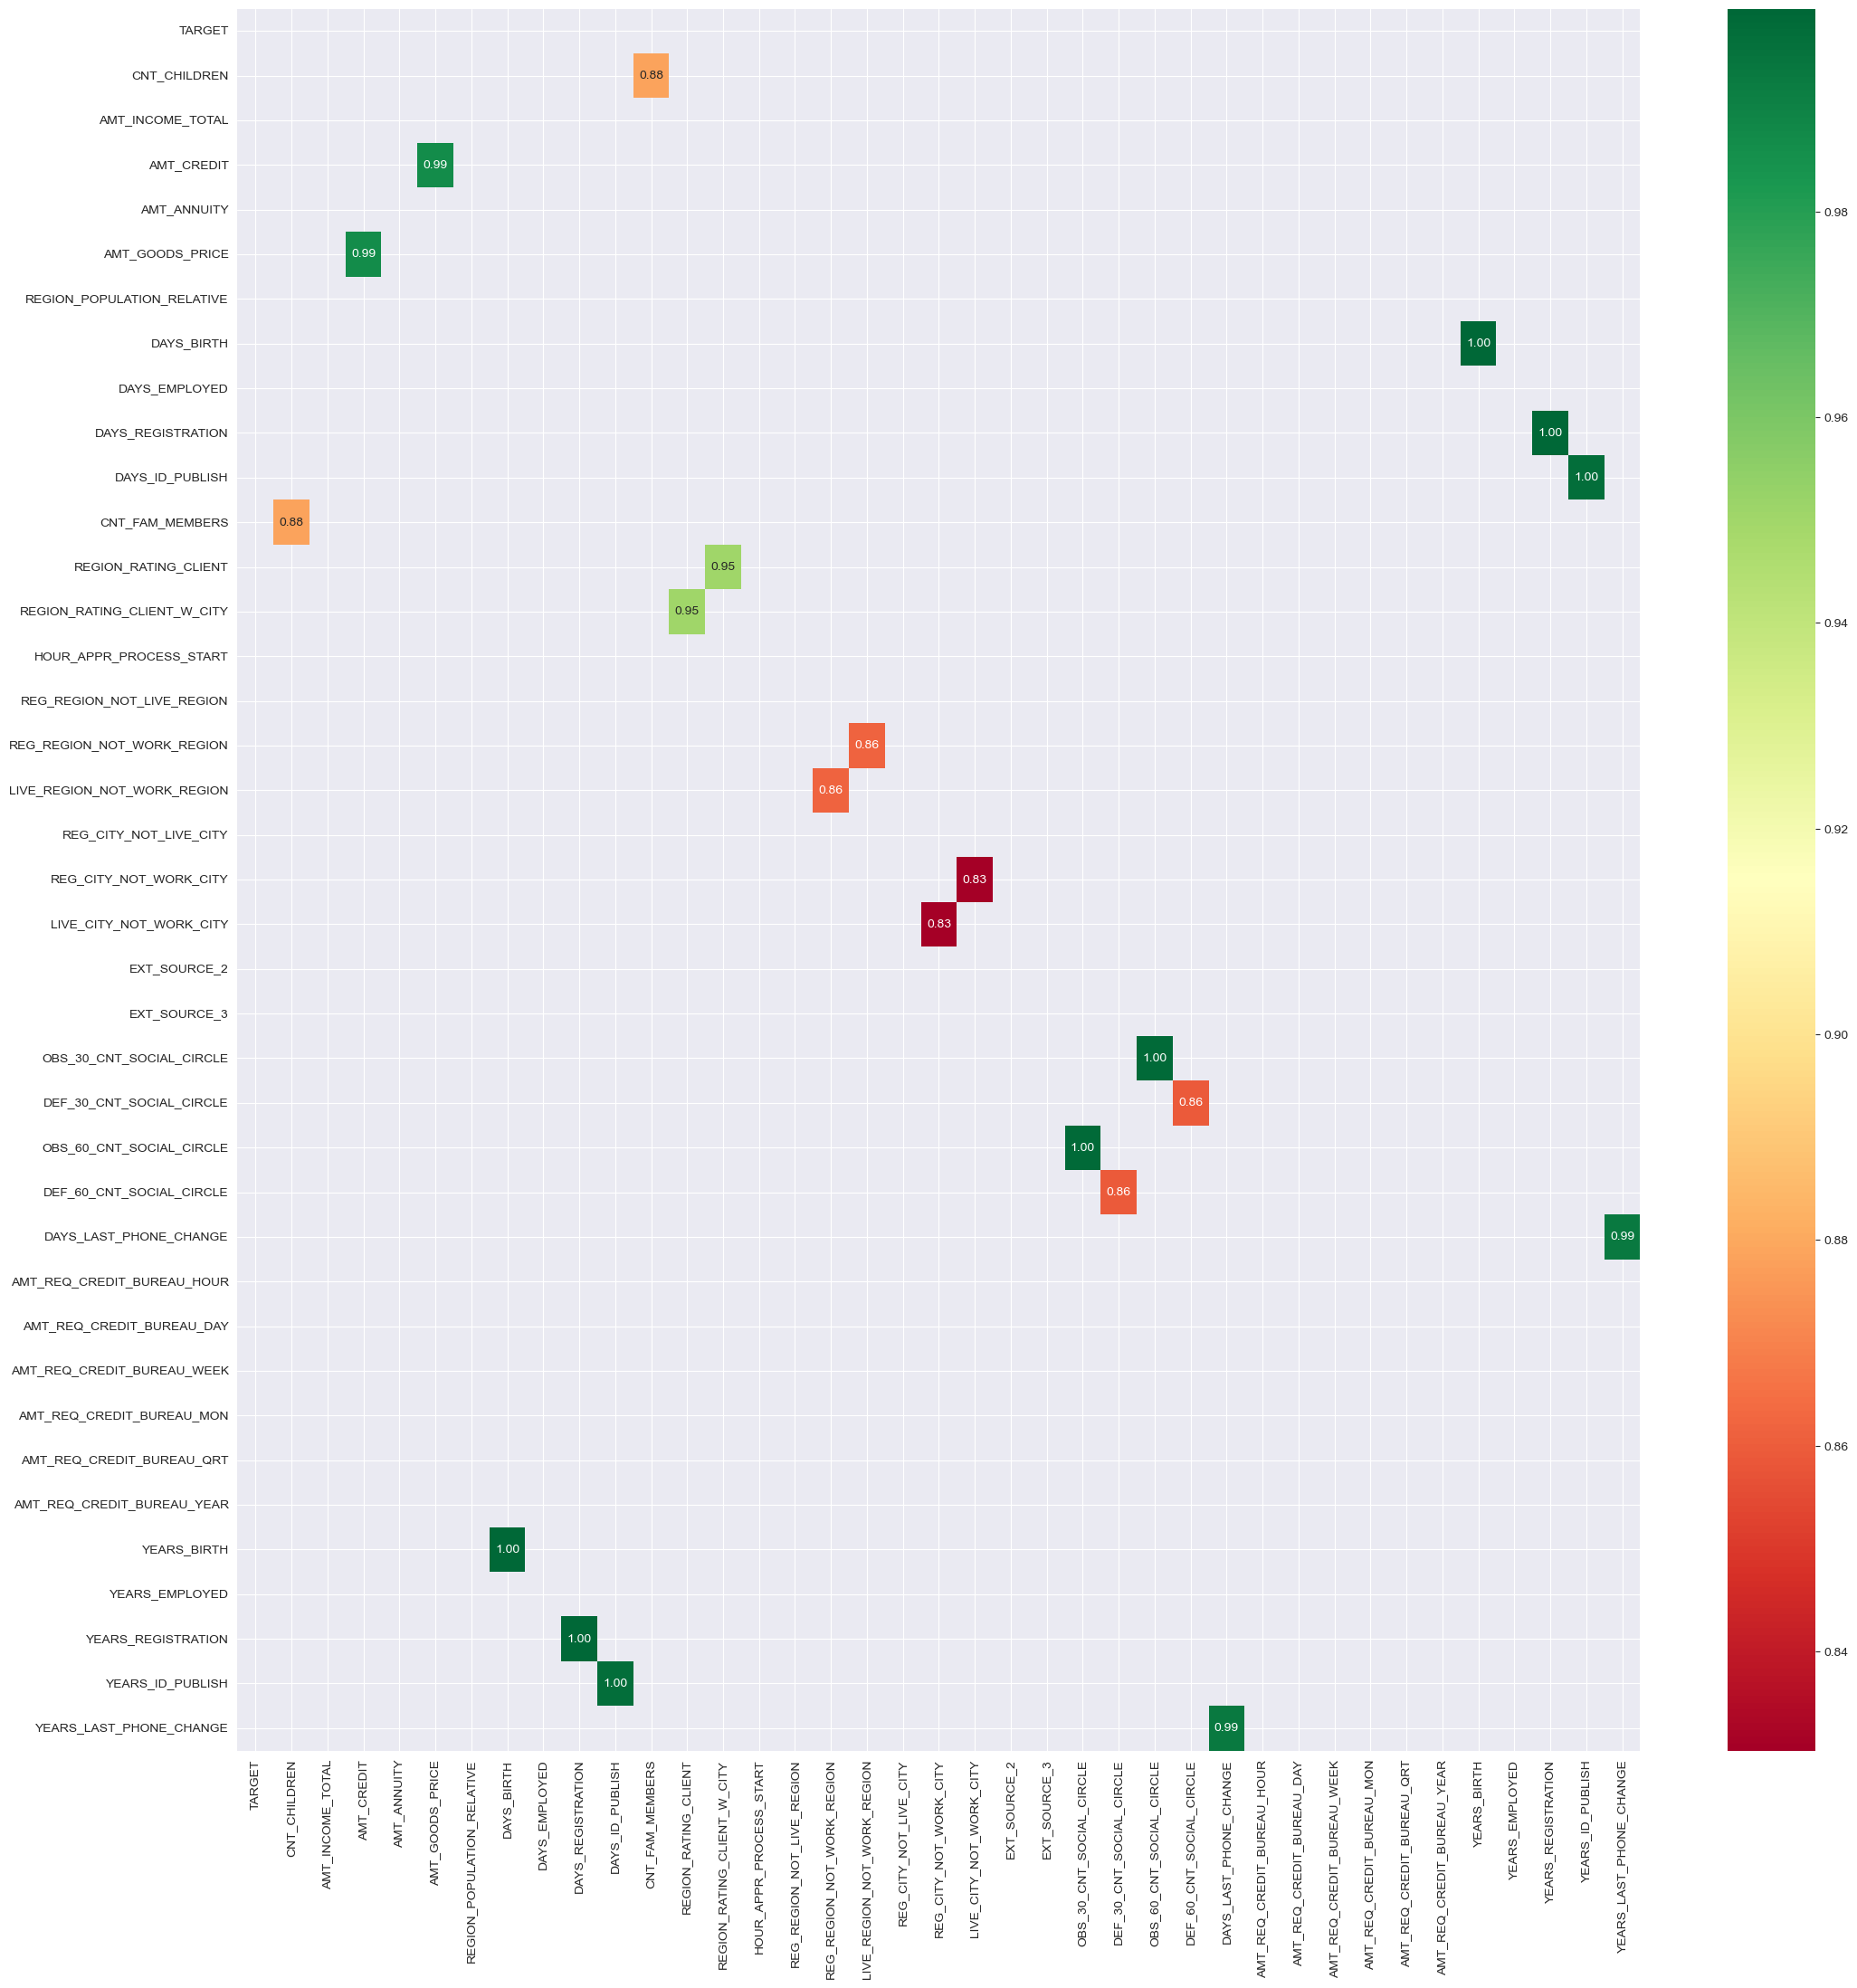

In [194]:
plt.figure(figsize = (25,25))
sns.heatmap(data = corr_df0[(corr_df0 >= 0.8) & (corr_df0 < 0.9999)], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

### Подивимось на 10 найкращих кореляцій для вчасних платежів

In [195]:
corr_df0[corr_df0 <= 0.99].unstack().sort_values(ascending = False).head(28)

AMT_CREDIT                   AMT_GOODS_PRICE               0.99
AMT_GOODS_PRICE              AMT_CREDIT                    0.99
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY   0.95
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.95
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.88
CNT_CHILDREN                 CNT_FAM_MEMBERS               0.88
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.86
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION   0.86
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE      0.86
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.86
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.83
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY       0.83
AMT_ANNUITY                  AMT_GOODS_PRICE               0.78
AMT_GOODS_PRICE              AMT_ANNUITY                   0.78
AMT_ANNUITY                  AMT_CREDIT                    0.77
AMT_CREDIT                   AMT_ANNUITY

Оскільки у нас є комбінації, що повторюються, дивлячись на наведену вище таблицю і видаляючи дублі, ми отримуємо топ-10 кореляцій, як показано нижче:

- AMT_GOODS_PRICE              AMT_CREDIT                    0.99
- REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY   0.95
- CNT_FAM_MEMBERS              CNT_CHILDREN                  0.88
- REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION   0.86
- DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.86
- LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.83
- AMT_ANNUITY                  AMT_GOODS_PRICE               0.78
- AMT_ANNUITY                  AMT_CREDIT                    0.77
- DAYS_BIRTH                   DAYS_EMPLOYED                 0.63
- DAYS_EMPLOYED                FLAG_DOCUMENT_6               0.60

### Порівняємо 10 найкращих кореляцій між випадками із платіжними труднощами та вчасними платежами

**Спостереження**

- Топ-10 кореляцій для Труднощів з оплатою та Вчасних платежів однакові, за винятком незначних відмінностей у відсотках кореляції
- Найвища кореляція для комбінації `AMT_GOODS_PRICE` та `AMT_CREDIT`.
- Для набору даних "Труднощі з оплатою" кореляція між `AMT_GOODS_PRICE` та `AMT_CREDIT` становить 0,98
- Для набору даних "Вчасні платежі" кореляція між `AMT_GOODS_PRICE` та `AMT_CREDIT` становить 0,99

# Одновимірний аналіз числових змінних

### Аналіз стовпця `AMT_CREDIT`

#### Пошук викидів в `AMT_CREDIT` при випадках із платіжними труднощами

Розрахунок IQR (Inter Quartile range)

In [196]:
Q1 = df1['AMT_CREDIT'].quantile(0.25)
Q3 = df1['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

448915.5


Значення *до* (Q1 - 1.5 * IQR) та *після* (Q3 + 1.5 * IQR) є викидами.

In [197]:
Min_value1 = (Q1 - 1.5 * IQR)
Max_value1 = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value1))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value1))

Мінімальне значення, до якого існують викиди: -388973.25
Максимальне значення, після якого існують викиди: 1406688.75


#### Пошук викидів в `AMT_CREDIT` при випадках із вчасними оплатами

Розрахунок IQR (Inter Quartile range)

In [198]:
Q1 = df0['AMT_CREDIT'].quantile(0.25)
Q3 = df0['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

540000.0


Значення *до* (Q1 - 1.5 * IQR) та *після* (Q3 + 1.5 * IQR) є викидами.

In [199]:
Min_value0 = (Q1 - 1.5 * IQR)
Max_value0 = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value0))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value0))

Мінімальне значення, до якого існують викиди: -540000.0
Максимальне значення, після якого існують викиди: 1620000.0


Видалення викидів і побудова діаграми розподілу

In [200]:
def kde_no_outliers(df0, df1, Max_value0, Max_value1, column):
  plt.figure(figsize = (14,6))
  sns.kdeplot(df1[df1[column] <= Max_value1][column],label = 'Payment difficulties')
  sns.kdeplot(df0[df0[column] <= Max_value0][column],label = 'On-Time Payments')
  plt.ticklabel_format(style='plain', axis='x')
  plt.xticks(rotation = 45)
  plt.legend()
  plt.show()

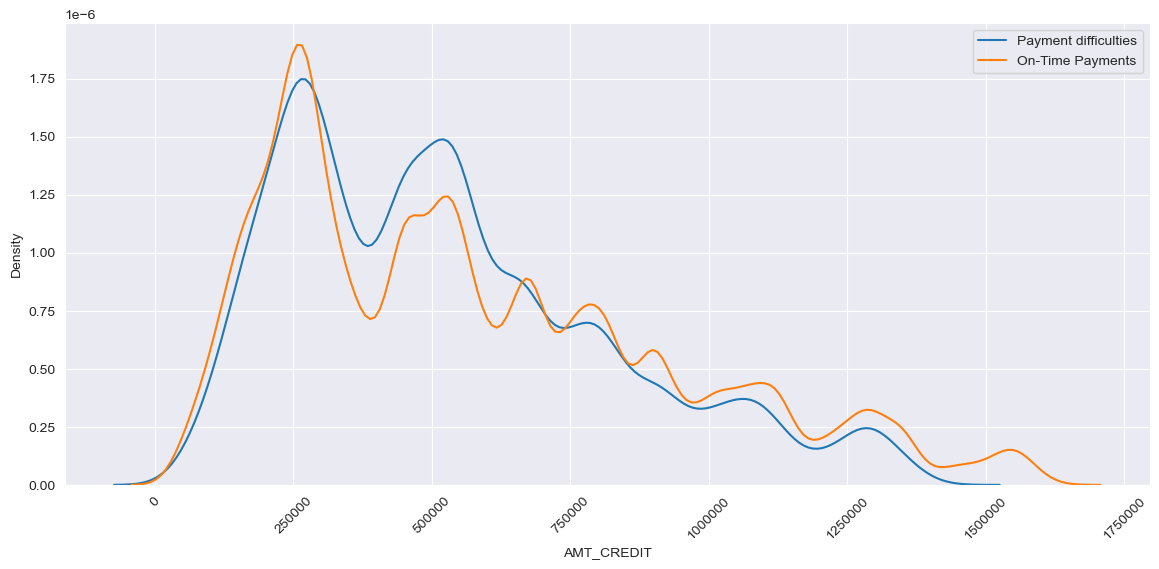

In [201]:
kde_no_outliers(df0, df1, Max_value0, Max_value1, 'AMT_CREDIT')

**Спостереження**

- Для `AMT_CREDIT` від 250000 до приблизно 650000 більше клієнтів мають труднощі з оплатою
- Для `AMT_CREDIT` > 750000 більше клієнтів, які вчасно здійснюють платежі

# ДЗ 5. Одновимірний аналіз числової колонки

За наведеним вище прикладом, проведіть одновимірний аналіз (виявлення викидів, їх усунення та побудова KDE  графіку) для числових змінних
- `YEARS_BIRTH`
- `AMT_GOODS_PRICE`
- `DAYS_EMPLOYED`

Опціонально:
- `CNT_CHILDREN`
- `AMT_INCOME_TOTAL`

Для цього винесіть функціонал для аналізу у функцію та викличіть функцію для кожної двійки змінних.

Зробіть висновки з аналізу.

In [202]:
def get_IQR_MIN_MAX(scoped_df, column):
    scoped_Q1 = scoped_df[column].quantile(0.25)
    scoped_Q3 = scoped_df[column].quantile(0.75)
    scoped_IQR = scoped_Q3 - scoped_Q1
    scoped_min_value = scoped_Q1 - 1.5 * scoped_IQR
    scoped_max_value = scoped_Q3 + 1.5 * scoped_IQR

    print(f"\nIQR: {scoped_IQR}")
    print(f"\nMinimum value below which outliers exist: {scoped_min_value}")
    print(f"\nMaximum value above which outliers exist: {scoped_max_value}")

    return scoped_min_value, scoped_max_value

def univariate_numeric_analysis(column):
    print(df[column].value_counts().sort_values(ascending = False).head())
    print('==========>')
    print((df[column].value_counts(normalize = True).sort_values(ascending = False) * 100).head())
    print('==========>')
    print(df[column].describe(percentiles = [0.75,0.99,0.999]))
    print('==========>')
    dist_box(df,column)
    mean = df[column].mean()
    std = df[column].std(ddof=0)
    skewness = ((df[column] - mean) / std) ** 3
    skew = skewness.mean()
    print(f"\nSkewness: {skew:.2f}")
    if (abs(skew) <= 2):
        scoped_min_value_0, scoped_max_value_0 = get_IQR_MIN_MAX(df0, column)
        scoped_min_value_1, scoped_max_value_1 = get_IQR_MIN_MAX(df1, column)
    else:
        scoped_max_value_0 = df0[column].quantile(0.999)
        scoped_max_value_1 = df1[column].quantile(0.999)
    kde_no_outliers(df0, df1, scoped_max_value_0, scoped_max_value_1, column)

YEARS_BIRTH
39    9023
38    8793
37    8727
40    8602
41    8495
Name: count, dtype: int64
==========>
YEARS_BIRTH
39   2.93
38   2.86
37   2.84
40   2.80
41   2.76
Name: proportion, dtype: float64
==========>
count   307511.00
mean        43.94
std         11.96
min         21.00
50%         43.00
75%         54.00
99%         67.00
99.9%       69.00
max         69.00
Name: YEARS_BIRTH, dtype: float64
==========>


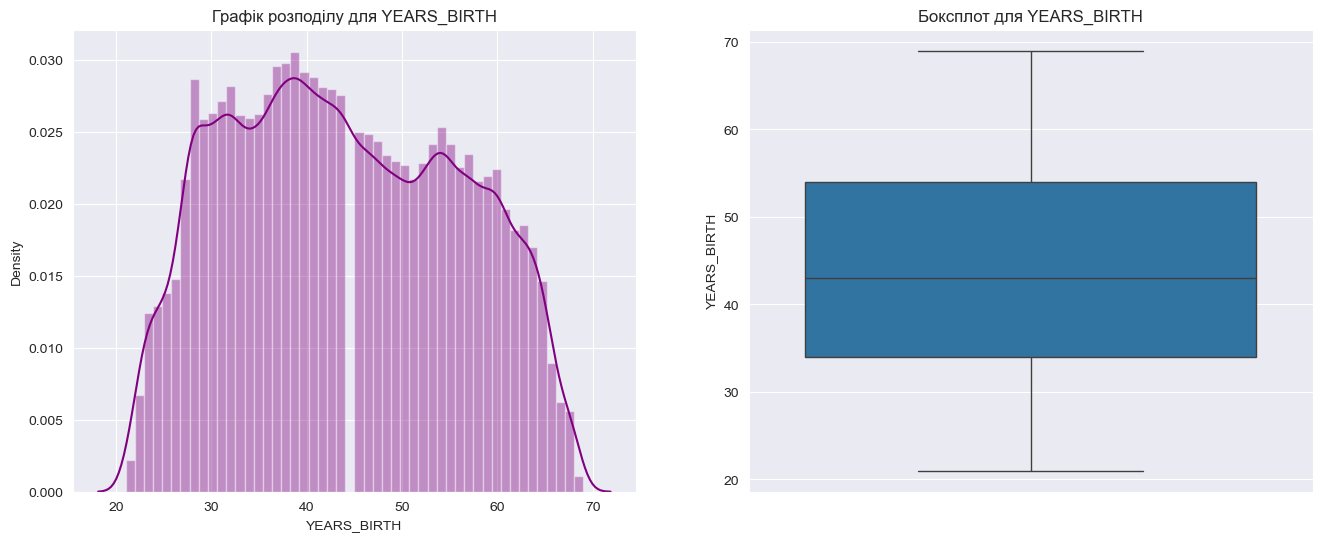


Skewness: 0.12

IQR: 20.0

Minimum value below which outliers exist: 4.0

Maximum value above which outliers exist: 84.0

IQR: 18.0

Minimum value below which outliers exist: 4.0

Maximum value above which outliers exist: 76.0


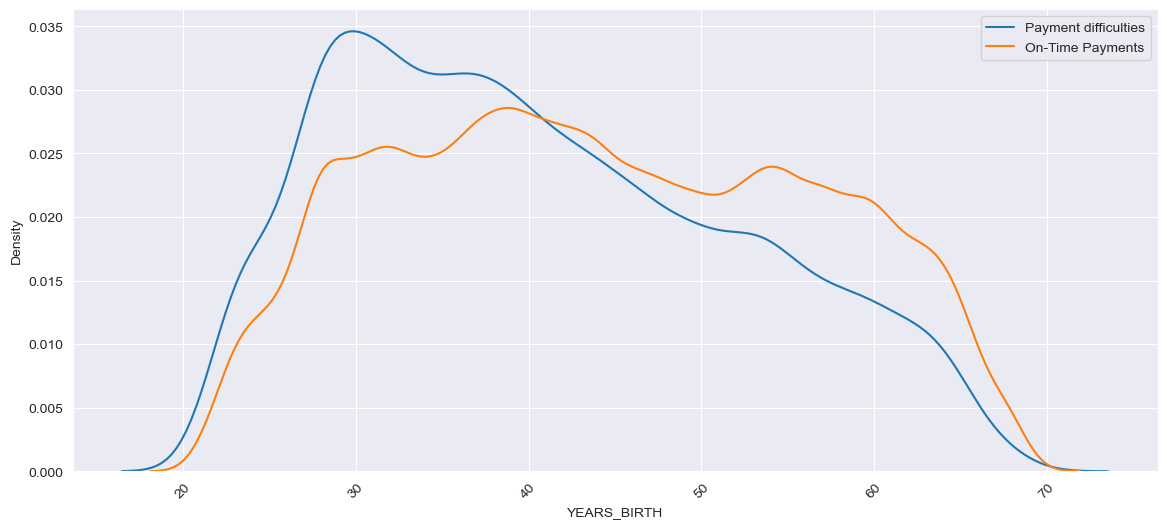

In [203]:
univariate_numeric_analysis('YEARS_BIRTH')

AMT_GOODS_PRICE
450000.00    26300
225000.00    25282
675000.00    24962
900000.00    15416
270000.00    11428
Name: count, dtype: int64
==========>
AMT_GOODS_PRICE
450000.00   8.55
225000.00   8.22
675000.00   8.12
900000.00   5.01
270000.00   3.72
Name: proportion, dtype: float64
==========>
count    307511.00
mean     538316.29
std      369288.98
min       40500.00
50%      450000.00
75%      679500.00
99%     1800000.00
99.9%   2250000.00
max     4050000.00
Name: AMT_GOODS_PRICE, dtype: float64
==========>


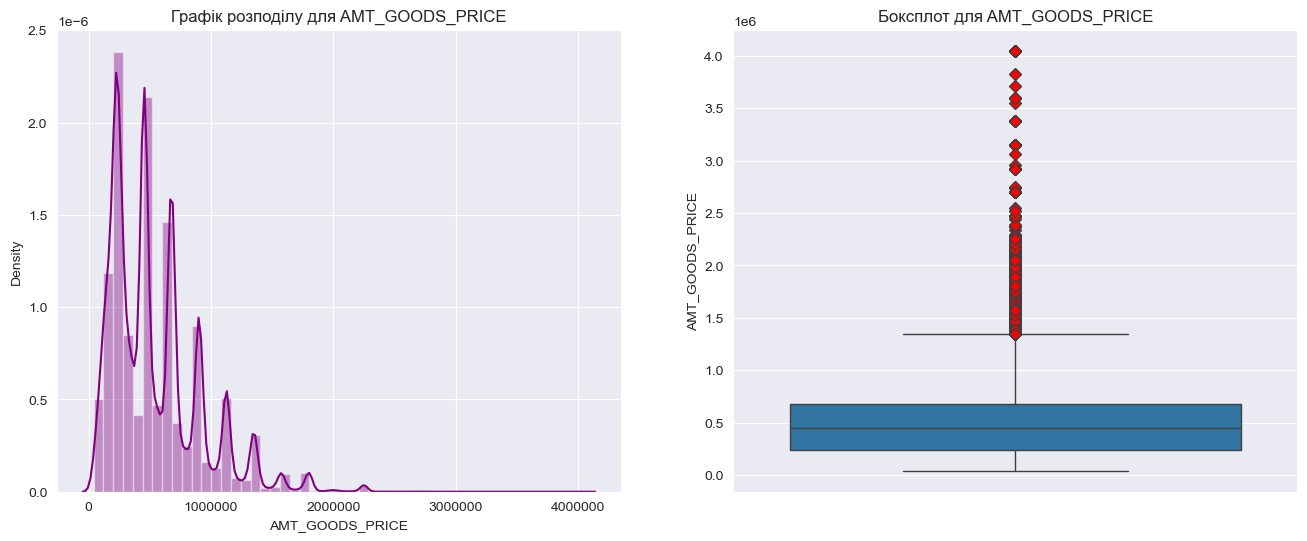


Skewness: 1.35

IQR: 446502.375

Minimum value below which outliers exist: -431253.5625

Maximum value above which outliers exist: 1354755.9375

IQR: 436500.0

Minimum value below which outliers exist: -416250.0

Maximum value above which outliers exist: 1329750.0


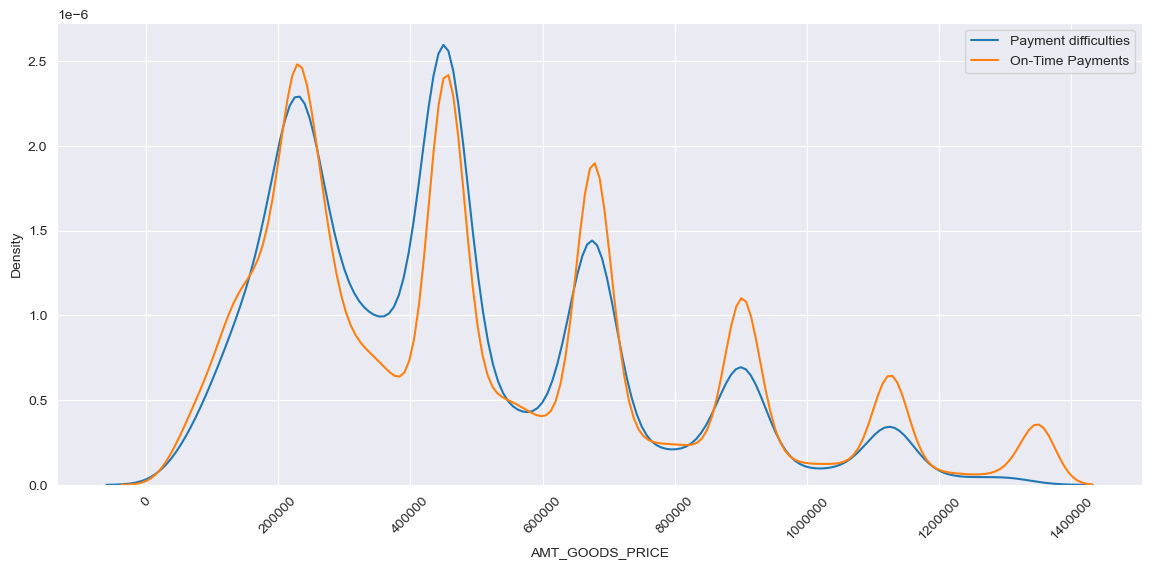

In [204]:
univariate_numeric_analysis('AMT_GOODS_PRICE')

DAYS_EMPLOYED
365243    55374
200         156
224         152
230         151
199         151
Name: count, dtype: int64
==========>
DAYS_EMPLOYED
365243   18.01
200       0.05
224       0.05
230       0.05
199       0.05
Name: proportion, dtype: float64
==========>
count   307511.00
mean     67724.74
std     139443.75
min          0.00
50%       2219.00
75%       5707.00
99%     365243.00
99.9%   365243.00
max     365243.00
Name: DAYS_EMPLOYED, dtype: float64
==========>


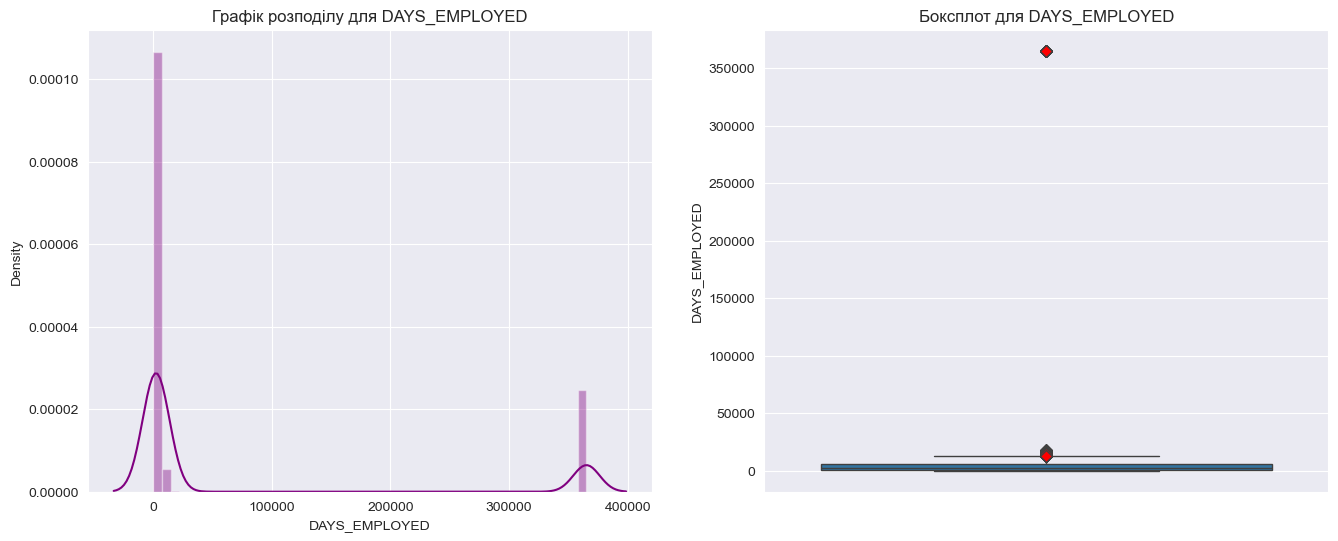


Skewness: 1.66

IQR: 5107.0

Minimum value below which outliers exist: -6693.5

Maximum value above which outliers exist: 13734.5

IQR: 2603.0

Minimum value below which outliers exist: -3227.5

Maximum value above which outliers exist: 7184.5


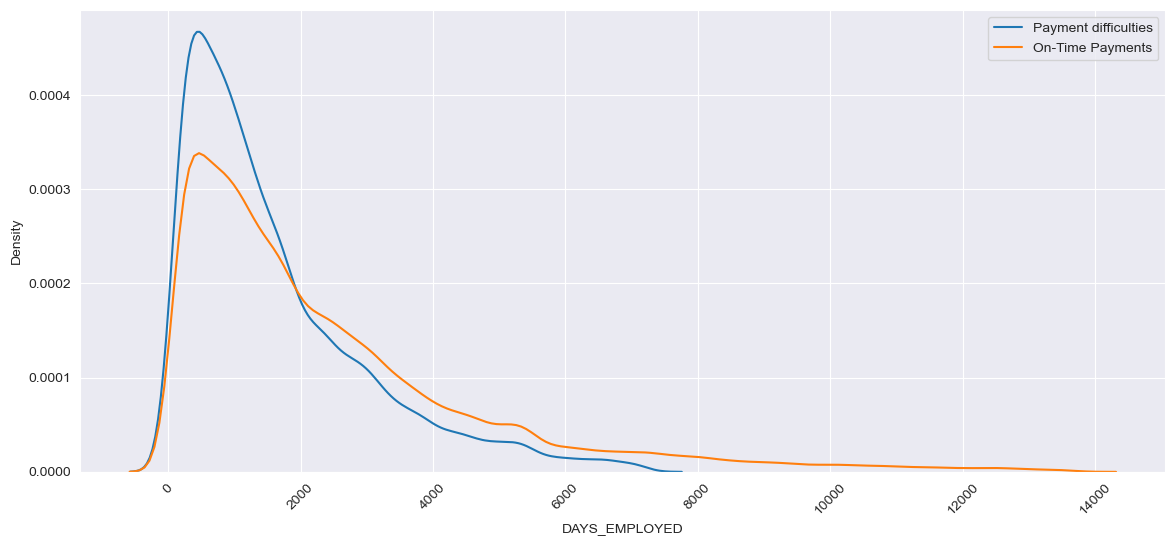

In [205]:
univariate_numeric_analysis('DAYS_EMPLOYED')

CNT_CHILDREN
0    215371
1     61119
2     26749
3      3717
4       429
Name: count, dtype: int64
==========>
CNT_CHILDREN
0   70.04
1   19.88
2    8.70
3    1.21
4    0.14
Name: proportion, dtype: float64
==========>
count   307511.00
mean         0.42
std          0.72
min          0.00
50%          0.00
75%          1.00
99%          3.00
99.9%        4.00
max         19.00
Name: CNT_CHILDREN, dtype: float64
==========>


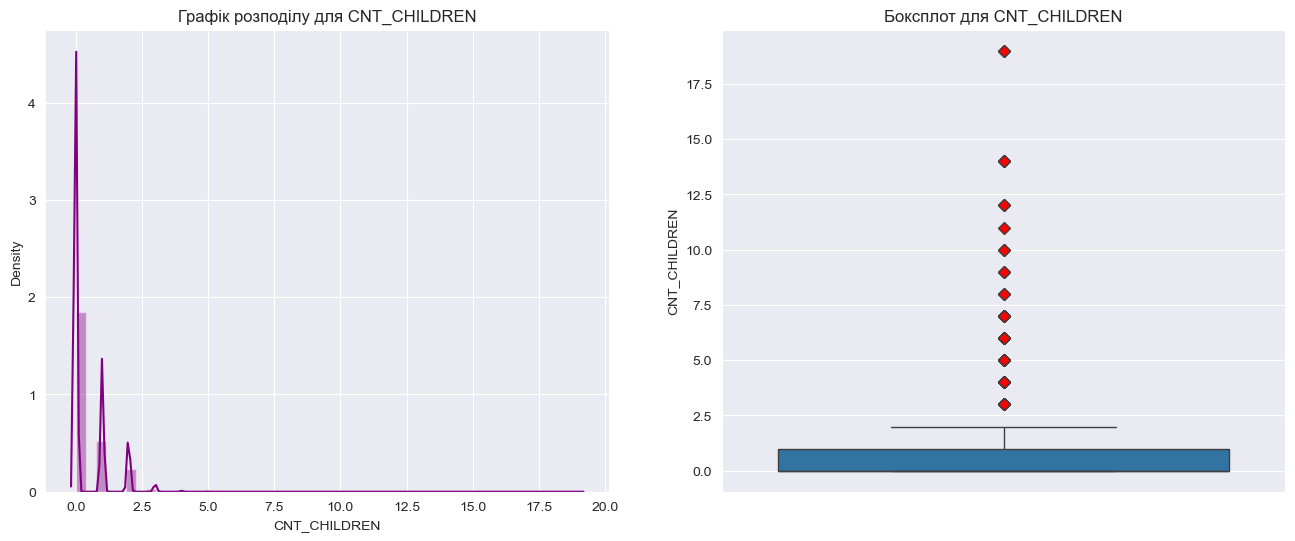


Skewness: 1.97

IQR: 1.0

Minimum value below which outliers exist: -1.5

Maximum value above which outliers exist: 2.5

IQR: 1.0

Minimum value below which outliers exist: -1.5

Maximum value above which outliers exist: 2.5


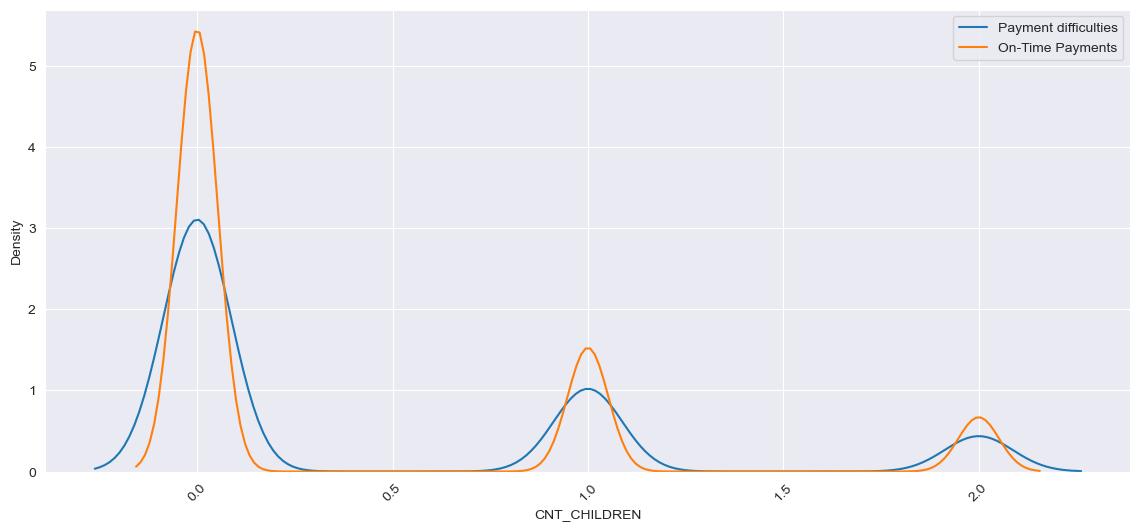

In [206]:
univariate_numeric_analysis('CNT_CHILDREN')

AMT_INCOME_TOTAL
135000.00    35750
112500.00    31019
157500.00    26556
180000.00    24719
90000.00     22483
Name: count, dtype: int64
==========>
AMT_INCOME_TOTAL
135000.00   11.63
112500.00   10.09
157500.00    8.64
180000.00    8.04
90000.00     7.31
Name: proportion, dtype: float64
==========>
count      307511.00
mean       168797.92
std        237123.15
min         25650.00
50%        147150.00
75%        202500.00
99%        472500.00
99.9%      900000.00
max     117000000.00
Name: AMT_INCOME_TOTAL, dtype: float64
==========>


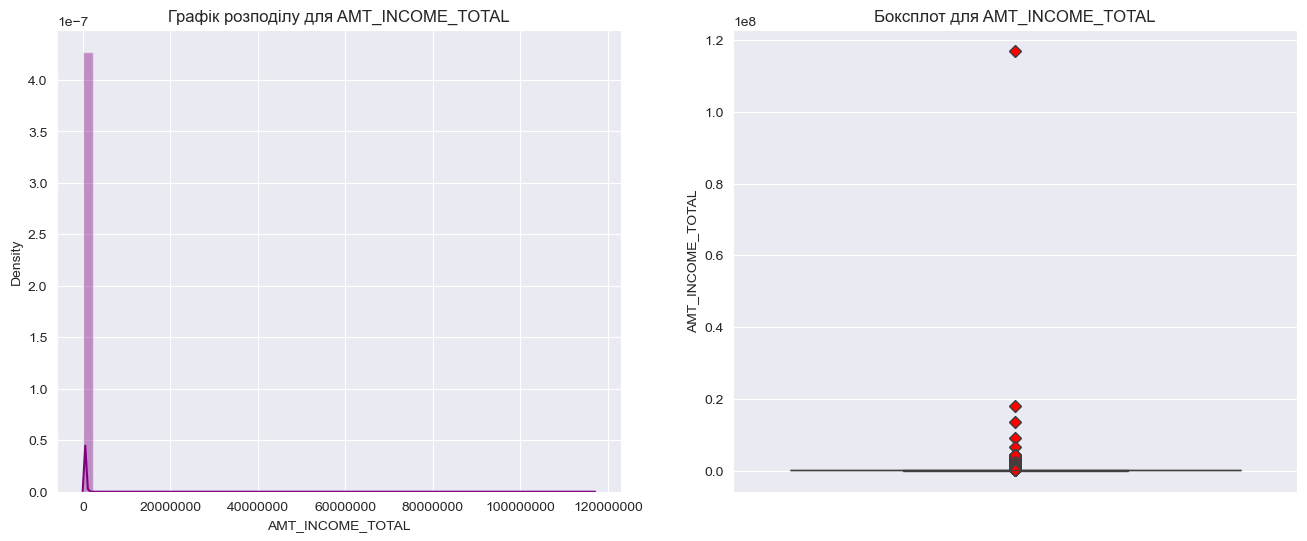


Skewness: 391.56


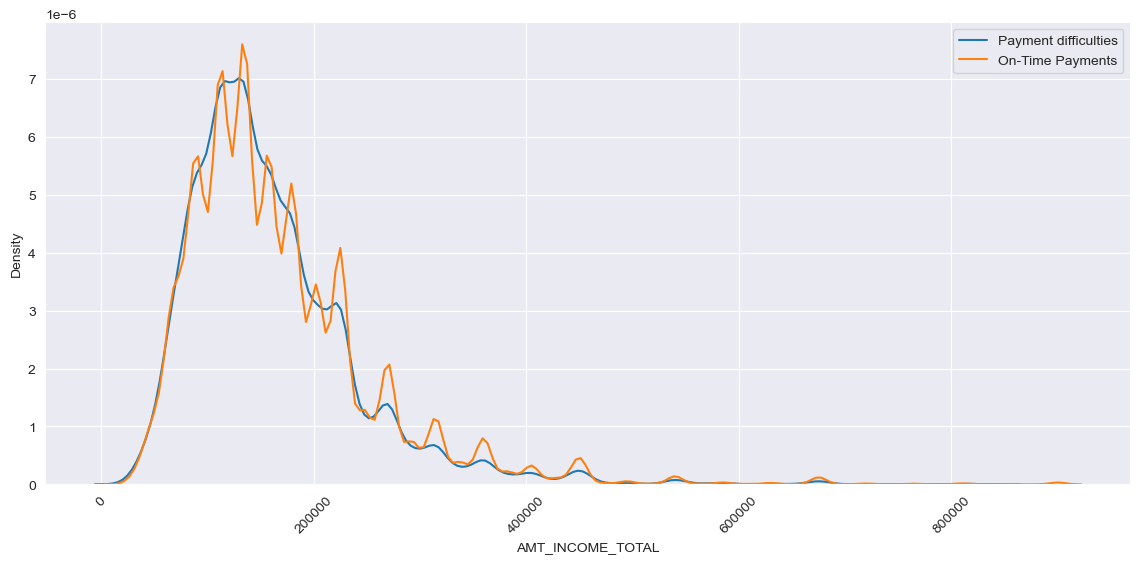

In [207]:
univariate_numeric_analysis('AMT_INCOME_TOTAL')

## Univariate Numeric Variable Analysis by Loan Repayment Behavior (`TARGET`)

---

### `YEARS_BIRTH`

- `Observation`:
  - The highest concentration of borrowers with `on-time payments` is observed in the `30–50 years` age range, peaking around 40 years.
  - Starting from approximately `40 years and older`, the share of on-time payers becomes noticeably higher compared to borrowers with `payment difficulties`.
  - Borrowers with `payment difficulties` are slightly younger, concentrated around `30–40 years`.

- `Interpretation`:
  - `Older applicants (40+ years)` appear more reliable in repayment, reflecting `greater financial stability`, `accumulated financial experience`, and `more conservative borrowing behavior`.
  - A negative association between age and credit risk is observed, with younger borrowers being more prone to payment difficulties.

---

### `AMT_GOODS_PRICE`

- `Observation`:
  - Distributions are very similar for both groups, showing characteristic peaks at standardized price points: `200k`, `270k`, `450k`, `675k`, etc.
  - At the `200k` price point, both groups have comparable densities, with a slight advantage for `on-time payments`.
  - Borrowers with `payment difficulties` show slightly higher density in lower price segments (below ~450k).
  - Borrowers with `on-time payments` are more represented in larger loan amounts (above ~600k).

- `Interpretation`:
  - `Goods price` does not serve as a strong standalone differentiator of credit risk.
  - However, reliable borrowers exist across both lower and higher loan segments.
  - Larger loan amounts may correlate with `higher financial capacity`, `better creditworthiness`, or stricter underwriting standards.
  - Observed price clusters reflect predefined loan product offerings.

---

### `DAYS_EMPLOYED`

- `Observation`:
  - Most applicants have `under 5,000 days` of employment (approximately 13 years).
  - The density curves intersect around `2,000 days` (~5.5 years), marking a transition point.
  - Beyond `2,000 days`, `on-time payments` consistently dominate, indicating an early divergence immediately after this point.

- `Interpretation`:
  - `Longer employment duration` correlates with `better repayment behavior`, driven by income stability and accumulated work experience.
  - Employment tenure above `2,000 days` signals lower credit risk, with further improvement as tenure increases.

---

### `CNT_CHILDREN`

- `Observation`:
  - The majority of both groups have `0 or 1 child`.
  - `On-time payers` are more likely to have `0 children`.

- `Interpretation`:
  - Fewer dependents may indicate `lower financial pressure`, contributing to `better repayment performance`.

---

### `AMT_INCOME_TOTAL`

- `Observation`:
  - Distributions are very similar, with `on-time payers` slightly skewed toward higher income levels.

- `Interpretation`:
  - `Higher income` may have a `weak positive correlation with repayment success`, but does not appear to be a dominant predictive factor.

---

## Summary

- **Most predictive features:**
  - `YEARS_BIRTH` — older applicants (40+ years) are more likely to repay.
  - `DAYS_EMPLOYED` — employment tenure above 2,000 days is associated with better repayment behavior.

- **Moderately informative:**
  - `CNT_CHILDREN` — fewer children correlate with better repayment capacity.
  - `AMT_GOODS_PRICE` — some risk differentiation observed: smaller loan amounts (below ~450k) are slightly more associated with payment difficulties, while larger loans show better repayment behavior.

- **Least predictive:**
  - `AMT_INCOME_TOTAL` — weak and not clearly differentiated association with repayment behavior.


# Двовимірний/Багатовимірний аналіз

## Неперервні vs неперервні змінні

### Аналіз стовпця `AMT_GOODS_PRICE` vs `AMT_CREDIT`

**Пошук викидів для ствопця `AMT_GOODS_PRICE ` для групи із платіжними труднощами**

In [208]:
max_value1_AMT_GOODS_PRICE = outlier_range(df1,'AMT_GOODS_PRICE')
max_value1_AMT_GOODS_PRICE

1329750.0

**Пошук викидів для ствопця `AMT_CREDIT` для групи із платіжними труднощами**

In [209]:
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_CREDIT')
max_value1_AMT_CREDIT

1406688.75

**Пошук викидів для `AMT_GOODS_PRICE `для групи із вчасними оплатами**

In [210]:
max_value0_AMT_GOODS_PRICE = outlier_range(df0,'AMT_GOODS_PRICE')
max_value0_AMT_GOODS_PRICE

1354755.9375

**Пошук викидів для `AMT_CREDIT `для групи із вчасними оплатами**

In [211]:
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_CREDIT')
max_value0_AMT_CREDIT

1620000.0

Побудова діаграми розсіювання для порівняння з видаленими викидами

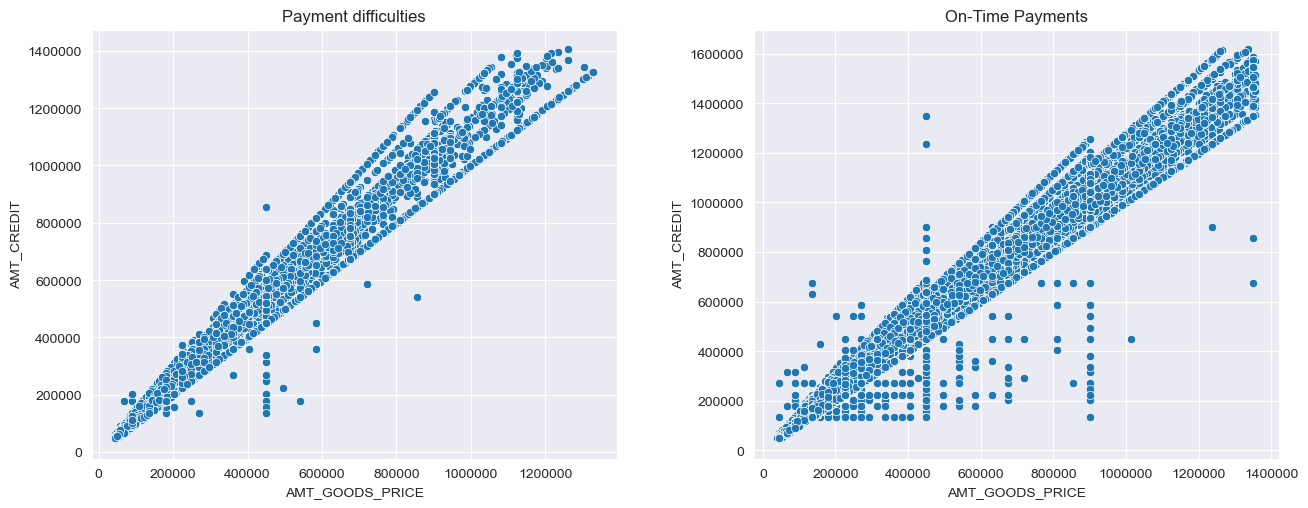

In [212]:
plt.figure(figsize = (14, 6))

plt.subplot(1,2,1)
plt.title('Payment difficulties')
sns.scatterplot(x = df1[df1['AMT_GOODS_PRICE'] < max_value1_AMT_GOODS_PRICE].AMT_GOODS_PRICE,
                y = df1[df1['AMT_CREDIT'] < max_value1_AMT_CREDIT].AMT_CREDIT, data = df1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(1,2,2)
plt.title('On-Time Payments')
sns.scatterplot(x = df0[df0['AMT_GOODS_PRICE'] < max_value0_AMT_GOODS_PRICE].AMT_GOODS_PRICE,
                y = df0[df0['AMT_CREDIT'] < max_value0_AMT_CREDIT].AMT_CREDIT, data = df0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout(pad = 4)
plt.show()

**Спостереження**
- AMT_GOODS_PRICE та AMT_CREDIT мають сильну позитивну кореляцію. Це означає, що зі збільшенням ціни товару зростає і сума кредиту

# ДЗ 6. Кореляційний аналіз для пари числових змінних

За наведеним вище прикладом, проведіть кореляційний аналіз для пар змінних
- AMT_ANNUITY і AMT_CREDIT

Опціонально:
- DAYS_EMPLOYED і AMT_INCOME_TOTAL
- AMT_CREDIT і DAYS_BIRTH

[Для цього винесіть функціонал для аналізу у функцію та викличіть функцію для кожної двійки змінних.](https://)
Зробіть висновок про наявність кореляції між змінними.

In [213]:
def multivariate_numeric_analysis(column_1, column_2):
    max_val_1_col1 = outlier_range(df1, column_1)
    max_val_1_col2 = outlier_range(df1, column_2)
    max_val_0_col1 = outlier_range(df0, column_1)
    max_val_0_col2 = outlier_range(df0, column_2)

    print(f"[Defaulters] Max {column_1}: {max_val_1_col1}, Max {column_2}: {max_val_1_col2}")
    print(f"[Non-defaulters] Max {column_1}: {max_val_0_col1}, Max {column_2}: {max_val_0_col2}")

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.title("Payment Difficulties")
    sns.scatterplot(
        x=df1[df1[column_1] < max_val_1_col1][column_1],
        y=df1[df1[column_2] < max_val_1_col2][column_2],
    )
    plt.xlabel(column_1)
    plt.ylabel(column_2)
    plt.ticklabel_format(style='plain', axis='both')

    plt.subplot(1, 2, 2)
    plt.title("On-Time Payments")
    sns.scatterplot(
        x=df0[df0[column_1] < max_val_0_col1][column_1],
        y=df0[df0[column_2] < max_val_0_col2][column_2],
    )
    plt.xlabel(column_1)
    plt.ylabel(column_2)
    plt.ticklabel_format(style='plain', axis='both')

    plt.tight_layout(pad=4)
    plt.show()


[Defaulters] Max AMT_ANNUITY: 56398.5, Max AMT_CREDIT: 1406688.75
[Non-defaulters] Max AMT_ANNUITY: 62187.75, Max AMT_CREDIT: 1620000.0


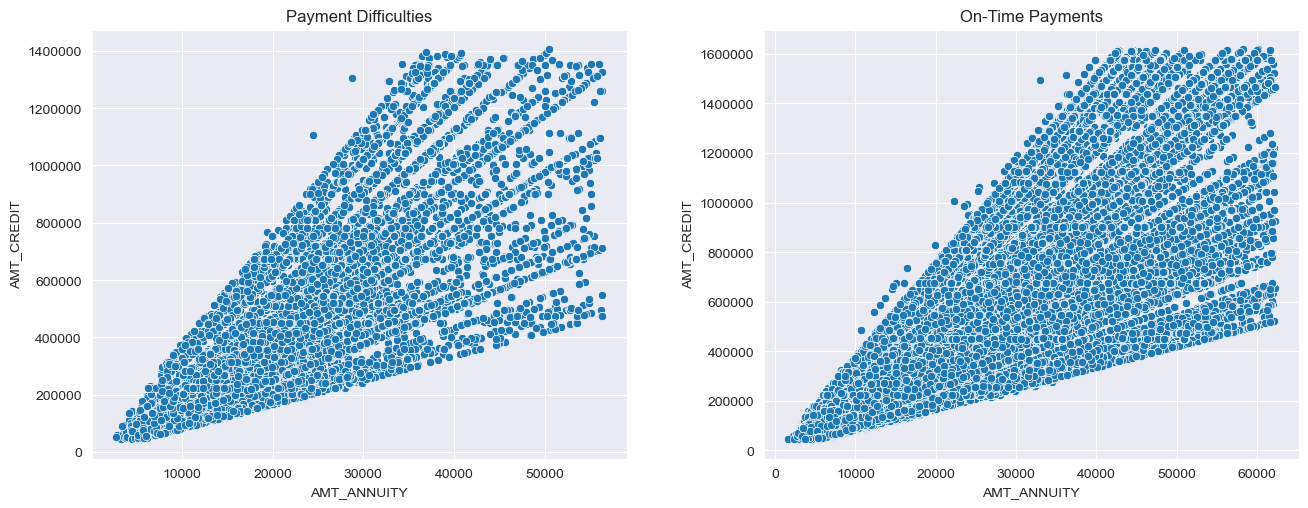

In [214]:
multivariate_numeric_analysis('AMT_ANNUITY', 'AMT_CREDIT')

[Defaulters] Max DAYS_EMPLOYED: 7184.5, Max AMT_INCOME_TOTAL: 337500.0
[Non-defaulters] Max DAYS_EMPLOYED: 13734.5, Max AMT_INCOME_TOTAL: 337500.0


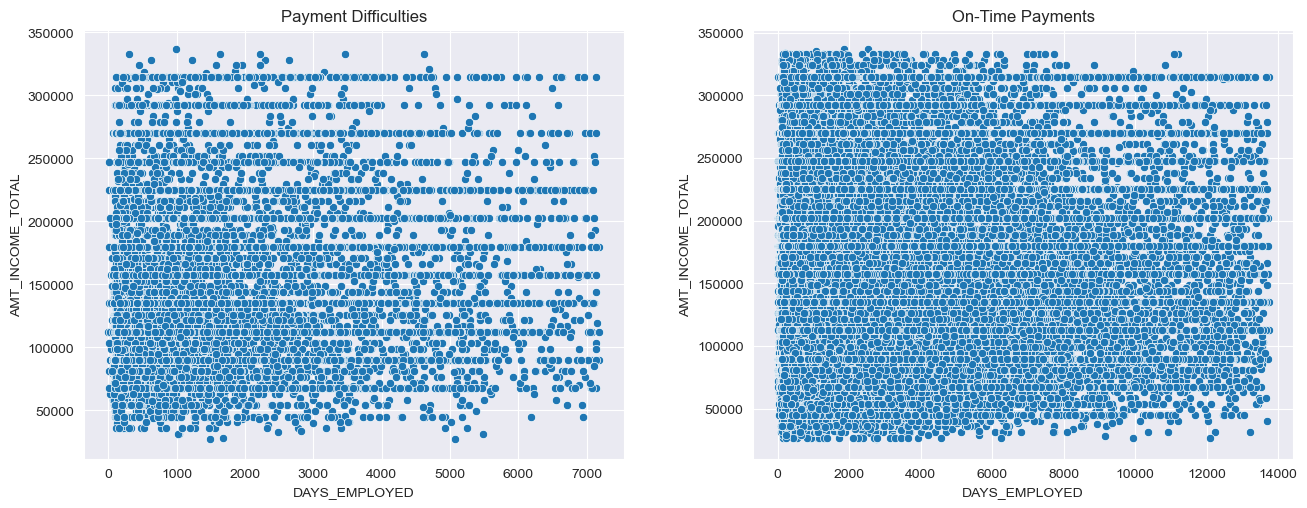

In [215]:
multivariate_numeric_analysis('DAYS_EMPLOYED', 'AMT_INCOME_TOTAL')

[Defaulters] Max AMT_CREDIT: 1406688.75, Max DAYS_BIRTH: 27998.5
[Non-defaulters] Max AMT_CREDIT: 1620000.0, Max DAYS_BIRTH: 30680.375


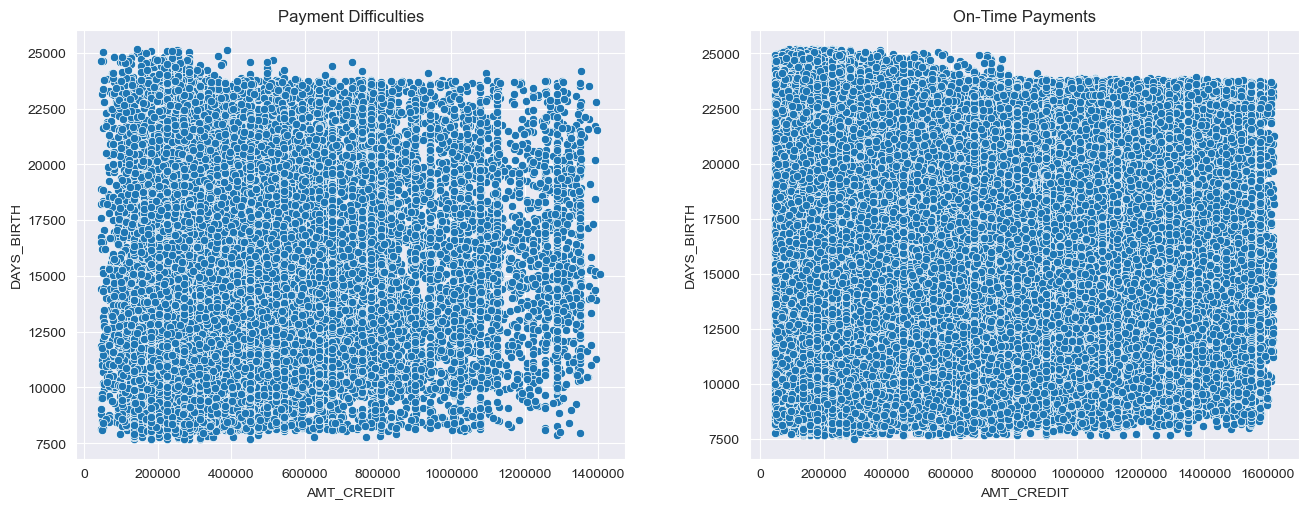

In [216]:
multivariate_numeric_analysis('AMT_CREDIT', 'DAYS_BIRTH')

## Correlation Analysis Between Numeric Variables

### 1. `AMT_ANNUITY` and `AMT_CREDIT`

There seems to be a `strong positive correlation` between these two variables. It makes sense because the more credit someone takes, the bigger their  monthly payment is. The scatter plot shows that the points form a diagonal-like line, which usually means the relationship is strong.

`Conclusion`: These two features are clearly related.

---

### 2. `DAYS_EMPLOYED` and `AMT_INCOME_TOTAL` (optional)

Here the correlation is `weak but slightly positive`. You’d expect that people who have worked longer might earn more, and that seems to be true, but not in a very clear way. The dots are all over the place and don’t form any strong trend on the scatter plot. So even if there's a connection, it's small.

`Conclusion`: These variables are not strongly connected.

---

### 3. `AMT_CREDIT` and `DAYS_BIRTH`

This one looks like it has `almost no correlation`. The scatter plot doesn’t show a clear pattern between age and credit amount.

`Conclusion`: There’s basically `no strong relationship`.

---

### Summary

- `AMT_ANNUITY` and `AMT_CREDIT` are clearly related — strong correlation.
- `DAYS_EMPLOYED` and `AMT_INCOME_TOTAL` are weakly related — small connection.
- `AMT_CREDIT` and `DAYS_BIRTH` are barely related — almost no pattern.

## Неперервні та категоріальні змінні

In [217]:
def draw_boxplot(df, categorical, continuous, max_continuous, title, hue_column, subplot_position):
    """
    Малює блок-діаграму для заданого DataFrame, категоріальної та неперервної змінної.
    """
    plt.subplot(1, 2, subplot_position)
    plt.title(title)
    red_diamond = dict(markerfacecolor='r', marker='D')
    sns.boxplot(x=categorical,
                y=df[df[continuous] < max_continuous][continuous],
                data=df,
                flierprops=red_diamond,
                order=sorted(df[categorical].unique(), reverse=True),
                hue=hue_column, hue_order=sorted(df[hue_column].unique(), reverse=True))
    plt.ticklabel_format(style='plain', axis='y')
    plt.xticks(rotation=90)

def bi_boxplot(categorical, continuous, max_continuous1, max_continuous0, hue_column):
    """
    Створює паралельні блок-діаграми для двох груп, визначених у наборі даних, на основі
    категоріальної та неперервної змінної, виділяючи відмінності за допомогою відтінків.
    """
    plt.figure(figsize=(16, 10))

    # Графік для першо групи "Труднощі з платежами" (Payment Difficulties)
    draw_boxplot(df1, categorical, continuous, max_continuous1, 'Payment Difficulties', hue_column, 1)

    # Графік для другої групи "Вчасні оплати" (On-Time Payments)
    draw_boxplot(df0, categorical, continuous, max_continuous0, 'On-Time Payments', hue_column, 2)

    plt.tight_layout(pad=4)
    plt.show()

### Аналіз стовпців `AMT_CREDIT` vs `NAME_EDUCATION_TYPE` vs `CODE_GENDER`

**Пошук викидів для `AMT_CREDIT `для групи із платіжними труднощами**

In [218]:
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_CREDIT')
max_value1_AMT_CREDIT

1406688.75

**Пошук викидів для `AMT_CREDIT ` для групи із вчасними платежами**

In [219]:
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_CREDIT')
max_value0_AMT_CREDIT

1620000.0

**Клієнт з платіжними труднощами**

In [220]:
df1.groupby(by = ['NAME_EDUCATION_TYPE','CODE_GENDER']).AMT_CREDIT.describe().head()

count      mean       std       min  \
NAME_EDUCATION_TYPE CODE_GENDER                                         
Academic degree     F              3.00 950245.50 504711.38 544491.00   
Higher education    F           2438.00 648500.58 410415.70  47970.00   
                    M           1571.00 642070.94 409695.93  45000.00   
Incomplete higher   F            504.00 520150.35 352227.49  91692.00   
                    M            368.00 554723.82 347843.71  74628.00   

                                      25%       50%        75%        max  
NAME_EDUCATION_TYPE CODE_GENDER                                            
Academic degree     F           667660.50 790830.00 1153122.75 1515415.50  
Higher education    F           323595.00 545040.00  877500.00 2687355.00  
                    M           329202.00 545040.00  832797.00 2695500.00  
Incomplete higher   F           269550.00 450000.00  675000.00 2695500.00  
                    M           284400.00 497520.00  699976.12 2013840.00

**Клієнт зі вчасними платежами**

In [221]:
df0.groupby(by = ['NAME_EDUCATION_TYPE','CODE_GENDER']).AMT_CREDIT.describe().head()

count      mean       std       min  \
NAME_EDUCATION_TYPE CODE_GENDER                                          
Academic degree     F              97.00 708770.74 463052.42 130824.00   
                    M              64.00 735235.38 497739.97  74182.50   
Higher education    F           47852.00 682485.00 456642.78  45000.00   
                    M           23002.00 713144.54 486073.66  45000.00   
Incomplete higher   F            5780.00 555340.53 385980.60  45000.00   

                                      25%       50%        75%        max  
NAME_EDUCATION_TYPE CODE_GENDER                                            
Academic degree     F           354469.50 607500.00 1006920.00 2463840.00  
                    M           309519.00 610056.00 1036890.00 1984500.00  
Higher education    F           302206.50 568057.50  916470.00 4050000.00  
                    M           315000.00 592560.00  973503.00 4050000.00  
Incomplete higher   F           253737.00 454500.00  760225.50 2517300.00

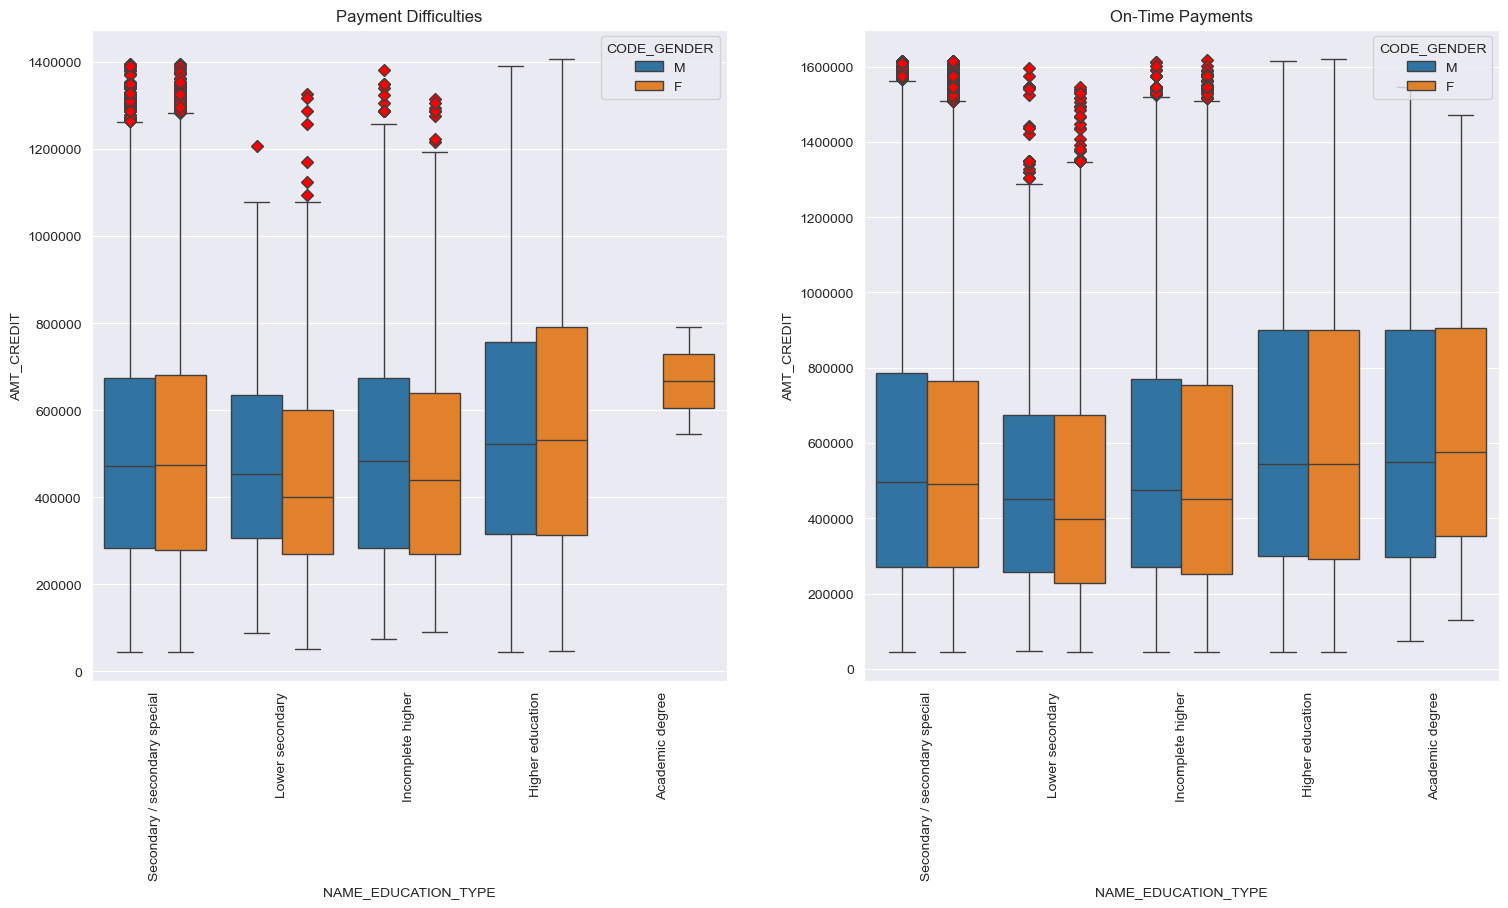

In [222]:
bi_boxplot('NAME_EDUCATION_TYPE','AMT_CREDIT',max_value1_AMT_CREDIT, max_value0_AMT_CREDIT, 'CODE_GENDER')

**Спостереження
- Клієнти з "академічним ступенем" мають широкий діапазон кредитів для своєчасних платежів, тоді як для клієнтів з проблемами з оплатою цей діапазон значно нижчий
- Якщо поглянути на зведену статистику, то клієнти з "вищою освітою" та проблемами з оплатою беруть середній та медіанний кредит у значно більшому діапазоні, ніж клієнти з вчасною оплатою.
- Клієнти-чоловіки з "вищою освітою" завжди сплачують кредит вчасно

# ДЗ 7. Кореляційний аналіз між двома категоріальними змінними і числовою

Проведіть аналогічний кореляційний аналіз для трійок змінних

- AMT_INCOME_TOTAL vs NAME_FAMILY_STATUS vs CODE_GENDER

Опціонально - трійки які можна додатково проаналізувати:
- AMT_INCOME_TOTAL vs YEARS_BIRTH_CATEGORY vs NAME_HOUSING_TYPE
- AMT_GOODS_PRICE vs NAME_INCOME_TYPE vs CODE_GENDER
- AMT_INCOME_TOTAL vs OCCUPATION_TYPE vs CODE_GENDER

А ще можете також проаналізувати додатково до обовʼязкової свою трійку :)

Для цього винесіть функціонал для аналізу у функцію та викличіть функцію для кожної трійки змінних.

Зробіть висновок про наявність кореляції між змінними.


In [223]:
def numeric_vs_categorical_analysis(df0, df1, column_1, column_2, column_3):
  max_value1_column_1 = outlier_range(df1, column_1)
  max_value0_column_1 = outlier_range(df0, column_1)

  # Клієнт з платіжними труднощами

  display(df1.groupby(by = [column_2, column_3])[column_1].describe().head())

  # Клієнт зі своєчасними платежами

  display(df0.groupby(by = [column_2, column_3])[column_1].describe().head())

  bi_boxplot(column_2, column_1, max_value1_column_1, max_value0_column_1, column_3)

count      mean        std      min  \
NAME_FAMILY_STATUS CODE_GENDER                                         
Civil marriage     F           1753.00 153620.72  101045.86 25650.00   
                   M           1208.00 173949.99   92449.17 36000.00   
Married            F           8324.00 159907.85 1283283.40 27000.00   
                   M           6526.00 182233.06   94787.77 31500.00   
Separated          F           1045.00 161159.55   82633.33 36000.00   

                                     25%       50%       75%          max  
NAME_FAMILY_STATUS CODE_GENDER                                             
Civil marriage     F           108000.00 135000.00 180000.00   3150000.00  
                   M           117000.00 157500.00 202500.00   1350000.00  
Married            F            90000.00 135000.00 180000.00 117000000.00  
                   M           126000.00 157500.00 225000.00   1890000.00  
Separated          F           112500.00 135000.00 202500.00    832500.00

count      mean       std      min  \
NAME_FAMILY_STATUS CODE_GENDER                                          
Civil marriage     F            19017.00 162086.05 106811.49 27000.00   
                   M             7797.00 184126.29 106559.49 27000.00   
Married            F           114125.00 154289.53  88593.43 26100.00   
                   M            67459.00 199592.83 147599.76 27000.00   
Separated          F            14416.00 166374.21  94782.18 27000.00   

                                     25%       50%       75%         max  
NAME_FAMILY_STATUS CODE_GENDER                                            
Civil marriage     F           112500.00 135000.00 202500.00  9000000.00  
                   M           121500.00 157500.00 225000.00  3825000.00  
Married            F            94500.00 135000.00 180000.00  3600000.00  
                   M           135000.00 180000.00 225000.00 18000090.00  
Separated          F           112500.00 139500.00 202500.00  2250000.00

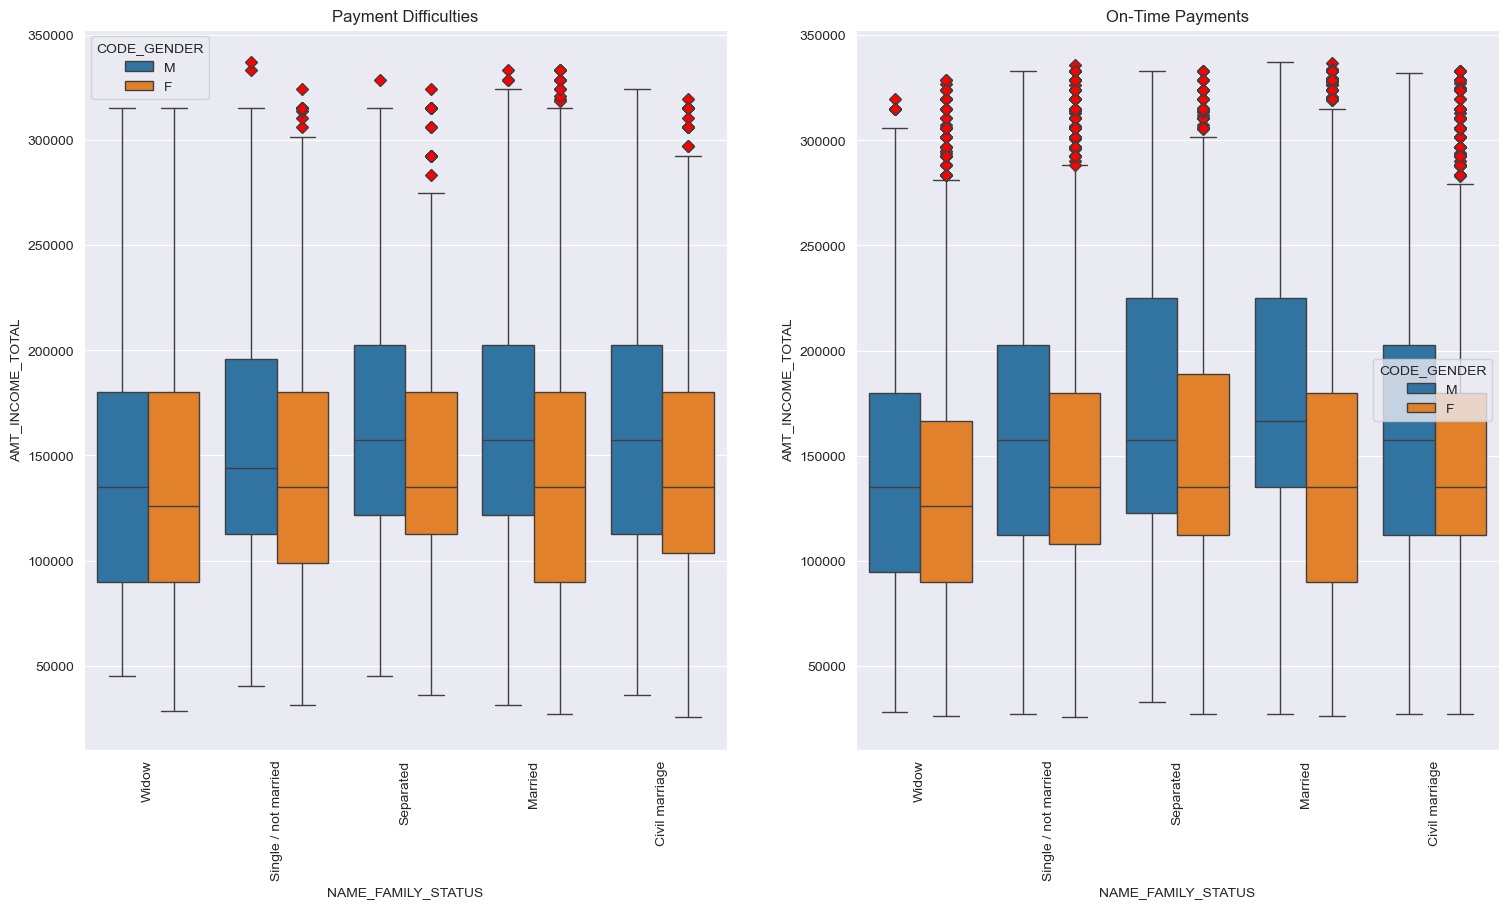

In [224]:
numeric_vs_categorical_analysis(df0, df1, 'AMT_INCOME_TOTAL', 'NAME_FAMILY_STATUS', 'CODE_GENDER')

count      mean      std      min  \
YEARS_BIRTH_CATEGORY NAME_HOUSING_TYPE                                         
20-30                Co-op apartment       40.00 148628.70 59516.24 67500.00   
                     House / apartment   4201.00 151897.22 70874.65 31500.00   
                     Municipal apartment  153.00 153608.82 78282.79 45000.00   
                     Office apartment      40.00 147375.00 50817.26 67500.00   
                     Rented apartment     229.00 144210.10 59998.66 45000.00   

                                               25%       50%       75%  \
YEARS_BIRTH_CATEGORY NAME_HOUSING_TYPE                                   
20-30                Co-op apartment     110250.00 135000.00 185625.00   
                     House / apartment   112500.00 135000.00 180000.00   
                     Municipal apartment 108000.00 135000.00 180000.00   
                     Office apartment    112500.00 135000.00 180000.00   
                     Rented apartment     99000.00 135000.00 180000.00   

                                               max  
YEARS_BIRTH_CATEGORY NAME_HOUSING_TYPE              
20-30                Co-op apartment     360000.00  
                     House / apartment   810000.00  
                     Municipal apartment 675000.00  
                     Office apartment    270000.00  
                     Rented apartment    405000.00

count      mean       std  \
YEARS_BIRTH_CATEGORY NAME_HOUSING_TYPE                                  
20-30                Co-op apartment       298.00 161153.15  76171.26   
                     House / apartment   33165.00 163944.39  92313.18   
                     Municipal apartment  1099.00 166235.08  88698.47   
                     Office apartment      455.00 177960.18 115765.13   
                     Rented apartment     1535.00 153028.06  70748.99   

                                              min       25%       50%  \
YEARS_BIRTH_CATEGORY NAME_HOUSING_TYPE                                  
20-30                Co-op apartment     45000.00 112500.00 139500.00   
                     House / apartment   27000.00 112500.00 141264.00   
                     Municipal apartment 45000.00 112500.00 144000.00   
                     Office apartment    36000.00 112500.00 157500.00   
                     Rented apartment    29250.00 109125.00 135000.00   

                                               75%        max  
YEARS_BIRTH_CATEGORY NAME_HOUSING_TYPE                         
20-30                Co-op apartment     202500.00  720000.00  
                     House / apartment   202500.00 4500000.00  
                     Municipal apartment 202500.00 1417500.00  
                     Office apartment    225000.00 1800000.00  
                     Rented apartment    180000.00  742500.00

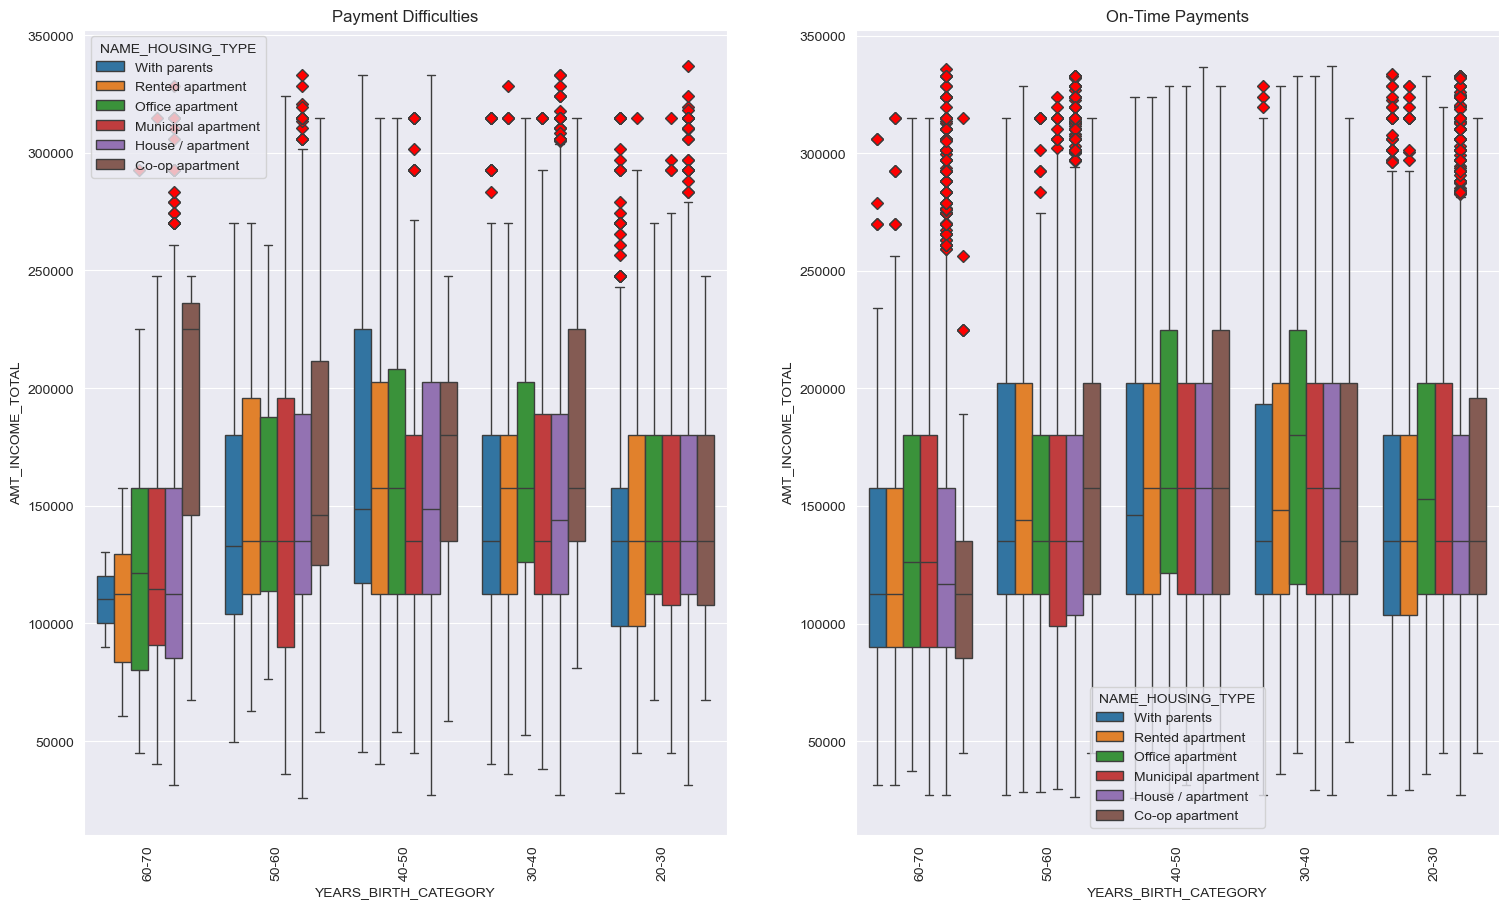

In [225]:
numeric_vs_categorical_analysis(df0, df1, 'AMT_INCOME_TOTAL', 'YEARS_BIRTH_CATEGORY', 'NAME_HOUSING_TYPE')

count      mean       std       min  \
NAME_INCOME_TYPE     CODE_GENDER                                         
Commercial associate F           2968.00 536304.02 353598.52  45000.00   
                     M           2392.00 526355.38 335793.33  45000.00   
Maternity leave      F              2.00 929250.00 715945.62 423000.00   
Pensioner            F           2243.00 494976.12 316903.86  45000.00   
                     M            739.00 486543.08 321104.43  45000.00   

                                       25%       50%        75%        max  
NAME_INCOME_TYPE     CODE_GENDER                                            
Commercial associate F           270000.00 450000.00  675000.00 3600000.00  
                     M           270000.00 450000.00  675000.00 2961000.00  
Maternity leave      F           676125.00 929250.00 1182375.00 1435500.00  
Pensioner            F           229500.00 450000.00  675000.00 2173500.00  
                     M           229500.00 450000.00  675000.00 1800000.00

count       mean        std       min  \
NAME_INCOME_TYPE     CODE_GENDER                                            
Businessman          F               3.00 1125000.00 1031079.53 225000.00   
                     M               7.00 1272857.14  755104.06 495000.00   
Commercial associate F           41552.00  602132.71  400701.09  45000.00   
                     M           24705.00  620123.74  422345.24  45000.00   
Maternity leave      F               2.00  562500.00  350017.86 315000.00   

                                       25%        50%        75%        max  
NAME_INCOME_TYPE     CODE_GENDER                                             
Businessman          F           562500.00  900000.00 1575000.00 2250000.00  
                     M           607500.00 1350000.00 1800000.00 2250000.00  
Commercial associate F           270000.00  472500.00  837000.00 4050000.00  
                     M           270000.00  472500.00  900000.00 4050000.00  
Maternity leave      F           438750.00  562500.00  686250.00  810000.00

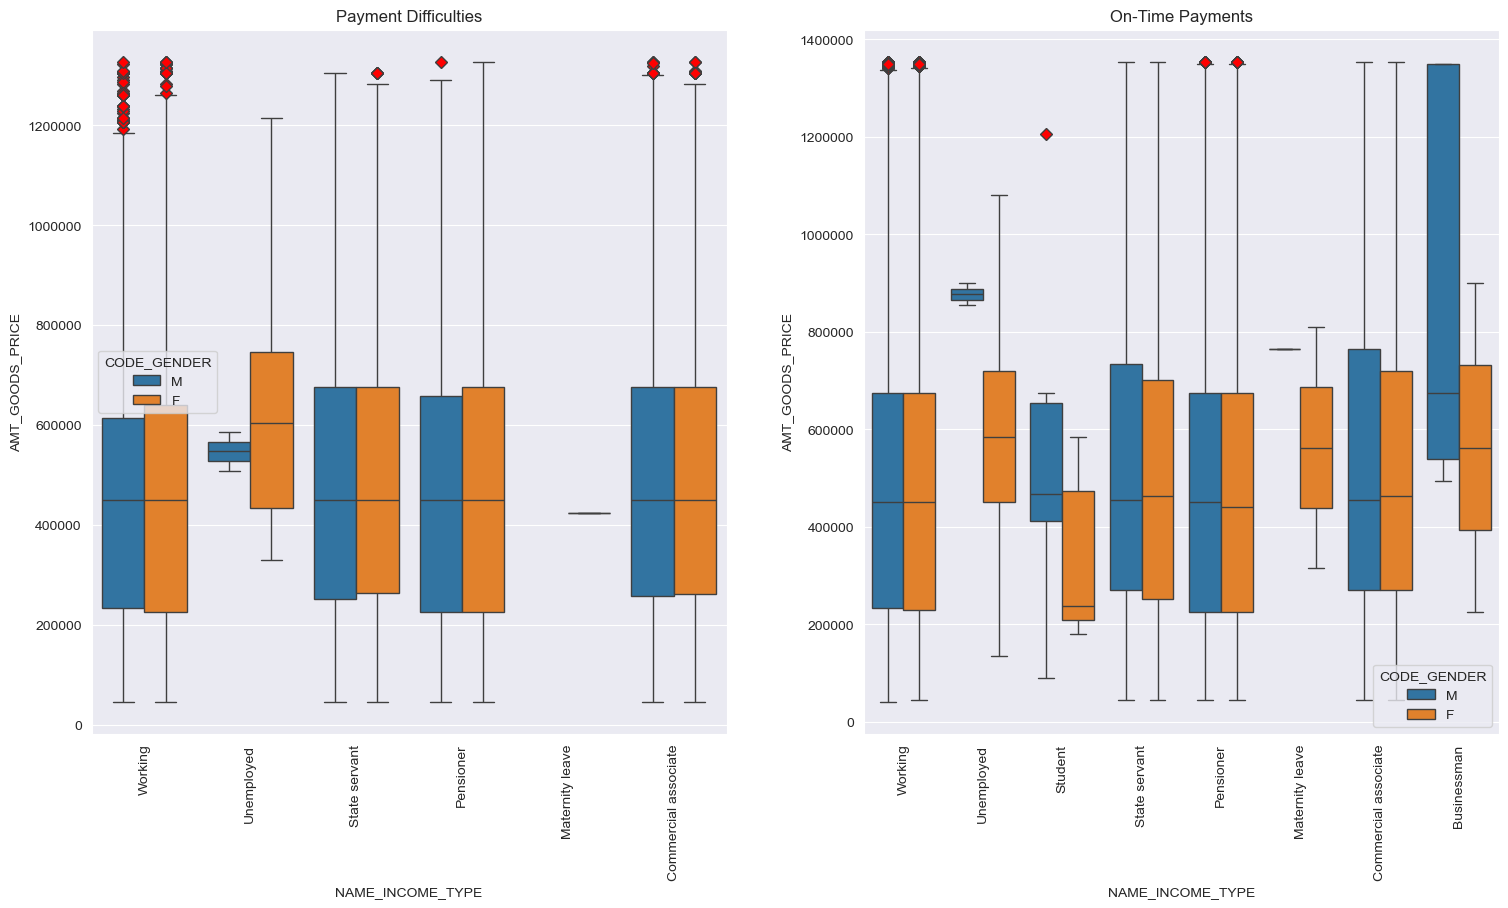

In [226]:
numeric_vs_categorical_analysis(df0, df1, 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'CODE_GENDER')

count      mean      std      min       25%  \
OCCUPATION_TYPE CODE_GENDER                                                
Accountants     F           457.00 174840.64 79021.04 54000.00 112500.00   
                M            17.00 202367.65 98623.66 81000.00 121500.00   
Cleaning staff  F           410.00 128907.99 70328.23 31500.00  90000.00   
                M            37.00 119493.24 45786.21 45000.00  90000.00   
Cooking staff   F           555.00 129298.38 55531.88 32400.00  90000.00   

                                  50%       75%       max  
OCCUPATION_TYPE CODE_GENDER                                
Accountants     F           157500.00 202500.00 540000.00  
                M           180000.00 252000.00 438750.00  
Cleaning staff  F           112500.00 157500.00 720000.00  
                M           112500.00 135000.00 247500.00  
Cooking staff   F           112500.00 157500.00 405000.00

count      mean       std      min       25%  \
OCCUPATION_TYPE CODE_GENDER                                                  
Accountants     F           9072.00 194324.51 109135.61 27000.00 130500.00   
                M            267.00 236490.89 131795.33 54000.00 141750.00   
Cleaning staff  F           3904.00 130602.05  63495.05 25650.00  90000.00   
                M            302.00 137172.52  64373.09 31500.00  90000.00   
Cooking staff   F           4830.00 134460.40  60213.56 27000.00  90000.00   

                                  50%       75%        max  
OCCUPATION_TYPE CODE_GENDER                                 
Accountants     F           175500.00 225000.00 2214117.00  
                M           216000.00 270000.00 1035000.00  
Cleaning staff  F           112500.00 157500.00 1080000.00  
                M           132750.00 169875.00  450000.00  
Cooking staff   F           121500.00 157500.00  540000.00

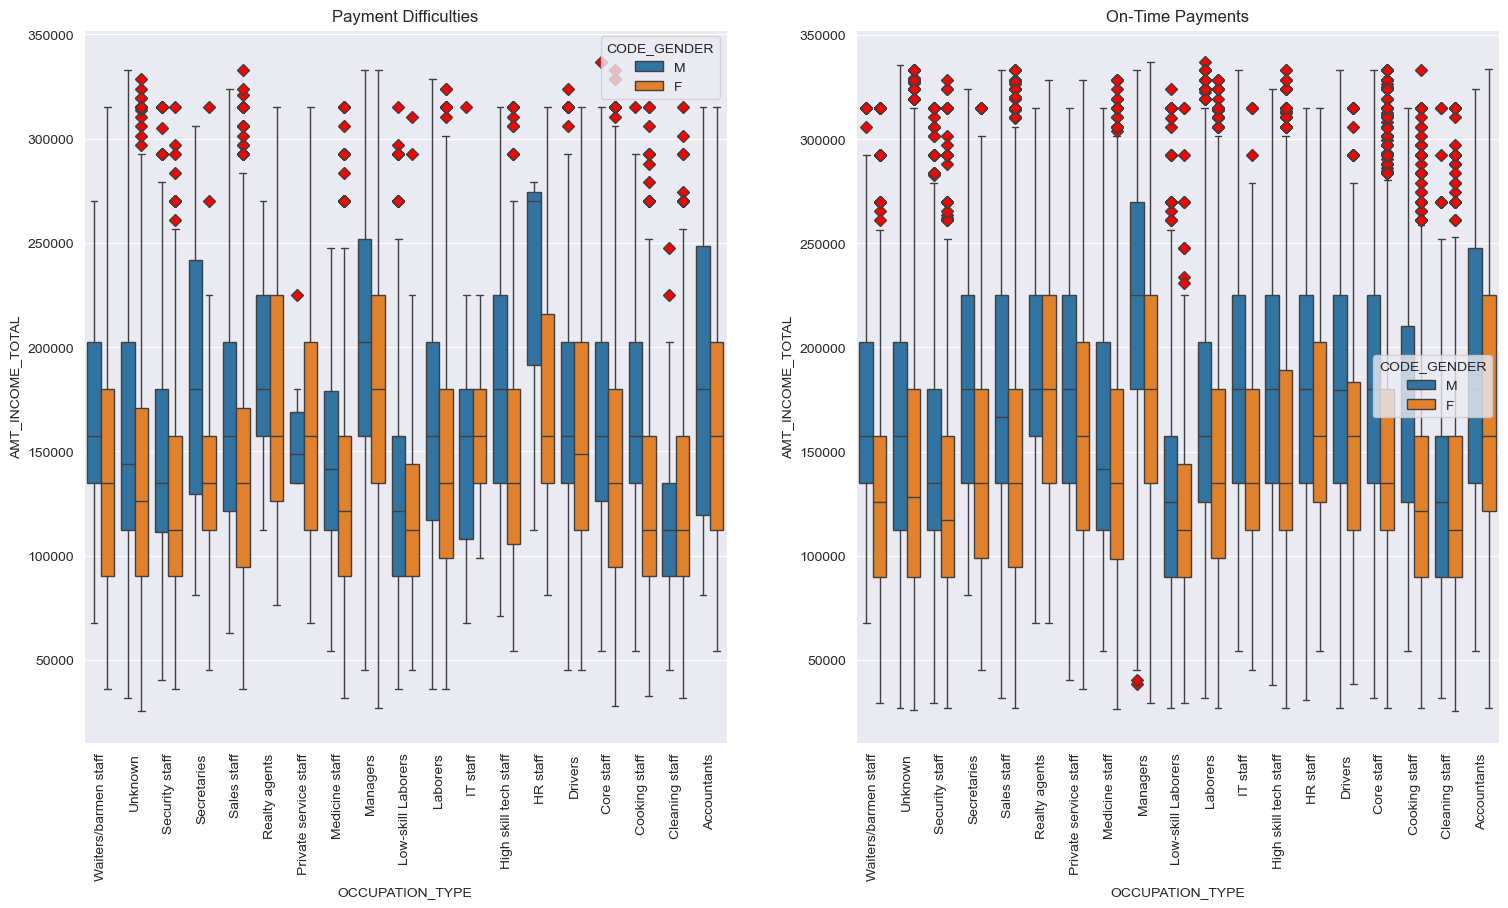

In [227]:
numeric_vs_categorical_analysis(df0, df1, 'AMT_INCOME_TOTAL', 'OCCUPATION_TYPE', 'CODE_GENDER')

## Analysis of Categorical and Numerical Variables

### `AMT_INCOME_TOTAL` vs `NAME_FAMILY_STATUS` vs `CODE_GENDER`

- Married men tend to have the `highest average income` among all subgroups.
- In both defaulters and non-defaulters, `men generally earn more than women` across all family statuses.
- `Separated females` also show relatively high income, especially among defaulters.
- There's a visible `gender and family status correlation` with income — family and gender together impact income levels.
- However, `the distribution spreads a lot`, so we can't say correlation is strong.

---

### `AMT_INCOME_TOTAL` vs `YEARS_BIRTH_CATEGORY` vs `NAME_HOUSING_TYPE`

- People in the `older age categories` (60–70) tend to have `lower incomes`, which makes sense due to retirement.
- Younger groups (30–40 and 40–50) tend to earn more.
- The type of housing has `some influence`, but not huge — for example, "Office apartment" or "Co-op apartment" owners sometimes show higher medians.
- Overall, there’s `a pattern where younger and middle-aged groups earn more`, and some housing types may correlate with that.

---

### `AMT_GOODS_PRICE` vs `NAME_INCOME_TYPE` vs `CODE_GENDER`

- `Businessmen and commercial associates` purchase the most expensive goods.
- Among defaulters, some `female applicants on maternity leave` are linked to very high-priced goods — but that’s based on very few samples.
- There's a visible `difference between genders` and `income type categories`.

---

### `AMT_INCOME_TOTAL` vs `OCCUPATION_TYPE` vs `CODE_GENDER`

- Managers, IT staff, and Accountants tend to have `higher average incomes`.
- In most occupation types, `males earn more than females` — especially noticeable in high-skill jobs.
- Some occupations like "Low-skill Laborers" or "Cleaning staff" show the opposite or smaller differences.
- So, `occupation clearly correlates with income`, and `gender adds another layer` — but the strength depends on the role.

---

### Summary

- In general, `income is influenced by categorical variables like gender, family status, occupation, and age group`.
- There are `patterns`, but not always strong correlations — some categories overlap a lot.


## Категоріальні та категоріальні змінні

### Аналіз стовпців `NAME_INCOME_TYPE` vs `CODE_GENDER`

In [228]:
def bi_countplot_target(df0, df1, column, hue_column) :
    group_name = f'Нормалізований розподіл значень за категорією: {column}'
    print (group_name.upper())

    pltname = 'Клієнт зі складнощями щодо платності'
    unique_hue_values = df1[hue_column].unique()
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(14,4)

    proportions = df1.groupby(hue_column)[column].value_counts(normalize=True)
    proportions = (proportions*100).round(2)
    ax = proportions.unstack(hue_column).sort_values(
      by=unique_hue_values[0], ascending=False
      ).plot.bar(ax=axes[0], title=pltname)

    # анотація значень в барплоті
    for container in ax.containers:
      ax. bar_label(container, fmt='{:,.1f}%')

    pltname = 'Клієнти зі своєчасними платежами'
    unique_hue_values = df0[hue_column].unique()

    proportions = df0.groupby(hue_column)[column].value_counts (normalize=True)
    proportions = (proportions*100).round(2)
    ax = proportions.unstack(hue_column).sort_values(
    by=unique_hue_values[0], ascending=False
      ).plot.bar(ax=axes[1], title=pltname)

    for container in ax.containers:
      ax.bar_label(container, fmt='{:,.1f}%')

    plt.show()

    #------------
    group_name = f'Кількість значень за категорією {column}'
    print(group_name.upper())

    pltname = 'Клієнт зі своєчасними платежами'
    unique_hue_values = df1[hue_column].unique()
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(14,4)
    counts = df1.groupby(hue_column)[column].value_counts()
    ax = counts.unstack(hue_column).sort_values(
      by=unique_hue_values [0], ascending=False
      ).plot.bar(ax=axes [0], title=pltname )

    for container in ax.containers:
      ax.bar_label(container)

    pltname = 'Клієнти зі своєчасними платежами'
    unique_hue_values = df0[hue_column].unique()
    counts = df0.groupby(hue_column)[column].value_counts()
    ax = counts.unstack(hue_column).sort_values (
      by=unique_hue_values[0], ascending=False
      ).plot.bar(ax=axes[1], title=pltname)

    for container in ax. containers:
      ax.bar_label(container)

    plt.show()

НОРМАЛІЗОВАНИЙ РОЗПОДІЛ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ: NAME_INCOME_TYPE


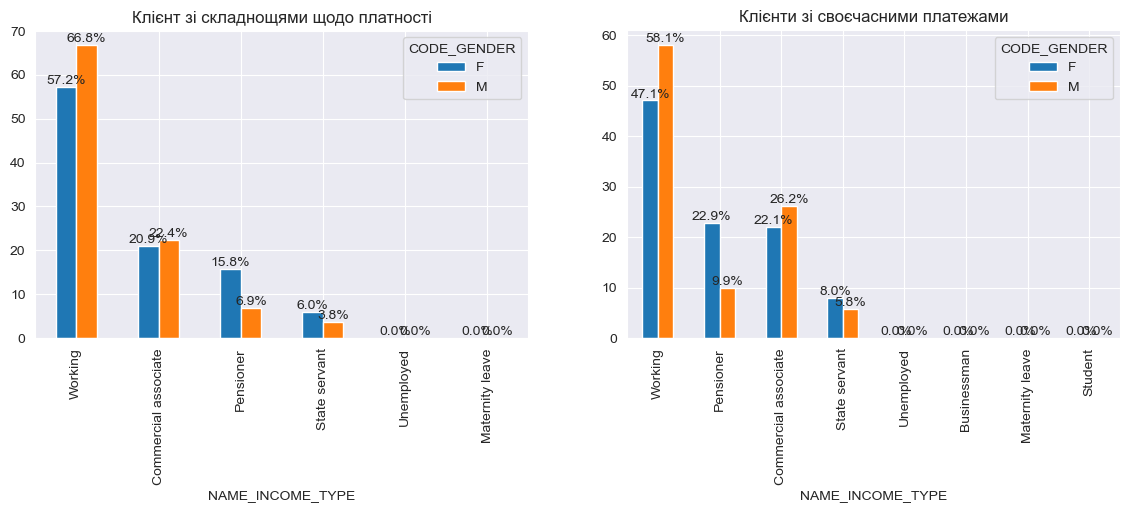

КІЛЬКІСТЬ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ NAME_INCOME_TYPE


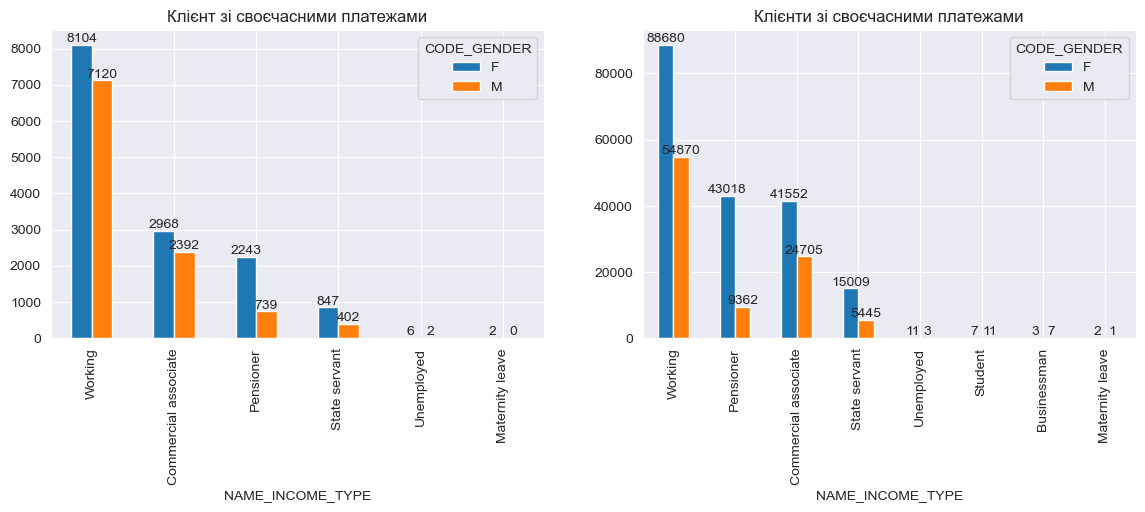

In [229]:
bi_countplot_target(df0, df1, 'NAME_INCOME_TYPE','CODE_GENDER')

**Спостереження**
- Клієнти категорії `Working` та `Male` мають більше труднощів з оплатою порівняно з тими, хто платить вчасно
- Клієнти категорії `Pensioner` та `Female` мають більше труднощів з оплатою порівняно з тими, хто платить вчасно
- Клієнти категорії `Businessman` та `Student` здійснюють платежі вчасно, хоча їхня історія невелика

# ДЗ 8. Аналіз взаємозалежностей між двома категоріальними змінними

Проведіть подібний до прикладу аналіз залежностей між категоріальними змінними для пар змінних

- NAME_EDUCATION_TYPE vs CODE_GENDER

Опціонально:
- NAME_FAMILY_STATUS vs OCCUPATION_TYPE
- OCCUPATION_TYPE vs NAME_CONTRACT_TYPE

Опишіть спостереження щодо того, чи є цікаві знахідки стосовно цільової змінної з цього аналізу.

НОРМАЛІЗОВАНИЙ РОЗПОДІЛ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ: NAME_EDUCATION_TYPE


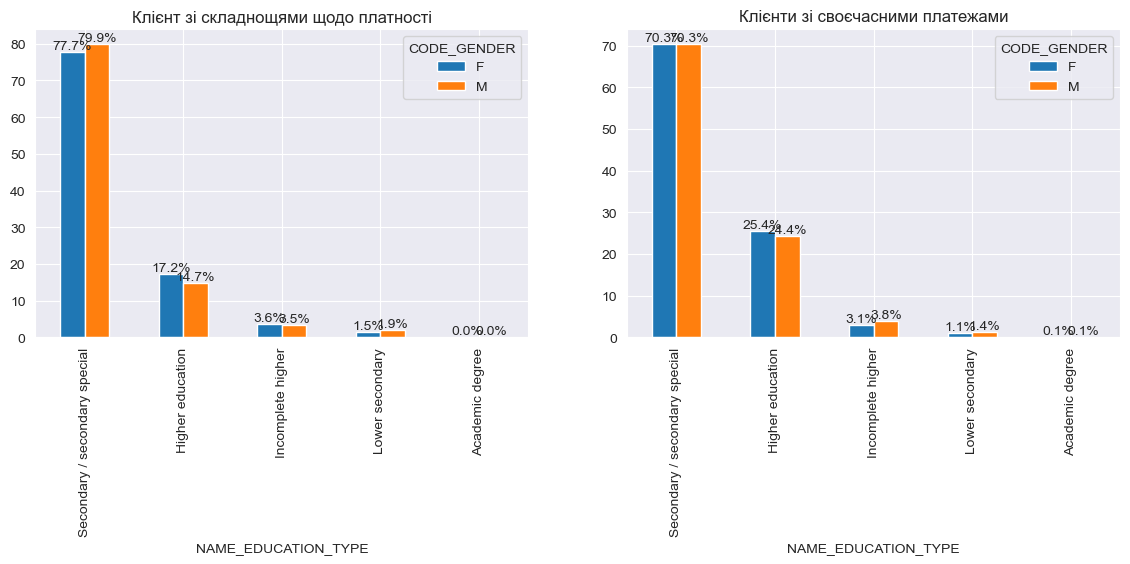

КІЛЬКІСТЬ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ NAME_EDUCATION_TYPE


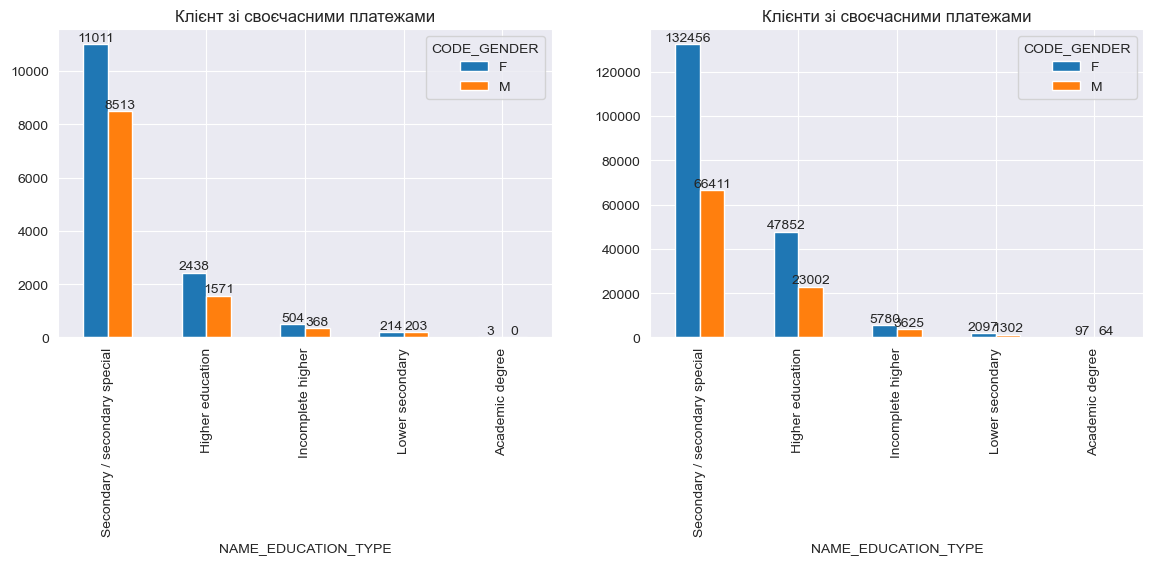

In [230]:
bi_countplot_target(df0, df1, 'NAME_EDUCATION_TYPE','CODE_GENDER')

НОРМАЛІЗОВАНИЙ РОЗПОДІЛ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ: NAME_FAMILY_STATUS


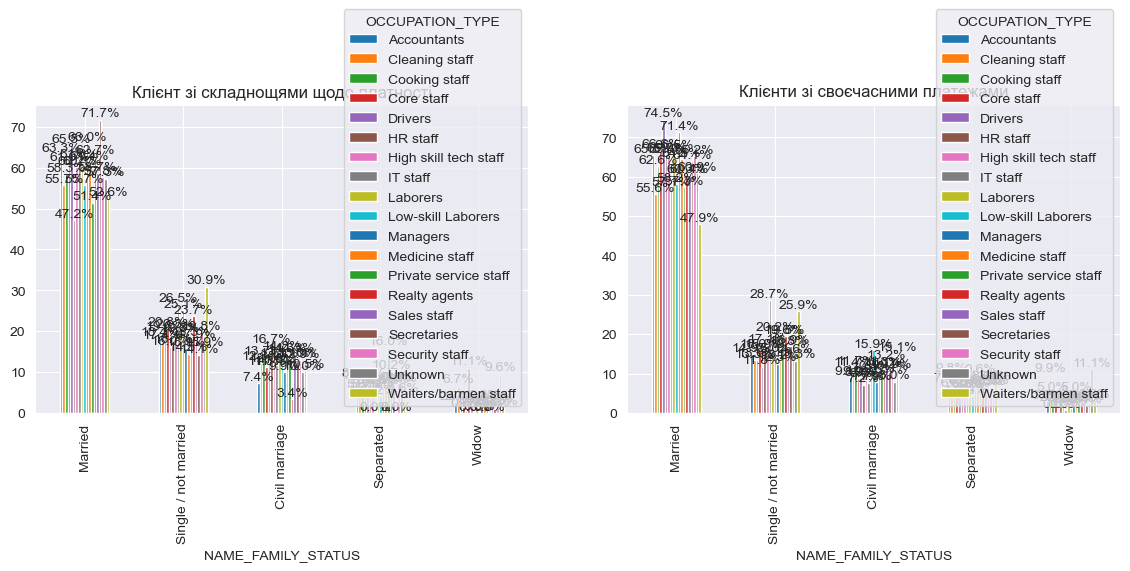

КІЛЬКІСТЬ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ NAME_FAMILY_STATUS


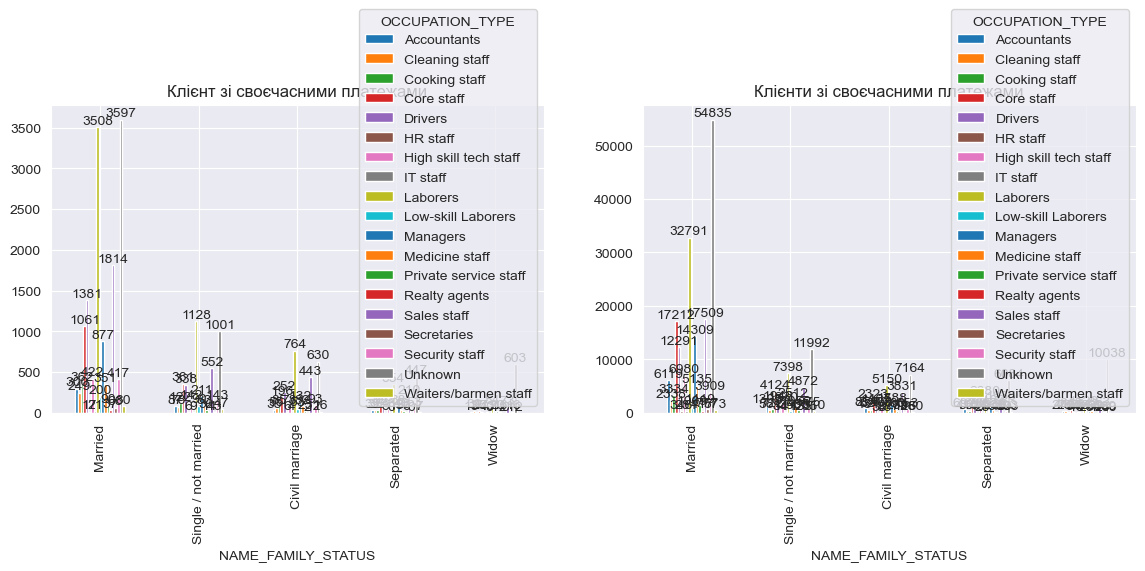

In [231]:
bi_countplot_target(df0, df1, 'NAME_FAMILY_STATUS','OCCUPATION_TYPE')

НОРМАЛІЗОВАНИЙ РОЗПОДІЛ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ: OCCUPATION_TYPE


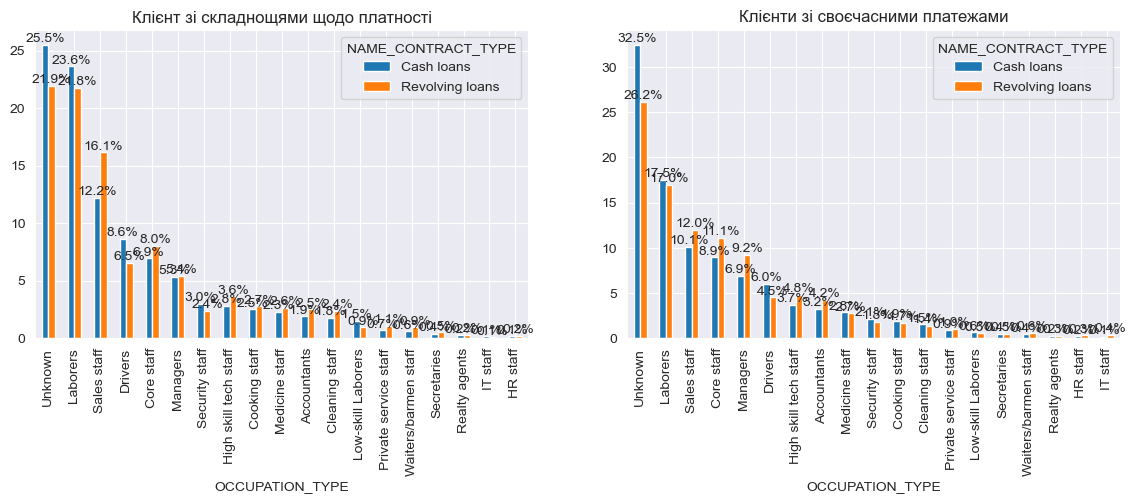

КІЛЬКІСТЬ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ OCCUPATION_TYPE


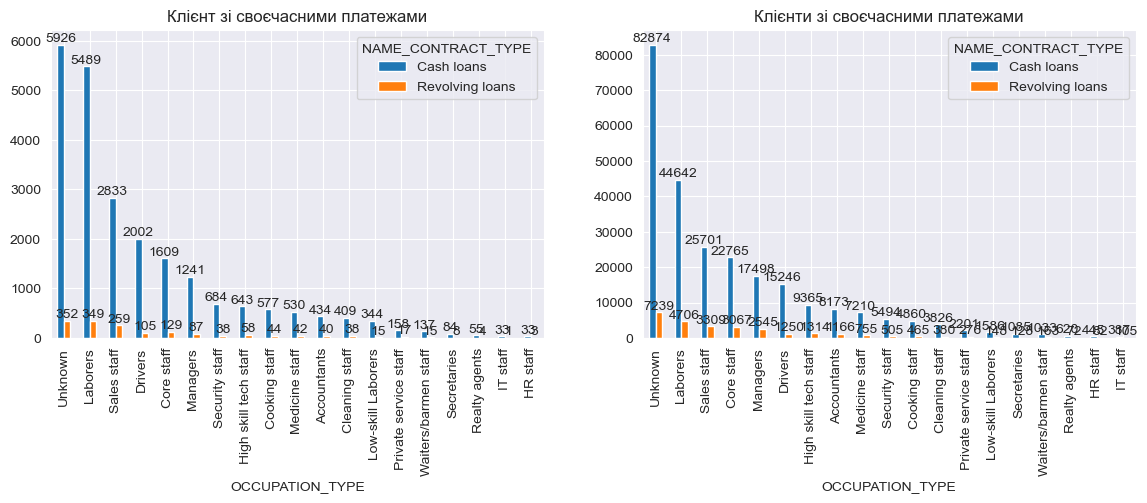

In [232]:
bi_countplot_target(df0, df1, 'OCCUPATION_TYPE','NAME_CONTRACT_TYPE')

## Analysis Summary: Interactions between Categorical Variables

### `NAME_EDUCATION_TYPE` & `CODE_GENDER` vs Target

- Clients with `Secondary / secondary special` education dominate in both genders, but:
  - `Men` in this group show a `slightly higher proportion of payment difficulties` than women.
  - `Women` with `Higher education` are more likely to pay on time, indicating a `positive effect of higher education on payment behavior` among females.
- Clients with `Incomplete higher` or `Lower secondary` education, regardless of gender, are more likely to be among those with `payment issues`, especially males.

### `NAME_FAMILY_STATUS` & `OCCUPATION_TYPE` vs Target

- `Married clients` across most occupations are `more likely to pay on time`, especially in stable roles like `Accountants`, `Managers`, and `IT staff`.
- `Single` or `Civil marriage` clients in `Laborers` and `Sales staff` categories are `more represented among those with difficulties`.
- Notably, `Low-skill Laborers` and `Security staff` who are `Single` show `significantly higher default rates` than their married counterparts.
- `Widowed` clients, despite smaller numbers, show a relatively balanced or slightly better payment record in certain professional roles.

### `OCCUPATION_TYPE` & `NAME_CONTRACT_TYPE` vs Target

- Clients with `Cash loans` in `Laborers`, `Sales staff`, and especially `Unknown` occupations have `noticeably more payment issues`, regardless of gender or other attributes.
- `Revolving loans` are less frequent overall but tend to be associated with `slightly better payment performance` in categories like `Managers` and `Core staff`.
- Occupation types such as `IT staff`, `Accountants`, and `High skill tech staff` tend to be `underrepresented among defaulters`, regardless of contract type.

---

### Summary

- Combined categories such as `Female + Higher Education`, `Married + Accountant`, and `Manager + Revolving Loan` are `positively associated with timely payments`.
- Risk combinations include `Male + Laborer + Cash Loan` and `Single + Security staff`, which are `more likely to be linked with payment difficulties`.
- Cross-variable analysis highlights the importance of `contextual interactions` (e.g., gender+education or family+job) in understanding the behavior of clients with respect to the target variable.



***
# ДЗ 9. Висновок з проведеного аналізу
Напишіть Ваш висновок з проведеного ананлізу, яким категоріям осіб Ви б видали кредит? Категорія може бути, наприклад, люди з такою-то освітою, з таким-то доходом, з таким-то досвідом роботи.

## Strategic Summary — Evaluating Borrower Risk through Categorical Interactions

### Important Features (Direct impact on target behavior)

- `NAME_CONTRACT_TYPE` — cash loans carry higher risk than revolving.
- `CODE_GENDER` — gender influences risk when combined with education and occupation.
- `NAME_EDUCATION_TYPE` — lower education correlates with higher default probability.
- `NAME_FAMILY_STATUS` — married clients are more likely to repay on time.
- `OCCUPATION_TYPE` — laborers, low-skill workers, and "Unknown" are higher risk groups.
- `AMT_CREDIT`, `AMT_ANNUITY`, `AMT_GOODS_PRICE` — core financials related to loan structure.

---

### Contextual or Combined Features

- `CNT_FAM_MEMBERS` — may indicate financial burden in large families.
- `CNT_CHILDREN` — higher number of children increases risk, especially without spousal support.
- `EXT_SOURCE_2` — missing values may indicate no credit history.
- `DAYS_BIRTH`, `DAYS_EMPLOYED` — informative when converted to real ages and employment durations.
- `DAYS_ID_PUBLISH`, `DAYS_REGISTRATION` — useful for modeling recency.
- Derived: `INCOME_PER_FAM_MEMBER`, `IS_SINGLE_PARENT` — can enhance correlation with target and improve generalization.

---

### Features to Drop or Deprioritize

- `FLAG_MOBIL`, `FLAG_WORK_PHONE`, `FLAG_EMAIL` — near-constant.
- `NAME_TYPE_SUITE` — who accompanied client does not impact repayment.
- `OWN_CAR_AGE` — sparsely populated, not predictive.
- Redundant dates: `DAYS_REGISTRATION` may be dropped if others better capture recency.
- `EXT_SOURCE_1`, `AMT_REQ_CREDIT_BUREAU_*` — mostly missing; either drop or replace with binary flags.

---

### Data Quality Observations

- The dataset contains `many features`, some with `high skew`, `outliers`, and `missing values`.
- Several features (e.g., `CNT_CHILDREN`, `CNT_FAM_MEMBERS`, `AMT_ANNUITY`) exhibit extreme values that may reflect data issues or atypical profiles.
- `Outlier detection` and `missing value flagging` are necessary steps for robust modeling.

---

### Automation & Feature Engineering Strategy

Given the complexity and volume of the data:

- A `machine learning–based scoring system` is well-suited to this problem.
- Consider building engineered features like:
  - `INCOME_PER_FAM_MEMBER = AMT_INCOME_TOTAL / CNT_FAM_MEMBERS`
  - `IS_SINGLE_PARENT = (CNT_CHILDREN > 0) & (NAME_FAMILY_STATUS != 'Married')`
- These features should be tested for `correlation with the target` — they may outperform raw features and enable `dimensionality reduction`.
- A combination of `feature importance evaluation` and `correlation analysis` can help reduce overfitting and improve interpretability.

---

### Fairness Considerations

- Features like gender and marital status, though predictive, may raise ethical issues.
- `Bias auditing` is recommended before deployment to ensure fairness across demographic groups.

---

### Ideal Borrower Profile

- Education: Higher education
- Family: Married, 0–2 children
- Occupation: Skilled staff, Managers, IT
- Contract: Revolving
- Financials: Low-to-moderate credit relative to income, well-defined goods price
- Behavior: Long employment, no missing external scores

---

### High-Risk Borrower Profile

- Education: Secondary or lower
- Family: Single with multiple children
- Occupation: Laborer, Unknown, Security staff
- Contract: Cash loan
- Financials: High credit, missing goods price or external scores
- Behavior: Short employment or unverified documents
